In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import numpy as np
import plotly as px
from geopy.geocoders import Nominatim
from countryinfo import CountryInfo
from geopy.geocoders import Nominatim
import time
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import geopandas as gpd
import mplcursors
import plotly.graph_objects as go
from IPython.core.display import display, HTML
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from matplotlib.patches import ConnectionPatch
from plotly.subplots import make_subplots
import itertools
import math


C:\Users\abolfazl\AppData\Local\Temp\ipykernel_10096\2015435810.py:18: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display



In [7]:
df1=pd.read_csv("data/calendar.csv")
df1.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [5]:
df=pd.read_csv("data/sales_train_validation.csv")
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4




</div>
<a id="cell-2"></a>

<div style="
    background: linear-gradient(135deg, #e3f2fd, #bbdefb);
    width: 60%;
    margin: 30px auto;
    border-radius: 20px;
    text-align: center;
    box-shadow: 0 6px 12px rgba(33, 150, 243, 0.3);
    color: #0d47a1;
    font-size: 26px;
    padding: 20px 30px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    font-weight: bold;
    border: 2px solid #90caf9;
">
اول از همه یه دید گلی از ستون ها رو می بینم 
</div>


   EDA --اگه دوست نداری این قسمت رو ببینی برو یخش یعدی 

  <a href="#eda" style="
            width:fit-content;
            text-decoration: none; 
            color: #ffffff; 
            background: rgba(255, 255, 255, 0.03); 
            padding: 16px 20px; 
            border-radius: 15px; 
            display: flex; 
            align-items: center; 
            border: 1px solid rgba(255, 255, 255, 0.05);">
            <span style="font-size: 20px; margin-right: 15px; filter: drop-shadow(0 0 5px #00ffddff);">⬇️</span>
            <span style="font-weight: 500; font-size: 15px; letter-spacing: 1px;">CLick</span>
        </a>

<div style="
    background: #0B0F13; 
    max-width: 90%; /* تغییر از مقدار ثابت به درصد برای موبایل */
    width: 500px; 
    margin: 40px auto; 
    padding: 25px; /* کمی کاهش پدینگ برای فضای بیشتر در موبایل */
    border-radius: 25px; 
    border: 1px solid rgba(0, 212, 255, 0.2);
    box-shadow: 0 25px 50px rgba(0, 0, 0, 0.5);
    font-family: 'Segoe UI', Roboto, sans-serif;
    box-sizing: border-box; /* برای جلوگیری از بزرگتر شدن باکس از عرض تعیین شده */
">
    <h2 style="
        text-align: center; 
        color: #ffffff; 
        font-size: clamp(20px, 5vw, 26px); /* اندازه فونت متغیر نسبت به اندازه صفحه */
        margin-bottom: 30px; 
        font-weight: 800; 
        letter-spacing: 2px;
        text-transform: uppercase;">
        <span style="border-bottom: 3px solid #00d4ff; padding-bottom: 8px;">columns</span>
    </h2>
    <div style="display: flex; flex-direction: column; gap: 12px;">       
        <a href="#Feature" style="
            text-decoration: none; 
            color: #ffffff; 
            background: rgba(255, 255, 255, 0.03); 
            padding: 14px 18px; 
            border-radius: 15px; 
            display: flex; 
            align-items: center; 
            border: 1px solid rgba(255, 255, 255, 0.05);
            transition: 0.3s; /* اضافه کردن انیمیشن نرم */
        ">
            <span style="font-size: 20px; margin-right: 15px; filter: drop-shadow(0 0 5px #00ffddff);">🏪</span>
            <span style="font-weight: 500; font-size: 15px; letter-spacing: 1px;">id</span>
        </a>
    </div>
</div>

In [297]:
df["id"][0]

'HOBBIES_1_001_CA_1_validation'

<style>
:root {
    --primary: #1abc9c;
    --bg-card: #ffffff;
    --text-dark: #2c3e50;
    --text-light: #576574;
    --code-bg: #1e272e;
}
.shop-style {
    display: flex;
    justify-content: center;
    padding: 10px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
}
.shop-style .card {
    background: var(--bg-card);
    border-radius: 16px;
    box-shadow: 0 10px 30px rgba(0,0,0,0.08);
    padding: 24px;
    max-width: 500px;
    width: 100%;
    border: 1px solid rgba(0,0,0,0.05);
    transition: all 0.3s ease;
}
.shop-style .card:hover {
    transform: translateY(-5px);
    box-shadow: 0 15px 35px rgba(0,0,0,0.12);
}
.shop-style .title-section {
    display: flex;
    align-items: center;
    margin-bottom: 16px;
    border-left: 4px solid var(--primary);
    padding-left: 12px;
}
.shop-style .title-section h3 {
    margin: 0;
    color: var(--text-dark);
    font-size: 18px;
    text-transform: uppercase;
    letter-spacing: 1px;
}
.shop-style .text {
    font-size: 15px;
    color: var(--text-light);
    line-height: 1.6;
    margin-bottom: 20px;
}
.shop-style .highlight {
    color: var(--primary);
    background: rgba(26, 188, 156, 0.1);
    padding: 2px 6px;
    border-radius: 4px;
    font-weight: 600;
}
.shop-style .code-container {
    position: relative;
    background: var(--code-bg);
    border-radius: 8px;
    padding: 14px;
    overflow: hidden;
}
.shop-style .code-container::before {
    content: "SAMPLE ID";
    position: absolute;
    top: 0;
    right: 0;
    background: var(--primary);
    color: white;
    font-size: 9px;
    padding: 2px 8px;
    border-bottom-left-radius: 8px;
}
.shop-style .card .code {
    font-family: 'Consolas', 'Monaco', monospace;
    color: #00d4ff;
    font-size: 13px;
    white-space: nowrap;
    display: block;
}
</style>
<div class="shop-style">
<div class="card">
<div class="title-section">
<h3>ID Column Definition</h3>
</div>
<div class="text">
The <span class="highlight">ID Column</span> is a composite identifier created by concatenating three specific attributes. It consists of the <span class="highlight">item_id</span>, followed by the <span class="highlight">store_id</span>, and ends with the dataset horizon, such as <span class="highlight">validation</span>, indicating the data belongs to the validation set.
</div>
<div class="code-container">
<code class="code">HOBBIES_1_001_CA_1_validation</code>
</div>
</div>
</div>


<div style="
    background: #0B0F13; 
    max-width: 90%; /* تغییر از مقدار ثابت به درصد برای موبایل */
    width: 500px; 
    margin: 40px auto; 
    padding: 25px; /* کمی کاهش پدینگ برای فضای بیشتر در موبایل */
    border-radius: 25px; 
    border: 1px solid rgba(0, 212, 255, 0.2);
    box-shadow: 0 25px 50px rgba(0, 0, 0, 0.5);
    font-family: 'Segoe UI', Roboto, sans-serif;
    box-sizing: border-box; /* برای جلوگیری از بزرگتر شدن باکس از عرض تعیین شده */
">
    <h2 style="
        text-align: center; 
        color: #ffffff; 
        font-size: clamp(20px, 5vw, 26px); /* اندازه فونت متغیر نسبت به اندازه صفحه */
        margin-bottom: 30px; 
        font-weight: 800; 
        letter-spacing: 2px;
        text-transform: uppercase;">
        <span style="border-bottom: 3px solid #00d4ff; padding-bottom: 8px;">columns</span>
    </h2>
    <div style="display: flex; flex-direction: column; gap: 12px;">       
        <a href="#Feature" style="
            text-decoration: none; 
            color: #ffffff; 
            background: rgba(255, 255, 255, 0.03); 
            padding: 14px 18px; 
            border-radius: 15px; 
            display: flex; 
            align-items: center; 
            border: 1px solid rgba(255, 255, 255, 0.05);
            transition: 0.3s; /* اضافه کردن انیمیشن نرم */
        ">
            <span style="font-size: 20px; margin-right: 15px; filter: drop-shadow(0 0 5px #00ffddff);">🏪</span>
            <span style="font-weight: 500; font-size: 15px; letter-spacing: 1px;">item_id</span>
        </a>
    </div>
</div>

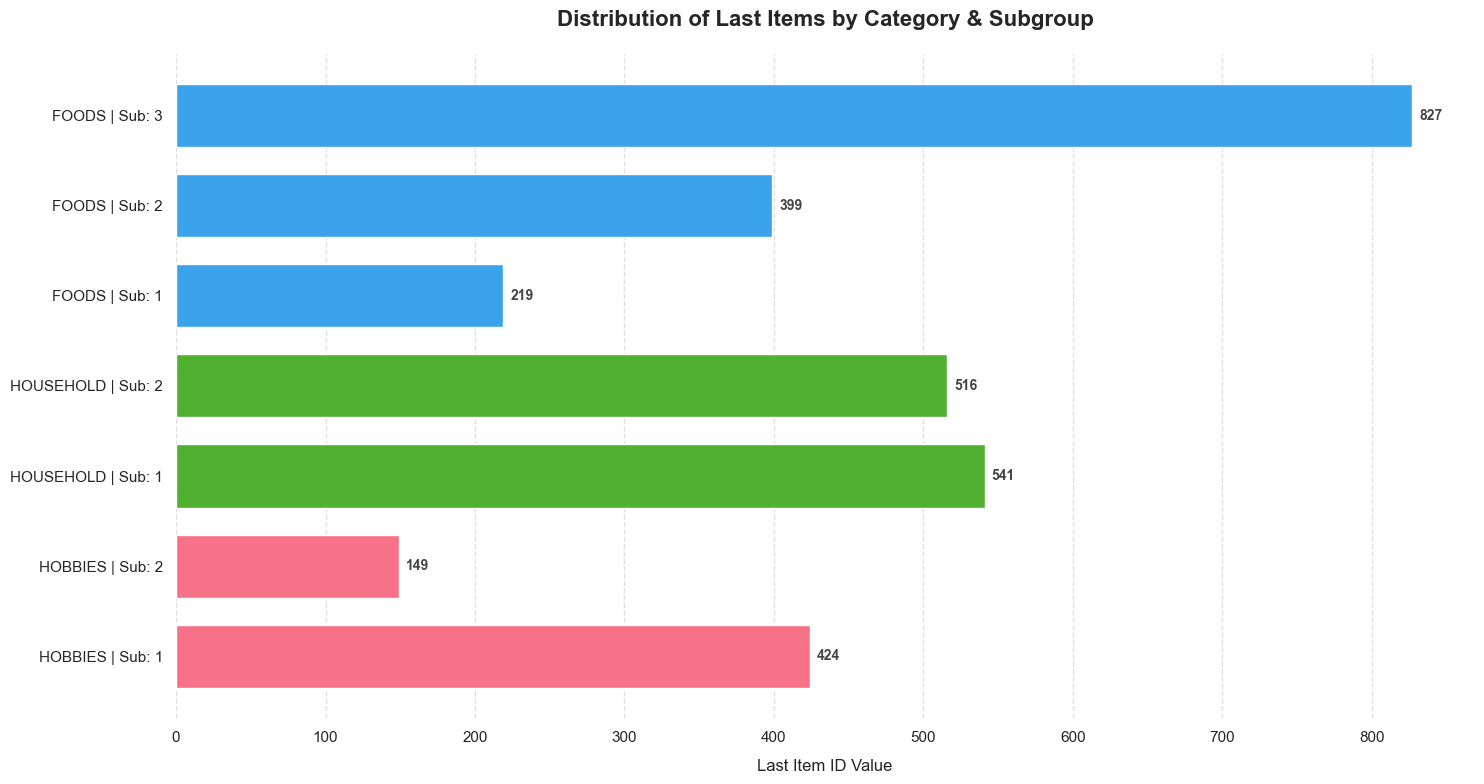

In [13]:

rows = []

for cat in df["cat_id"].unique():
    fo = df[df['cat_id'] == cat].copy()
    
    fo['subgroup'] = fo['item_id'].apply(lambda x: int(re.findall(r'_(\d+)_', x)[0]))
    
    for sub in sorted(fo['subgroup'].unique()):
        sub_df = fo[fo['subgroup'] == sub]
        counts = sub_df['item_id'].value_counts().sort_index()
        
        first_index = counts.index[0]
        last_index = counts.index[-1]
        
        rows.append({
            'cat_id': cat,
            'subgroup': sub,
            'first_item': first_index,
            'last_item': last_index,
        })

result_df = pd.DataFrame(rows)
result_df['last_item'] = result_df['last_item'].str.split('_').str[-1].astype(int)
result_df['first_item'] = result_df['first_item'].str.split('_').str[-1].astype(int)



sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'sans-serif'

fig, ax = plt.subplots(figsize=(15, 8))


colors = sns.color_palette("husl", len(result_df['cat_id'].unique()))
color_map = dict(zip(result_df['cat_id'].unique(), colors))


bars = ax.barh(
    [f"{cat} | Sub: {sg}" for cat, sg in zip(result_df['cat_id'], result_df['subgroup'])],
    result_df['last_item'],
    color=[color_map[c] for c in result_df['cat_id']],
    height=0.7
)


ax.bar_label(bars, padding=5, fontsize=10, fontweight='bold', color='#444444')


ax.set_xlabel('Last Item ID Value', fontsize=12, labelpad=10)
ax.set_title('Distribution of Last Items by Category & Subgroup', fontsize=16, pad=20, fontweight='bold')
ax.xaxis.grid(True, linestyle='--', alpha=0.6)
ax.yaxis.grid(False)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


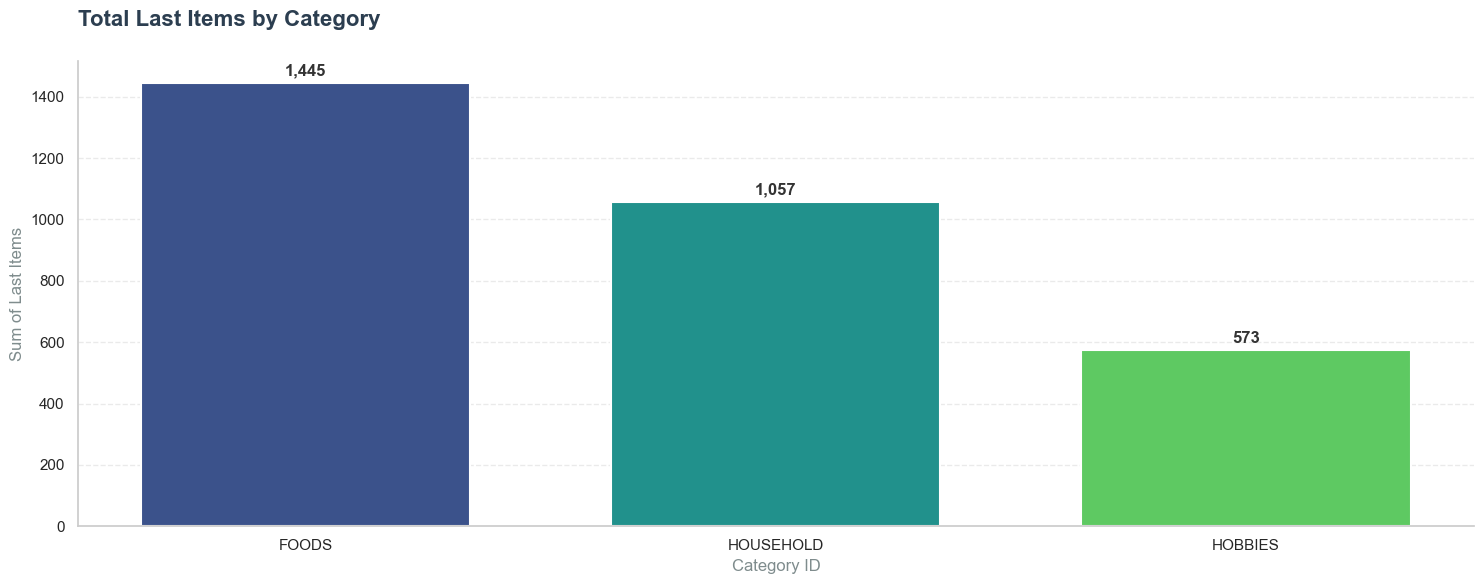

In [12]:

sns.set_style("white")
plt.figure(figsize=(15, 6))


result_df_grouped = result_df.groupby('cat_id').agg({'last_item': 'sum'}).reset_index()
result_df_grouped_sorted = result_df_grouped.sort_values('last_item', ascending=False)


palette = sns.color_palette("viridis", len(result_df_grouped_sorted))

bars = plt.bar(
    result_df_grouped_sorted['cat_id'], 
    result_df_grouped_sorted['last_item'], 
    color=palette,
    edgecolor='white',
    linewidth=1.5,
    width=0.7
)


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2., 
        height + (max(result_df_grouped_sorted['last_item']) * 0.01),
        f'{int(height):,}', 
        ha='center', va='bottom', 
        fontsize=12, fontweight='600', color='#333333'
    )

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#cccccc')
ax.spines['bottom'].set_color('#cccccc')


plt.title('Total Last Items by Category', fontsize=16, fontweight='bold', pad=25, loc='left', color='#2c3e50')
plt.ylabel('Sum of Last Items', fontsize=12, color='#7f8c8d')
plt.xlabel('Category ID', fontsize=12, color='#7f8c8d')


plt.grid(axis='y', linestyle='--', alpha=0.4, zorder=0)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

<div style="
    background: linear-gradient(135deg, #ffffff 0%, #f3e5f5 100%);
    border: 1px solid rgba(142, 68, 173, 0.2);
    border-left: 8px solid #6a1b9a;
    width: 75%;
    margin: 40px auto;
    padding: 30px 40px;
    border-radius: 24px;
    box-shadow: 0 20px 40px rgba(106, 27, 154, 0.1), 0 5px 15px rgba(0, 0, 0, 0.05);
    font-family: 'Segoe UI', Roboto, Helvetica, Arial, sans-serif;
    position: relative;
    display: flex;
    align-items: center;
    gap: 20px;
    overflow: hidden;
">
  <div style="
      position: absolute;
      top: -50px;
      right: -50px;
      width: 150px;
      height: 150px;
      background: radial-gradient(circle, rgba(142, 68, 173, 0.15) 0%, rgba(255, 255, 255, 0) 70%);
      border-radius: 50%;
  "></div>

  <div style="
      background: #6a1b9a;
      width: 50px;
      height: 50px;
      display: flex;
      align-items: center;
      justify-content: center;
      border-radius: 14px;
      font-size: 24px;
      box-shadow: 0 8px 16px rgba(106, 27, 154, 0.3);
      flex-shrink: 0;
  ">🫙</div>

  <div style="flex-grow: 1;">
    <p style="
        color: #2e003e; 
        font-size: 24px; 
        margin: 0; 
        font-weight: 800; 
        letter-spacing: -0.5px;
        line-height: 1.2;
    ">
    </p>
    <p style="
        color: #8e44ad; 
        font-size: 16px; 
        margin: 4px 0 0 0; 
        font-weight: 500;
        text-transform: uppercase;
        letter-spacing: 1px;
    ">
HOBBIES_1_001 This will make 3 columns: the first is the product category, the second is the category of that category, and the third is the product ID.
    </p>
  </div>
</div>

# dept_id

In [301]:
df["dept_id"].value_counts().sort_index()

dept_id
FOODS_1        2160
FOODS_2        3980
FOODS_3        8230
HOBBIES_1      4160
HOBBIES_2      1490
HOUSEHOLD_1    5320
HOUSEHOLD_2    5150
Name: count, dtype: int64

<div class="dataset-description">
  <h2>Product Dataset Overview</h2>
  <p>
    This dataset contains hierarchical information regarding available products, structured across multiple levels of categorization.
  </p>

  <h3>Categorization Structure:</h3>
  <ul>
    <li><strong>cat_id:</strong> Represents the primary product category. For example, the <em>FOODS</em> category is divided into:
      <ul>
        <li>Category 1: Dry Goods</li>
        <li>Category 2: Beverages</li>
        <li>Category 3: Refrigerated Products</li>
      </ul>
    </li>
    <li><strong>subgroup / dept_id:</strong> These columns represent the internal hierarchy and departments within each primary category.</li>
    <li><strong>item_id / first_item / last_item:</strong> Unique identifiers for each product, used to organize and sequence items within their respective subgroups.</li>
  </ul>

  <h3>Key Considerations:</h3>
  <ul>
    <li>All categorical columns (<em>item_id, dept_id, cat_id</em>) offer different granularities of the product hierarchy.</li>
    <li>These classifications enable multi-level analysis, from broad categories down to specific product IDs.</li>
  </ul>
</div>

<style>
.dataset-description {
  font-family: 'Segoe UI', Tahoma, sans-serif;
  line-height: 1.6;
  color: #2d3436;
  max-width: 800px;
  margin: 20px auto;
  padding: 25px;
  background-color: #ffffff;
  border-left: 6px solid #0984e3;
  border-radius: 10px;
  box-shadow: 0 4px 6px rgba(0,0,0,0.1);
}
.dataset-description h2 { color: #0984e3; margin-bottom: 15px; }
.dataset-description h3 { color: #636e72; margin-top: 20px; }
.dataset-description ul { margin-left: 25px; }
.dataset-description li { margin-bottom: 10px; }
</style>

# cat_id

In [302]:
df['cat_id'].value_counts()

cat_id
FOODS        14370
HOUSEHOLD    10470
HOBBIES       5650
Name: count, dtype: int64

<div style="
  display: flex;
  flex-wrap: wrap;
  gap: 16px;
  font-family: Arial, sans-serif;
">

  <!-- FOODS -->
  <div style="
    flex: 1 1 250px;
    border-radius: 12px;
    padding: 16px;
    background: #e3f2fd;
    border-left: 6px solid #1e88e5;
  ">
    <h3 style="margin-top:0; color:#1e88e5;">FOODS</h3>
    <p style="margin:0; color:#333;">
      Category of food products
    </p>
    <p style="font-size:13px; color:#555; margin-top:8px;">
      Includes all food items sold in stores
    </p>
  </div>

  <!-- HOUSEHOLD -->
  <div style="
    flex: 1 1 250px;
    border-radius: 12px;
    padding: 16px;
    background: #e8f5e9;
    border-left: 6px solid #43a047;
  ">
    <h3 style="margin-top:0; color:#2e7d32;">HOUSEHOLD</h3>
    <p style="margin:0; color:#333;">
      Category of household consumables
    </p>
    <p style="font-size:13px; color:#555; margin-top:8px;">
      Daily-use household products
    </p>
  </div>

  <!-- HOBBIES -->
  <div style="
    flex: 1 1 250px;
    border-radius: 12px;
    padding: 16px;
    background: #fff3e0;
    border-left: 6px solid #fb8c00;
  ">
    <h3 style="margin-top:0; color:#ef6c00;">HOBBIES</h3>
    <p style="margin:0; color:#333;">
      Category of non-food and leisure products
    </p>
    <p style="font-size:13px; color:#555; margin-top:8px;">
      Includes entertainment, hobby, and leisure items
    </p>
  </div>

</div>

<p style="font-size:12px; color:#666; margin-top:14px; font-family: Arial;">
These three are the official M5 dataset categories, directly defined in the <code>cat_id</code> column.
</p>


--------------------------------------------------------------------------------------------------------------------------------------------

<div class="dataset-description">
  <h2>Regional & Store-Level Sales Data</h2>
  <p>
    The dataset features two columns with similar naming conventions but distinct functions. One column serves as a <strong>Regional Classification</strong>, utilizing numerical values to identify different regions across the United States.
  </p>

  <h3>Store Hierarchy & Granularity:</h3>
  <ul>
    <li><strong>Store Identifiers:</strong> In states like <strong>CA (California)</strong>, the data is divided into four distinct categories, each representing an independent retail store.</li>
    <li><strong>Data Depth:</strong> For every individual store, there are <strong>3,049 daily sales records</strong>. This provides a complete historical performance log.</li>
    <li><strong>Analytical Potential:</strong> This granular structure is ideal for high-precision store-level analysis and the development of robust <span style="color:#c0392b;font-weight:700">Time-Series Forecasting</span> models.</li>
  </ul>
</div>

<style>
.dataset-description {
  font-family: 'Segoe UI', Arial, sans-serif;
  line-height: 1.7;
  color: #2f3640;
  max-width: 850px;
  margin: 20px auto;
  padding: 25px;
  background: #ffffff;
  border-right: 6px solid #c0392b; /* Changed to right-aligned for consistent UI if mixing RTL/LTR */
  border-radius: 12px;
  box-shadow: 0 10px 25px rgba(0,0,0,0.05);
}
.dataset-description h2 { color: #2d3436; margin-top: 0; }
.dataset-description h3 { color: #c0392b; margin-top: 20px; }
.dataset-description ul { padding-left: 20px; }
.dataset-description li { margin-bottom: 12px; }
</style>

# store_id

In [16]:
from IPython.display import HTML

states = df["state_id"].unique()

html = """
<style>
    @import url('https://fonts.googleapis.com/css2?family=Orbitron:wght@400;700&display=swap');
    
    .main-container {
        background: #0f0c29;
        background: linear-gradient(to right, #24243e, #302b63, #0f0c29);
        padding: 40px;
        border-radius: 30px;
        font-family: 'Segoe UI', Roboto, sans-serif;
    }
    
    .state-section {
        margin-bottom: 50px;
    }
    
    .state-title {
        color: #00d2ff;
        font-family: 'Orbitron', sans-serif;
        font-size: 2.5em;
        text-transform: uppercase;
        letter-spacing: 5px;
        text-shadow: 0 0 15px rgba(0, 210, 255, 0.6);
        margin-bottom: 20px;
        border-bottom: 1px solid rgba(255,255,255,0.1);
    }
    
    .grid {
        display: flex;
        flex-wrap: wrap;
        gap: 20px;
    }
    
    .card {
        background: rgba(255, 255, 255, 0.05);
        backdrop-filter: blur(10px);
        border: 1px solid rgba(255, 255, 255, 0.1);
        padding: 20px;
        border-radius: 20px;
        min-width: 180px;
        transition: all 0.4s cubic-bezier(0.175, 0.885, 0.32, 1.275);
        cursor: pointer;
    }
    
    .card:hover {
        background: rgba(255, 255, 255, 0.15);
        transform: scale(1.1) rotate(2deg);
        box-shadow: 0 15px 30px rgba(0,0,0,0.5);
        border-color: #ff0080;
    }
    
    .store-name {
        display: block;
        color: #aaa;
        font-size: 0.8em;
        text-transform: uppercase;
        margin-bottom: 8px;
    }
    
    .store-id {
        color: #fff;
        font-size: 1.4em;
        font-weight: bold;
    }
    
    .count-value {
        display: block;
        margin-top: 10px;
        font-size: 1.8em;
        font-weight: 800;
        background: linear-gradient(to right, #ff0080, #ff8c00);
        -webkit-background-clip: text;
        -webkit-text-fill-color: transparent;
    }
</style>
<div class="main-container">
"""

for state in states:
    html += f'<div class="state-section"><h2 class="state-title">{state}</h2>'
    counts = df[df["state_id"]==state]["store_id"].value_counts().sort_index()
    html += '<div class="grid">'
    
    for store, count in counts.items():
        html += f"""
        <div class="card">
            <span class="store-name">Registry Unit</span>
            <span class="store-id">{store}</span>
            <span class="count-badge">
                <span class="count-value">{count:,}</span>
                <small style="color:#666; font-size:0.6em;">DAILY RECORDS</small>
            </span>
        </div>
        """
    html += '</div></div>'

html += "</div>"
display(HTML(html))

# state_id

In [304]:
df["state_id"].value_counts()

state_id
CA    12196
TX     9147
WI     9147
Name: count, dtype: int64

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<style>
  body {
    display: flex;
    justify-content: center; 
    align-items: center;     
    height: 100vh;         
    margin: 0;
    background: #f0f0f0;     
  }
  .tag-container {
    display: flex;
    flex-wrap: wrap;
    gap: 10px;
    text-align: center;
  }
  .tag {
    background: black; 
    color: white;
    padding: 8px 14px;
    border-radius: 12px;
    font-weight: bold;
    box-shadow: 0 2px 5px rgba(0,0,0,0.2);
    transition: transform 0.2s;
  }

</style>
</head>
<body>

<div class="tag-container">
  <div class="tag">CA → California</div>
  <div class="tag">TX → Texas</div>
  <div class="tag">WI → Wisconsin</div>
</div>

</body>
</html>



<style>
  body {
    font-family: Tahoma, Arial, sans-serif;
    line-height: 1.7;
    background-color: #f9f9f9;
    color: #333;
    margin: 20px;
  }
  .report-container {
    color: black;
    max-width: 800px;
    margin: 0 auto;
    background-color: #fff;
    padding: 25px 30px;
    border-radius: 12px;
    box-shadow: 0 4px 15px rgba(0,0,0,0.1);
    border: 1px solid #ddd;
  }
  .report-container p {
    margin-bottom: 18px;
    text-align: justify;
  }
  strong {
    color: #1a73e8;
  }
</style>

<div class="report-container">
  <p>حالا به ستون‌هایی می‌رسیم که با حرف <strong>D</strong> شروع می‌شوند و یک عدد جلوی آن‌ها قرار دارد. در نگاه اول مشخص است که این ستون‌ها نشان‌دهنده روزهای فروش هستند، از روز اول شروع شده و تا روز 1913 ادامه یافته است، تقریباً بیش از 5 سال داده روزانه فروش را پوشش می‌دهد. هر ستون معادل یک روز فروش است. در ادامه، این ستون‌ها از جدول اصلی جدا می‌شوند تا تحلیل و پردازش داده‌ها راحت‌تر و سازمان‌یافته‌تر انجام شود.</p>
</div>


In [392]:
day=df.iloc[:,6:]
day.head()


,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


یه روز رو باز کنیم ببینم داخلش چطوریه 

In [306]:
df["d_1"].describe()

count    30490.000000
mean         1.070220
std          5.126689
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        360.000000
Name: d_1, dtype: float64

In [307]:
df["d_1"].value_counts().sort_index().head(5)

d_1
0    23511
1     2385
2     1313
3      881
4      599
Name: count, dtype: int64

<div style="font-family:Vazirmatn,sans-serif;font-size:14px;line-height:1.9;color:#2f3640;background:rgba(255,255,255,.9);padding:20px 22px;border-radius:16px;box-shadow:0 10px 22px rgba(0,0,0,.06);max-width:900px;margin:20px auto"dir="rtl"><p style="margin:0 0 10px 0"><b>mean = 1.07</b> → این مقدار گمراه‌کننده است، زیرا توزیع داده‌ها به‌شدت <b>صفرمحور</b> بوده و میانگین در این شرایط قدرت تحلیلی معناداری ندارد.</p><p style="margin:0 0 10px 0"><b>std = 5.12</b> → انحراف معیار چندین برابر میانگین است که نشان‌دهنده پراکندگی شدید و وجود <span style="color:#c0392b;font-weight:700">outlier</span>‌هاست.</p><p style="margin:0 0 10px 0"><b>۷۵٪ داده‌ها فروش صفر داشته‌اند</b> → این موضوع توزیع را به‌شدت نابرابر و غیرنرمال می‌کند.</p><p style="margin:0"><b>median = 0</b> → توزیع کاملاً <span style="color:#c0392b;font-weight:700">right-skewed</span> است و نشان می‌دهد اکثریت مطلق محصولات در این روز هیچ فروشی نداشته‌اند.</p></div>


In [308]:
flags = []

for i in day.columns:
    s = df[i]
    desc = s.describe()

    cv = desc["std"] / (desc["mean"] + 1e-6)
    zero_ratio = (s == 0).mean()

    Q1, Q3 = s.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    outlier_ratio = ((s < Q1 - 1.5*IQR) | (s > Q3 + 1.5*IQR)).mean()

    if cv > 2 and outlier_ratio > 0.05 and zero_ratio < 0.7:
        flags.append(i)

In [309]:
display(len(flags))

1160

In [310]:
outlier=day[flags].head()

<p style="font-family:Vazirmatn,sans-serif;font-size:14px;line-height:1.9;color:#2f3640;background:rgba(255,255,255,.9);padding:18px 20px;border-radius:14px;box-shadow:0 8px 18px rgba(0,0,0,.06);max-width:900px;margin:20px auto"dir="rtl">این مقادیر به احتمال زیاد <b>دارای داده‌های پرت (outlier)</b> هستند. تحلیل دقیق و بررسی کامل آن‌ها در بخش بعدی آنالیز انجام خواهد شد تا تأثیرشان بر نتایج مشخص گردد.</p>


# دیتاست دوم 

In [311]:
df1.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1



<style>
        body {
            font-family: Vazirmatn, Tahoma, sans-serif;
            background-color: #f4f6f8;
            direction: rtl;
            padding: 40px;
        }
        .info-box {
            max-width: 700px;
            background-color: #ffffff;
            border-radius: 12px;
            padding: 24px 28px;
            box-shadow: 0 8px 20px rgba(0, 0, 0, 0.08);
            border-right: 6px solid #4f46e5;
        }
        .info-box h2 {
            margin: 0 0 16px 0;
            font-size: 20px;
            color: #1f2937;
        }
        .info-box p {
            font-size: 15px;
            line-height: 1.9;
            color: #374151;
            margin-bottom: 16px;
       }
       .columns {
            display: flex;
            flex-wrap: wrap;
            gap: 10px;
        }
        .column-tag {
            background-color: #eef2ff;
            color: #4338ca;
            padding: 6px 12px;
            border-radius: 8px;
            font-size: 14px;
            font-weight: 500;
        }
    </style>


<div class="info-box">
    <h2>ویژگی‌های زمانی دیتاست دوم</h2>
    <p>
        دیتاست دوم شامل <strong>۱۴ ستون</strong> است که بخشی از آن‌ها به اطلاعات
        تقویمی و زمانی اختصاص دارد. این ویژگی‌ها نقش مهمی در تحلیل روندها،
        الگوهای فصلی و رفتار داده‌ها در طول زمان ایفا می‌کنند.
    </p>
    <div class="columns">
        <div class="column-tag">date</div>
        <div class="column-tag">wm_yr_wk</div>
        <div class="column-tag">wday</div>
        <div class="column-tag">month</div>
        <div class="column-tag">year</div>
    </div>
</div>




<style>
        body {
            font-family: Vazirmatn, Tahoma, sans-serif;
            direction: rtl;
            background-color: #f3f4f6;
            padding: 40px;
        }

        .wrapper {
            max-width: 900px;
            margin: auto;
            display: flex;
            flex-direction: column;
            gap: 20px;
        }

        .box {
            background-color: #ffffff;
            border-radius: 14px;
            padding: 22px 26px;
            box-shadow: 0 8px 22px rgba(0, 0, 0, 0.08);
            border-right: 6px solid #4f46e5;
        }

        .box h3 {
            margin: 0 0 12px 0;
            font-size: 18px;
            color: #1f2937;
        }

        .box p {
            margin: 0;
            font-size: 15px;
            line-height: 1.9;
            color: #374151;
        }

        .tags {
            margin-top: 14px;
            display: flex;
            flex-wrap: wrap;
            gap: 8px;
        }

        .tag {
            background-color: #eef2ff;
            color: #4338ca;
            padding: 6px 12px;
            border-radius: 8px;
            font-size: 13px;
            font-weight: 500;
        }
    </style>
</head>
<body>

<div class="wrapper">
    <div class="box">
        <h3>ویژگی‌های هفتگی</h3>
        <p>
            ستون <strong>wday</strong> روز هفته را برای هر مشاهده مشخص می‌کند
            و برای تحلیل الگوهای تکرارشونده هفتگی و تفاوت رفتار فروش بین روزهای
            هفته استفاده می‌شود.
        </p>
        <div class="tags">
            <div class="tag">wday</div>
        </div>
    </div>
    <div class="box">
        <h3>ویژگی‌های رویداد (Event)</h3>
        <p>
            ستون‌های <strong>event_name</strong> و <strong>event_type</strong>
            به‌ترتیب نام رویداد و نوع آن را نمایش می‌دهند. این ویژگی‌ها
            برای مدل‌سازی اثر تعطیلات، مناسبت‌ها و رویدادهای خاص بر میزان فروش
            به‌کار می‌روند.
        </p>
        <div class="tags">
            <div class="tag">event_name</div>
            <div class="tag">event_type</div>
        </div>
    </div>

</div>





<style>
        body {
            font-family: Vazirmatn, Tahoma, sans-serif;
            direction: rtl;
            background-color: #f5f7fa;
            padding: 40px;
        }
        .container {
            max-width: 900px;
            margin: auto;
            display: grid;
            grid-template-columns: repeat(auto-fit, minmax(260px, 1fr));
            gap: 20px;
        }
        .card {
            background-color: #ffffff;
            border-radius: 14px;
            padding: 22px;
            box-shadow: 0 10px 25px rgba(0, 0, 0, 0.08);
            border-top: 5px solid #2563eb;
        }
        .card h3 {
            margin: 0 0 12px 0;
            font-size: 18px;
            color: #1f2937;
        }
        .card p {
            font-size: 14.5px;
            line-height: 1.9;
            color: #374151;
            margin: 0;
        }
        .badge {
            display: inline-block;
            margin-top: 14px;
            padding: 6px 12px;
            background-color: #eff6ff;
            color: #1d4ed8;
            border-radius: 8px;
            font-size: 13px;
            font-weight: 500;
        }
    </style>


<div class="container">
    <div class="card">
        <h3>snap_CA</h3>
        <p>
            این ستون نشان می‌دهد آیا در روز موردنظر، برنامه کمک غذایی SNAP
            در ایالت کالیفرنیا فعال بوده است یا خیر. فعال بودن این برنامه معمولاً
            با افزایش تقاضا و فروش در برخی دسته‌های کالایی همراه است.
        </p>
        <div class="badge">۱ = فعال | ۰ = غیرفعال</div>
    </div>
    <div class="card">
        <h3>snap_TX</h3>
        <p>
            این ستون بیانگر وضعیت فعال بودن برنامه SNAP در ایالت تگزاس است.
            این ویژگی برای شناسایی پیک‌های فروش غیرعادی که ناشی از پرداخت
            کمک‌های غذایی هستند، اهمیت بالایی دارد.
        </p>
        <div class="badge">۱ = فعال | ۰ = غیرفعال</div>
    </div>
    <div class="card">
        <h3>snap_WI</h3>
        <p>
            این ستون مشخص می‌کند که آیا برنامه کمک غذایی SNAP در ایالت
            ویسکانسین در آن روز فعال بوده است یا نه. تفاوت تقویم SNAP بین ایالت‌ها
            باعث می‌شود این ویژگی نقش مهمی در تحلیل منطقه‌ای داشته باشد.
        </p>
        <div class="badge">۱ = فعال | ۰ = غیرفعال</div>
    </div>

</div>


<div  style="
    background: linear-gradient(145deg, #0d0d0d, #1a1a1a);
    border-left: 12px solid rgb(255, 0, 0);
    width: 50%;
    margin: 40px auto;
    padding: 24px 32px;
    border-radius: 20px;
    box-shadow: 0 0 12px rgba(255, 0, 0, 0.3), inset 0 0 20px rgba(255, 0, 0, 0.1);
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    position: relative;
    overflow: hidden;
    text-align: center;
">
  <div style="
      position: absolute;
      top: -22px;
      right: -20px;
      background:rgb(56, 4, 4);
      color: white;
      font-size: 40px;
      padding: 10px 16px;
      border-radius: 50%;
      box-shadow: 0 0 10px rgba(255, 0, 0, 0.8);
      font-weight: bold;
  "></div>
  <p id="eda" style="color: rgb(255, 0, 0); font-size: 35px; margin: 0; font-weight: bold; letter-spacing: 2px;">
    EDA
  </p>
</div>


<p style="font-family:Vazirmatn,sans-serif;font-size:14px;line-height:1.9;color:#2f3640;background:rgba(255,255,255,.9);padding:18px 20px;border-radius:14px;box-shadow:0 8px 18px rgba(0,0,0,.06);max-width:900px;margin:20px auto"dir="rtl">در این مرحله، به بررسی کامل داده‌ها می‌پردازیم: اطمینان حاصل می‌کنیم که داده‌ها <b>سالم و کامل</b> باشند، داده‌های گمشده را پر می‌کنیم، نویز و داده‌های پرت را مدیریت می‌کنیم، نمودارهای مختلف رسم می‌کنیم و تحلیل‌های آماری و بصری انجام می‌دهیم. در نهایت، <b>نتیجه‌گیری دقیقی</b> درباره این دیتاست ارائه خواهد شد.</p>


اول می یایم دو تا دیتاست رو بام ترکیب می کنیم merge می گنیم ⬇️

In [312]:
# day = [col for col in df.columns if col.startswith("d_")]
# # 1️⃣ محاسبه میانگین و مجموع فروش روزانه بر اساس store × dept
# # =============================
# df_agg = df.groupby(["store_id","dept_id"])[day].mean().reset_index()  # میانگین
# df_sum = df.groupby(["store_id","dept_id"])[day].sum().reset_index()   

# # =============================
# # 2️⃣ melt 
# # =============================
# sales_long = df_agg.melt(
#     id_vars=["store_id","dept_id"],
#     value_vars=day,
#     var_name="d",
#     value_name="mean_sales"
# )


# sales_sum_long = df_sum.melt(
#     id_vars=["store_id","dept_id"],
#     value_vars=day,
#     var_name="d",
#     value_name="sum_sales"
# )


# eda_df = sales_long.merge(sales_sum_long, on=["store_id","dept_id","d"], how="left")

# # =============================
# # 3️⃣ merge 
# # =============================
# eda_df = eda_df.merge(df1, on="d", how="left")


# eda_df["sales_vs_daily_mean"] = eda_df["mean_sales"] / eda_df.groupby("d")["mean_sales"].transform("mean")
# eda_df["sales_zscore"] = (eda_df["mean_sales"] - eda_df.groupby("d")["mean_sales"].transform("mean")) / eda_df.groupby("d")["mean_sales"].transform("std")

# # =============================
# # 5️⃣ بهینه سازی dtype برای RAM
# # =============================
# eda_df = eda_df.astype({
#     "mean_sales": "float32",
#     "sum_sales": "float32",
#     "sales_vs_daily_mean": "float32",
#     "sales_zscore": "float32",
#     "wday": "int8",
#     "month": "int8",
#     "year": "int16",
#     "snap_CA": "int8",
#     "snap_TX": "int8",
#     "snap_WI": "int8"
# })
# print("ok")



In [475]:
day_cols = [c for c in df.columns if c.startswith("d_")]

daily_total_sales = []
for c in day_cols:
    daily_total_sales.append(df[c].sum())

eda_daily = pd.DataFrame({
    "d": day_cols,      
    "total_sales": daily_total_sales
})


calendar_cols = [
    "d", "wday", "weekday", "month", "year",
    "event_name_1", "event_type_1",
    "snap_CA", "snap_TX", "snap_WI"
]

eda_daily = eda_daily.merge(df1[calendar_cols], on="d", how="left")

eda_daily["log_total_sales"] = np.log1p(eda_daily["total_sales"])
eda_daily["sales_zscore"] = (
    eda_daily["total_sales"] - eda_daily["total_sales"].mean()
) / eda_daily["total_sales"].std()

print("EDA daily ready ✅")
eda_daily.head()


EDA daily ready ✅


,d,total_sales,wday,weekday,month,year,event_name_1,event_type_1,snap_CA,snap_TX,snap_WI,log_total_sales,sales_zscore
0,d_1,32631,1,Saturday,1,2011,NaN,NaN,0,0,0,10.393049,-0.232859
1,d_2,31749,2,Sunday,1,2011,NaN,NaN,0,0,0,10.365648,-0.352926
2,d_3,23783,3,Monday,1,2011,NaN,NaN,0,0,0,10.076768,-1.437340
3,d_4,25412,4,Tuesday,2,2011,NaN,NaN,1,1,0,10.143016,-1.215584
4,d_5,19146,5,Wednesday,2,2011,NaN,NaN,1,0,1,9.859901,-2.068576


In [476]:
store_dept_eda = df.groupby(["store_id", "dept_id"])[day_cols].mean().reset_index()
store_dept_eda = store_dept_eda.rename(columns={c: f"avg_{c}" for c in day_cols})

print("Store × Dept EDA ready ✅")
store_dept_eda.head()


Store × Dept EDA ready ✅


,store_id,dept_id,avg_d_1,avg_d_2,avg_d_3,avg_d_4,avg_d_5,avg_d_6,avg_d_7,avg_d_8,...,avg_d_1904,avg_d_1905,avg_d_1906,avg_d_1907,avg_d_1908,avg_d_1909,avg_d_1910,avg_d_1911,avg_d_1912,avg_d_1913
0,CA_1,FOODS_1,1.375000,1.314815,0.990741,0.810185,0.842593,0.884259,1.037037,1.217593,...,1.356481,1.467593,1.240741,1.398148,1.097222,1.328704,1.375000,1.532407,1.939815,1.523148
1,CA_1,FOODS_2,1.693467,1.645729,0.994975,1.195980,0.889447,1.221106,1.391960,1.876884,...,1.092965,1.253769,1.600503,1.329146,0.982412,1.062814,0.917085,1.228643,1.482412,1.844221
2,CA_1,FOODS_3,2.755772,2.670717,1.698663,1.952612,1.817740,2.102066,2.326853,3.586877,...,2.403402,3.238153,3.765492,2.496962,2.260024,2.162819,2.273390,2.600243,3.215067,3.633050
3,CA_1,HOBBIES_1,1.269231,1.175481,0.983173,0.920673,0.632212,1.088942,0.814904,1.802885,...,0.889423,1.658654,1.435096,1.242788,1.108173,0.800481,0.913462,1.132212,1.492788,1.540865
4,CA_1,HOBBIES_2,0.187919,0.060403,0.040268,0.060403,0.033557,0.093960,0.046980,0.127517,...,0.208054,0.214765,0.389262,0.167785,0.228188,0.201342,0.201342,0.375839,0.328859,0.489933


In [477]:
sample_items = df.sample(300, random_state=42)

item_eda = sample_items.melt(
    id_vars=["item_id", "store_id", "dept_id"],
    value_vars=day_cols,
    var_name="d",
    value_name="sales"
)


item_eda.head()


,item_id,store_id,dept_id,d,sales
0,FOODS_3_180,CA_1,FOODS_3,d_1,0
1,HOUSEHOLD_2_383,CA_3,HOUSEHOLD_2,d_1,2
2,FOODS_3_409,CA_3,FOODS_3,d_1,0
3,FOODS_1_097,CA_2,FOODS_1,d_1,0
4,HOBBIES_1_272,TX_2,HOBBIES_1,d_1,0


<div dir="rtl" style="text-align:right; font-family:sans-serif; background-color:#111; color:#eee; border-radius:12px; padding:20px; line-height:1.6; max-width:800px; margin:20px auto; box-shadow:0 0 15px rgba(0,0,0,0.5);">
    <h2 style="color:#39FF14; margin-bottom:10px;">EDA دیتاست M5</h2>
    <p>ما برای تحلیل اولیه فروش در دیتاست M5، سه دیتاست سبک و <span dir="ltr">RAM-friendly</span> ساختیم که هر کدام هدف و کاربرد مشخصی دارند و آماده بررسی و <span dir="ltr">visualization</span> هستند.</p>
    <h3 style="color:#F4F142; margin-top:20px;">1. دیتاست <span dir="ltr">eda_daily</span> – فروش کل روزانه</h3>
    <p>این دیتاست شامل مجموع فروش روزانه کل محصولات است. ستون‌های اصلی عبارتند از <span dir="ltr">d</span> (شماره روز)، <span dir="ltr">total_sales</span> (مجموع فروش)، <span dir="ltr">log_total_sales</span> (لگاریتم مجموع فروش برای بررسی توزیع skewed) و <span dir="ltr">sales_zscore</span> (برای شناسایی روزهای غیرعادی). همچنین ستون‌های زمان و رویداد شامل <span dir="ltr">wday, month, year, event_name_1, snap_CA</span> و ... در آن موجود است.</p>
    <p>هدف از این دیتاست: مشاهده <span dir="ltr">trend</span> کلی فروش، شناسایی <span dir="ltr">outlier</span> روزانه، تحلیل اثر رویدادها و <span dir="ltr">SNAP</span>، بررسی zero-heavy بودن و آماده‌سازی برای نمودارهای روزانه.</p>
    <h3 style="color:#F4F142; margin-top:20px;">2. دیتاست <span dir="ltr">store_dept_eda</span> – میانگین فروش <span dir="ltr">store × dept</span></h3>
    <p>در این دیتاست هر سطر مربوط به یک ترکیب فروشگاه و دسته محصول است و شامل میانگین فروش هر روز (<span dir="ltr">avg_d_1, avg_d_2 ...</span>) و یک ستون خلاصه <span dir="ltr">avg_daily_sales</span> برای میانگین کل دوره می‌باشد.</p>
    <p>هدف از این دیتاست: تحلیل توزیع فروش بین فروشگاه‌ها و دسته‌ها، شناسایی پرفروش‌ترین و کم‌فروش‌ترین <span dir="ltr">store/dept</span>، بررسی نوسانات فروش بین <span dir="ltr">store</span>ها، آماده‌سازی برای تحلیل <span dir="ltr">trend</span> و مقایسه aggregate بدون مصرف زیاد <span dir="ltr">RAM</span>.</p>
    <h3 style="color:#F4F142; margin-top:20px;">3. دیتاست <span dir="ltr">item_eda</span> – نمونه <span dir="ltr">item-level</span></h3>
    <p>این دیتاست شامل نمونه‌ای از ۳۰۰ محصول است و ستون‌های اصلی آن <span dir="ltr">item_id, store_id, dept_id, d, sales</span> می‌باشد. این نمونه برای بررسی دقیق توزیع فروش محصولات و رفتار هر <span dir="ltr">item</span> در طول زمان استفاده می‌شود.</p>
    <p>هدف از این دیتاست: تحلیل توزیع واقعی فروش محصولات، شناسایی <span dir="ltr">outlier</span>، بررسی zero-heavy بودن، اثر رویدادها و <span dir="ltr">SNAP</span> روی محصولات نمونه، آماده‌سازی برای نمودارهای دقیق محصول به محصول.</p>
    <h3 style="color:#39FF14; margin-top:20px;">جمع‌بندی</h3>
    <p>هدف نهایی از ساخت این سه دیتاست: کاهش حجم داده برای تحلیل بدون <span dir="ltr">MemoryError</span>، فراهم کردن دید multi-level (روزانه، <span dir="ltr">store × dept</span> و <span dir="ltr">item-level</span>)، شناسایی <span dir="ltr">trend</span> و <span dir="ltr">outlier</span>ها، بررسی اثر تقویم و رویدادها و آماده‌سازی داده‌ها برای EDA کامل و <span dir="ltr">visualization</span> حرفه‌ای قبل از مدل‌سازی.</p>

</div>


# خب بریم و ببینم در چه وضعیه این دیتاست ها  

 
<div id="Feature" style="    
    width: 90%; 
    max-width: 400px; 
    margin: 20px auto;
    padding: 18px 10px;
    background: linear-gradient(145deg, #0f0f0f, #151515);
    border-radius: 12px;
    border: 1px solid #c20000;
    box-shadow: 0 0 20px rgba(194, 0, 0, 0.2), inset 0 0 5px rgba(194, 0, 0, 0.1);   
    color: #c20000;
    text-align: center;
    font-family: 'Segoe UI', system-ui, -apple-system, sans-serif;
    font-size: clamp(18px, 5vw, 24px); /* فونت هوشمند که با سایز صفحه تغییر میکند */
    font-weight: 800;
    text-transform: uppercase;
    letter-spacing: 3px;
    text-shadow: 0 0 10px rgba(194, 0, 0, 0.5);   
    position: relative;
    overflow: hidden;
">
    <div style="position: absolute; top: 0; left: 50%; transform: translateX(-50%); width: 40%; height: 2px; background: #c20000; box-shadow: 0 0 10px #c20000;"></div>   
     بررسی ابعاد و نوع داده‌ها  
</div>

In [316]:
Data=[item_eda,store_dept_eda,eda_daily]

In [506]:

html_wrapper = '<div style="display: flex; flex-wrap: wrap; gap: 20px; justify-content: flex-start;">'

for idx, df in enumerate(Data, 1):

    card_html = f"""
    <div style="color:black;flex: 1; min-width: 300px; max-width: 450px; border: 1px solid #e5e7eb; 
                border-radius: 12px; padding: 15px; box-shadow: 0 4px 6px -1px rgba(0,0,0,0.1); 
                background-color: white; font-family: sans-serif;">
        <div style="background-color: #4f46e5; color: white; padding: 8px 15px; 
                    border-radius: 8px; margin-bottom: 10px; display: flex; justify-content: space-between;">
            <span style="font-weight: bold;">Data {idx}</span>
            <span style="font-size: 0.85em;">{df.shape[0]}R × {df.shape[1]}C</span>
        </div>
        <div style="overflow-x: auto; font-size: 0.9em;">
            {df.describe().to_html(classes='table table-hover')}
        </div>
    </div>
    """
    html_wrapper += card_html

html_wrapper += '</div>'

display(HTML(html_wrapper))

In [510]:
Data1 = [item_eda,eda_daily]
def get_dtype_list(df):
    sub = df.dtypes.sort_values().head(15)
    items = ""
    for col, dt in sub.items():
        color = "#10b981" if 'int' in str(dt) else "#3b82f6" if 'float' in str(dt) else "#ef4444"
        items += f"<li style='margin-bottom:4px'><b>{col}:</b> <span style='color:{color}'>{dt}</span></li>"
    return items

# ساخت تگ‌ها برای باکس سوم
obj_tags = "".join([f"<span style='background:#6366f1; color:white; padding:2px 8px; border-radius:4px; margin:2px; display:inline-block; font-size:11px;'>{c}</span>" 
                    for c in store_dept_eda.select_dtypes(include='object').columns])

html_code = f"""
<div style="display: flex; gap: 20px; font-family: 'Segoe UI', Tahoma, sans-serif; background: #f1f5f9; padding: 25px; border-radius: 15px;">
    
    <div style="flex: 1; background: white; border-top: 5px solid #10b981; border-radius: 8px; padding: 15px; box-shadow: 0 4px 15px rgba(0,0,0,0.05);">
        <h3 style="margin-top:0; color:#1e293b; font-size:16px;">📊 {names[0]}</h3>
        <ul style="list-style:none; padding:0; font-size:13px; color:#475569;">
            {get_dtype_list(Data1[0])}
        </ul>
    </div>

    <div style="flex: 1; background: white; border-top: 5px solid #3b82f6; border-radius: 8px; padding: 15px; box-shadow: 0 4px 15px rgba(0,0,0,0.05);">
        <h3 style="margin-top:0; color:#1e293b; font-size:16px;">📈 {names[1]}</h3>
        <ul style="list-style:none; padding:0; font-size:13px; color:#475569;">
            {get_dtype_list(Data1[1])}
        </ul>
    </div>

    <div style="flex: 1; background: white; border-top: 5px solid #6366f1; border-radius: 8px; padding: 15px; box-shadow: 0 4px 15px rgba(0,0,0,0.05); display: flex; flex-direction: column;">
        <h3 style="margin-top:0; color:#1e293b; font-size:16px;">🔍 store_dept_eda</h3>
        <div style="flex-grow: 1;">
            <p style="font-size:12px; color:#64748b; margin-bottom:10px;">ستون‌های از نوع Object:</p>
            {obj_tags}
        </div>
        <div style="margin-top:15px; padding-top:10px; border-top:1px solid #f1f5f9; font-size:11px; color:#94a3b8; font-style:italic;">
            ✨ مابقی ستون‌ها همگی عددی هستند
        </div>
    </div>

</div>
"""

display(HTML(html_code))

<div style="display: flex; flex-wrap: wrap; gap: 15px; direction: rtl; font-family: Tahoma, sans-serif; justify-content: center; background-color: #f0f2f5; padding: 20px; border-radius: 15px;">
    <div style="flex: 1; min-width: 250px; background: white; border-radius: 12px; padding: 20px; box-shadow: 0 4px 10px rgba(0,0,0,0.05); border-top: 5px solid #16a085;">
        <h3 style="margin: 0 0 15px 0; color: #16a085; font-size: 1.2em;">۱. item_eda</h3>
        <p style="font-size: 0.9em; color: #555;">تعداد ستون‌ها: <strong>۶</strong></p>
        <hr style="border: 0; border-top: 1px solid #eee; margin: 10px 0;">
        <ul style="list-style: none; padding: 0; font-size: 0.85em; line-height: 1.8;">
            <li><span style="color: #059669; font-weight: bold;">● int64:</span> ۱ ستون <small>(sales)</small></li>
            <li><span style="color: #2563eb; font-weight: bold;">● float64:</span> ۰ ستون</li>
            <li><span style="color: #dc2626; font-weight: bold;">● object:</span> ۴ ستون <br> 
                <span style="background: #fff1f2; color: #be123c; padding: 2px 5px; border-radius: 4px; font-size: 0.8em;">item_id, store_id, dept_id, d</span>
            </li>
        </ul>
    </div>

  <div style="flex: 1; min-width: 250px; background: white; border-radius: 12px; padding: 20px; box-shadow: 0 4px 10px rgba(0,0,0,0.05); border-top: 5px solid #2980b9;">
        <h3 style="margin: 0 0 15px 0; color: #2980b9; font-size: 1.2em;">۲. store_dept_eda</h3>
        <p style="font-size: 0.9em; color: #555;">تعداد ستون‌ها: <strong>۲۱</strong></p>
        <hr style="border: 0; border-top: 1px solid #eee; margin: 10px 0;">
        <ul style="list-style: none; padding: 0; font-size: 0.85em; line-height: 1.8;">
            <li><span style="color: #2563eb; font-weight: bold;">● float64:</span> همه‌ی ستون‌ها <br>
                <small style="color: #666;">(avg_d_956, avg_d_1282, ...)</small>
            </li>
            <li><span style="color: #dc2626; font-weight: bold;">● object:</span> ۲ ستون <br>
                <span style="background: #fff1f2; color: #be123c; padding: 2px 5px; border-radius: 4px; font-size: 0.8em;">store_id, dept_id</span>
            </li>
        </ul>
    </div>
    <div style="flex: 1; min-width: 250px; background: white; border-radius: 12px; padding: 20px; box-shadow: 0 4px 10px rgba(0,0,0,0.05); border-top: 5px solid #8e44ad;">
        <h3 style="margin: 0 0 15px 0; color: #8e44ad; font-size: 1.2em;">۳. eda_daily</h3>
        <p style="font-size: 0.9em; color: #555;">تعداد ستون‌ها: <strong>۱۴</strong></p>
        <hr style="border: 0; border-top: 1px solid #eee; margin: 10px 0;">
        <ul style="list-style: none; padding: 0; font-size: 0.85em; line-height: 1.8;">
            <li><span style="color: #059669; font-weight: bold;">● int64:</span> ۷ ستون <small>(total_sales, snap, ...)</small></li>
            <li><span style="color: #2563eb; font-weight: bold;">● float64:</span> ۲ ستون <small>(log_sales, zscore)</small></li>
            <li><span style="color: #dc2626; font-weight: bold;">● object:</span> ۵ ستون <br>
                <span style="background: #fff1f2; color: #be123c; padding: 2px 5px; border-radius: 4px; font-size: 0.8em;">d, weekday, event_name_1, ...</span>
            </li>
        </ul>
    </div>

</div>


<div id="Feature" style="    
    width: 90%; 
    max-width: 400px; 
    margin: 20px auto;
    padding: 18px 10px;
    background: linear-gradient(145deg, #0f0f0f, #151515);
    border-radius: 12px;
    border: 1px solid #c20000;
    box-shadow: 0 0 20px rgba(194, 0, 0, 0.2), inset 0 0 5px rgba(194, 0, 0, 0.1);   
    color: #c20000;
    text-align: center;
    font-family: 'Segoe UI', system-ui, -apple-system, sans-serif;
    font-size: clamp(18px, 5vw, 24px); /* فونت هوشمند که با سایز صفحه تغییر میکند */
    font-weight: 800;
    text-transform: uppercase;
    letter-spacing: 3px;
    text-shadow: 0 0 10px rgba(194, 0, 0, 0.5);   
    position: relative;
    overflow: hidden;
">
    <div style="position: absolute; top: 0; left: 50%; transform: translateX(-50%); width: 40%; height: 2px; background: #c20000; box-shadow: 0 0 10px #c20000;"></div>   
     مقادیر تکراری     
</div>

In [512]:
names = ['item_eda', 'store_dept_eda', 'eda_daily']  
cards_html = ""
colors = ["#10b981", "#3b82f6", "#8b5cf6"] 

for i, (name, df) in enumerate(zip(names, Data)):
    total_rows = len(df)
    dup_count = df.duplicated().sum()
    dup_pct = (dup_count / total_rows) * 100 if total_rows > 0 else 0
    

    status_color = "#ef4444" if dup_count > 0 else "#10b981"
    
    cards_html += f"""
    <div style="flex: 1; min-width: 250px; background: #ffffff; border-radius: 12px; padding: 15px; box-shadow: 0 4px 6px rgba(0,0,0,0.05); border: 1px solid #e5e7eb;">
        <div style="display: flex; justify-content: space-between; align-items: center; margin-bottom: 10px;">
            <span style="font-weight: bold; color: #1e293b;">{name}</span>
            <span style="font-size: 10px; background: {status_color}22; color: {status_color}; padding: 2px 8px; border-radius: 10px;">
                { 'Duplicate Found' if dup_count > 0 else 'Clean' }
            </span>
        </div>
        
        <div style="font-size: 20px; font-weight: bold; color: #1e293b; margin-bottom: 5px;">
            {dup_count:,} <span style="font-size: 12px; color: #64748b; font-weight: normal;">ردیف تکراری</span>
        </div>
        
        <div style="width: 100%; background: #f1f5f9; height: 8px; border-radius: 4px; overflow: hidden; margin-top: 10px;">
            <div style="width: {max(dup_pct, 2) if dup_count > 0 else 0}%; background: {status_color}; height: 100%; border-radius: 4px;"></div>
        </div>
        
        <div style="display: flex; justify-content: space-between; margin-top: 8px; font-size: 11px; color: #94a3b8;">
            <span>کل ردیف‌ها: {total_rows:,}</span>
            <span>{dup_pct:.2f}%</span>
        </div>
    </div>
    """

final_layout = f"""
<div style="display: flex; flex-wrap: wrap; gap: 15px; direction: rtl; font-family: Tahoma, sans-serif; padding: 10px;">
    {cards_html}
</div>
"""

display(HTML(final_layout))

تکراری نداشتیم 


<div id="Feature" style="    
    width: 90%; 
    max-width: 400px; 
    margin: 20px auto;
    padding: 18px 10px;
    background: linear-gradient(145deg, #0f0f0f, #151515);
    border-radius: 12px;
    border: 1px solid #c20000;
    box-shadow: 0 0 20px rgba(194, 0, 0, 0.2), inset 0 0 5px rgba(194, 0, 0, 0.1);   
    color: #c20000;
    text-align: center;
    font-family: 'Segoe UI', system-ui, -apple-system, sans-serif;
    font-size: clamp(18px, 5vw, 24px); /* فونت هوشمند که با سایز صفحه تغییر میکند */
    font-weight: 800;
    text-transform: uppercase;
    letter-spacing: 3px;
    text-shadow: 0 0 10px rgba(194, 0, 0, 0.5);   
    position: relative;
    overflow: hidden;
">
    <div style="position: absolute; top: 0; left: 50%; transform: translateX(-50%); width: 40%; height: 2px; background: #c20000; box-shadow: 0 0 10px #c20000;"></div>   
    Null / Missing     
</div>

In [521]:
from IPython.display import HTML, display

Data=[item_eda,eda_daily]
names = ['item_eda','eda_daily']

cards = ""

for name, i in zip(names, Data):
    missing_pct = i.isnull().mean() * 100
    table_rows = "".join(
        f"<tr><td>{col}</td><td>{val:.2f}%</td></tr>"
        for col, val in missing_pct.sort_values().items()
    )
    cards += f"""
    <div class="card">
        <h3>{name}</h3>
        <table>
            <tr><th>ستون</th><th>درصد داده گمشده</th></tr>
            {table_rows}
        </table>
    </div>
    """

missing_pct = store_dept_eda.isnull().mean() * 100
missing_cols = missing_pct[missing_pct > 0].sort_values()

store_rows = "".join(
    f"<tr><td>{col}</td><td>{val:.2f}%</td></tr>"
    for col, val in missing_cols.items()
)

html = f"""
<style>
.dashboard {{
    font-family: Vazirmatn, Arial, sans-serif;
    display: grid;
    grid-template-columns: repeat(auto-fit, minmax(320px, 1fr));
    gap: 16px;
}}
.card {{
    background: linear-gradient(135deg, #1e293b, #0f172a);
    border-radius: 14px;
    padding: 16px;
    color: #e5e7eb;
    box-shadow: 0 8px 20px rgba(0,0,0,0.25);
}}
.card h3 {{
    margin: 0 0 10px;
    font-size: 18px;
    color: #38bdf8;
}}
table {{
    width: 100%;
    border-collapse: collapse;
    font-size: 14px;
}}
th, td {{
    padding: 8px;
    text-align: right;
}}
th {{
    background: rgba(255,255,255,0.08);
    color: #fbbf24;
}}
tr:nth-child(even) {{
    background: rgba(255,255,255,0.04);
}}
.badge {{
    display: inline-block;
    margin-top: 6px;
    padding: 6px 12px;
    background: #22c55e;
    color: #052e16;
    border-radius: 999px;
    font-size: 13px;
    font-weight: 600;
}}
</style>

<div class="dashboard">
    {cards}
    <div class="card">
        <h3>store_dept_eda</h3>
        <span class="badge">تعداد ستون‌های دارای داده گمشده: {len(missing_cols)}</span>
        <table>
            <tr><th>ستون</th><th>درصد داده گمشده</th></tr>
            {store_rows}
        </table>
    </div>
</div>
"""

display(HTML(html))


ستون,درصد داده گمشده
item_id,0.00%
store_id,0.00%
dept_id,0.00%
d,0.00%
sales,0.00%
ستون,درصد داده گمشده
d,0.00%
total_sales,0.00%
wday,0.00%
weekday,0.00%


<p style="color: green; font-size: 16px;">
ستون رویدادها را برای روزهایی که رویدادی نبوده، پر می‌کنیم با یک روز معمولی تا در آینده بتوانیم تحلیل‌ها را روی آن انجام دهیم. ✅
</p>


In [321]:

eda_daily['event_name_1'].fillna("No_occasion", inplace=True)
eda_daily['event_type_1'].fillna("No_occasion", inplace=True)



<div id="Feature" style="    
    width: 90%; 
    max-width: 400px; 
    margin: 20px auto;
    padding: 18px 10px;
    background: linear-gradient(145deg, #0f0f0f, #151515);
    border-radius: 12px;
    border: 1px solid #c20000;
    box-shadow: 0 0 20px rgba(194, 0, 0, 0.2), inset 0 0 5px rgba(194, 0, 0, 0.1);   
    color: #c20000;
    text-align: center;
    font-family: 'Segoe UI', system-ui, -apple-system, sans-serif;
    font-size: clamp(18px, 5vw, 24px); /* فونت هوشمند که با سایز صفحه تغییر میکند */
    font-weight: 800;
    text-transform: uppercase;
    letter-spacing: 3px;
    text-shadow: 0 0 10px rgba(194, 0, 0, 0.5);   
    position: relative;
    overflow: hidden;
">
    <div style="position: absolute; top: 0; left: 50%; transform: translateX(-50%); width: 40%; height: 2px; background: #c20000; box-shadow: 0 0 10px #c20000;"></div>   
    آمار توصیفی و بررسی outlier‌ها
</div>

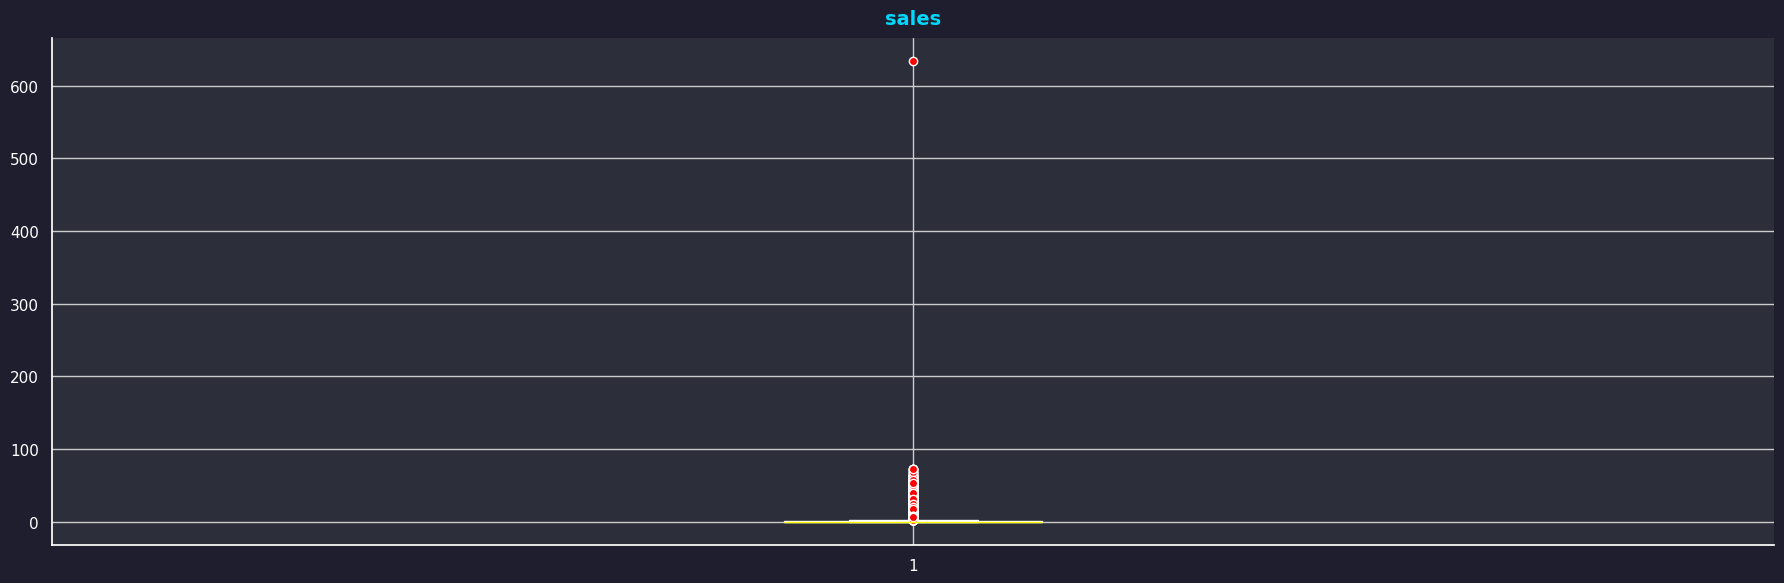

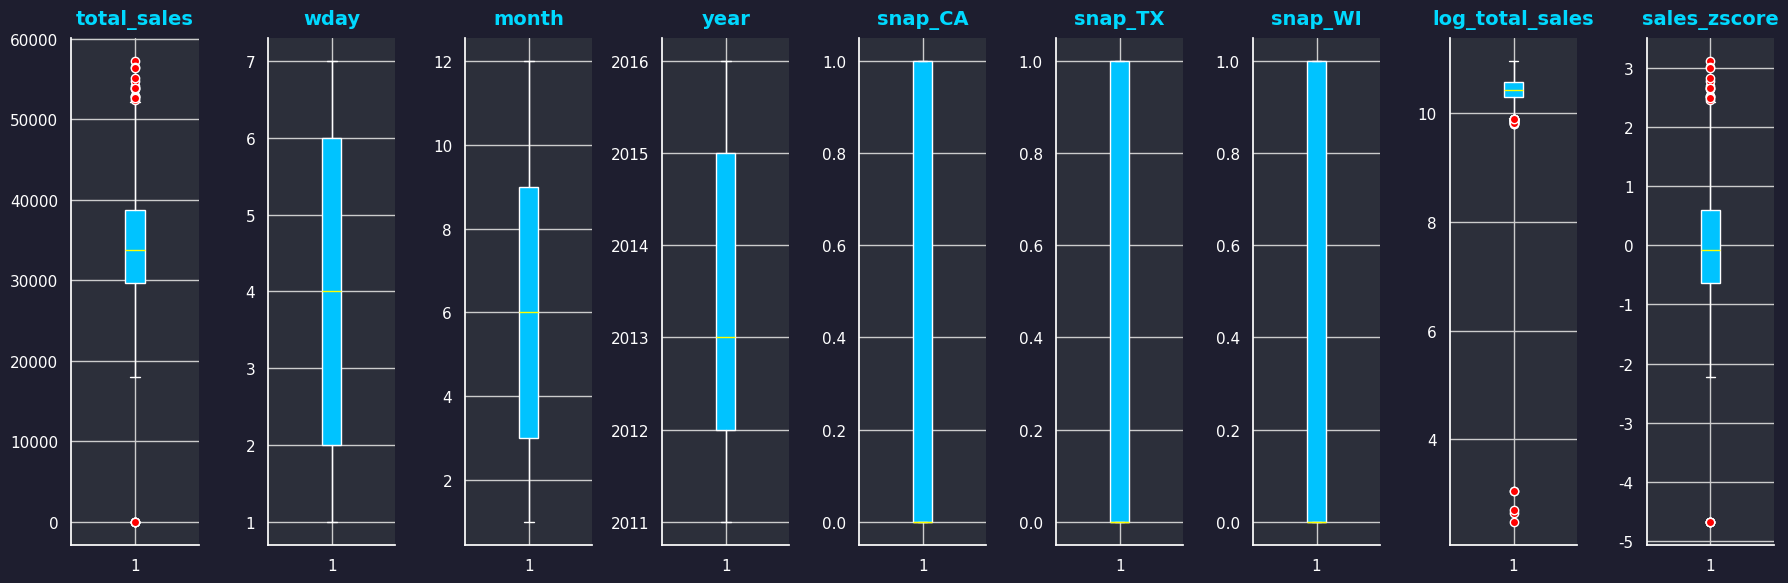

In [322]:

Data1 = [item_eda, eda_daily]

for df_idx, df in enumerate(Data1, start=1):
    numeric_columns = df.select_dtypes(include=['int', 'float']).columns
    
    if len(numeric_columns) == 0:
        print(f"دیتافریم {df_idx} ستون عددی ندارد!")
        continue
    
    fig, ax = plt.subplots(1, len(numeric_columns), figsize=(18, 6))
    fig.patch.set_facecolor("#1e1e2f")


    if len(numeric_columns) == 1:
        ax = [ax]

    for i, col in enumerate(numeric_columns):
        ax[i].patch.set_facecolor("#2c2f3a")
        ax[i].boxplot(df[col], patch_artist=True,
                      boxprops=dict(facecolor='#00c3ff', color='white'),
                      capprops=dict(color='white'),
                      whiskerprops=dict(color='white'),
                      flierprops=dict(markerfacecolor='red', marker='o', markersize=6, linestyle='none'),
                      medianprops=dict(color='yellow'))
        
        ax[i].set_title(col, color='#00d9ff', fontsize=14, pad=10, weight='bold')
        ax[i].tick_params(colors='white', labelsize=11)
        ax[i].spines['top'].set_visible(False)
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['bottom'].set_color('white')
        ax[i].spines['left'].set_color('white')

    plt.tight_layout()
    plt.show()


SALES Highly Skewed,0% NORMALITY,Skewness 29.913 Kurtosis 5560.130

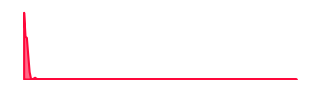

TOTAL_SALES Highly Normal,98.7% NORMALITY,Skewness 0.037 Kurtosis 0.714

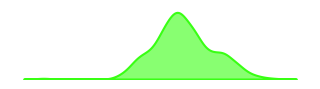

WDAY Highly Normal,99.9% NORMALITY,Skewness 0.002 Kurtosis -1.251

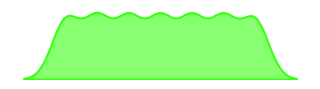

MONTH Highly Normal,97.5% NORMALITY,Skewness 0.073 Kurtosis -1.234

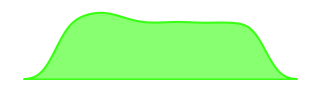

YEAR Highly Normal,97.5% NORMALITY,Skewness 0.072 Kurtosis -1.132

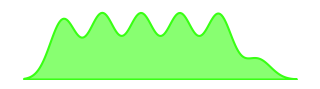

SNAP_CA Moderately Skewed,74.6% NORMALITY,Skewness 0.727 Kurtosis -1.473

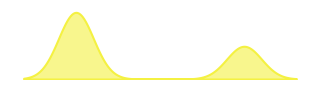

SNAP_TX Moderately Skewed,74.6% NORMALITY,Skewness 0.727 Kurtosis -1.473

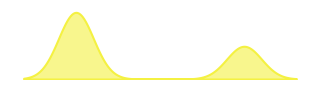

SNAP_WI Moderately Skewed,74.6% NORMALITY,Skewness 0.727 Kurtosis -1.473

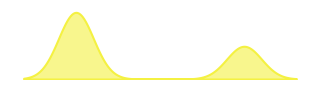

LOG_TOTAL_SALES Highly Skewed,0% NORMALITY,Skewness -13.296 Kurtosis 226.676

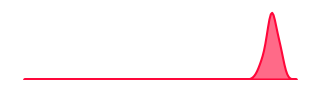

SALES_ZSCORE Highly Normal,98.7% NORMALITY,Skewness 0.037 Kurtosis 0.714

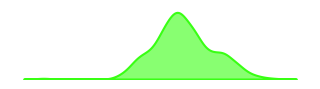

In [323]:
import io
import base64
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

Data1 = [item_eda, eda_daily]

for df_idx, df in enumerate(Data1, start=1):
    numeric_columns = df.select_dtypes(include=['int', 'float']).columns
    
    if len(numeric_columns) == 0:
        print(f"دیتافریم {df_idx} ستون عددی ندارد!")
        continue

    for col in numeric_columns:
        data = df[col].dropna()
        
        skew_val = data.skew()
        kurt_val = data.kurt()
        normality_score = max(0, round(100 - (abs(skew_val) * 35), 1))
        
        if abs(skew_val) < 0.5:
            status = "Highly Normal"
            color_status = "#39FF14"
        elif abs(skew_val) < 1:
            status = "Moderately Skewed"
            color_status = "#F4F142" 
        else:
            status = "Highly Skewed"
            color_status = "#FF073A"
        
        # رسم KDE
        fig, ax = plt.subplots(figsize=(3, 0.7))
        fig.patch.set_alpha(0)
        ax.set_facecolor("none")
        sns.kdeplot(data, fill=True, color=color_status, alpha=0.6, linewidth=1.5, ax=ax)
        ax.axis('off')
        plt.tight_layout(pad=0)
        
        buf = io.BytesIO()
        plt.savefig(buf, format='png', transparent=True, bbox_inches='tight')
        buf.seek(0)
        img_base64 = base64.b64encode(buf.read()).decode('utf-8')
        plt.close(fig)
        
        # خروجی HTML بهینه شده برای Markdown
        display(HTML(f"""
        <div style="background-color: #000; border: 1px solid #333; padding: 15px; margin: 20px auto; 
                    border-radius: 12px; font-family: sans-serif; max-width: 600px; color: white;">
            
            <div style="width: 100%; height: 4px; background: #222; border-radius: 2px; margin-bottom: 15px;">
                <div style="width: {normality_score}%; height: 100%; background: {color_status}; box-shadow: 0 0 10px {color_status}; transition: width 1s;"></div>
            </div>
            
            <table style="width: 100%; border-collapse: collapse; border: none; background: transparent;">
                <tr style="border: none; background: transparent;">
                    <td style="width: 40%; border: none; padding: 0; vertical-align: top;">
                        <div style="font-size: 1.2rem; font-weight: bold; color: #fff; margin: 0;">{col.upper()}</div>
                        <div style="color: {color_status}; font-size: 10px; font-weight: bold; text-transform: uppercase;">{status}</div>
                        <img src="data:image/png;base64,{img_base64}" style="width: 120px; margin-top: 8px; filter: drop-shadow(0 0 2px {color_status});">
                    </td>
                    
                    <td style="width: 25%; border: none; text-align: center; vertical-align: middle;">
                        <div style="color: {color_status}; font-size: 1.6rem; font-weight: 900; line-height: 1;">{normality_score}%</div>
                        <div style="color: #666; font-size: 8px; margin-top: 5px;">NORMALITY</div>
                    </td>
                    
                    <td style="width: 35%; border: none; vertical-align: middle;">
                        <div style="border-left: 2px solid #333; padding-left: 12px; margin-bottom: 8px;">
                            <div style="color: #888; font-size: 9px; text-transform: uppercase;">Skewness</div>
                            <div style="color: #fff; font-size: 13px; font-weight: bold;">{skew_val:.3f}</div>
                        </div>
                        <div style="border-left: 2px solid #333; padding-left: 12px;">
                            <div style="color: #888; font-size: 9px; text-transform: uppercase;">Kurtosis</div>
                            <div style="color: #fff; font-size: 13px; font-weight: bold;">{kurt_val:.3f}</div>
                        </div>
                    </td>
                </tr>
            </table>
        </div>
        """))


In [324]:
item_eda["LOG_SALES"] = np.log1p(item_eda["sales"]) 




<div id="Feature" style="    
    width: 90%; 
    max-width: 400px; 
    margin: 20px auto;
    padding: 18px 10px;
    background: linear-gradient(145deg, #0f0f0f, #151515);
    border-radius: 12px;
    border: 1px solid #c20000;
    box-shadow: 0 0 20px rgba(194, 0, 0, 0.2), inset 0 0 5px rgba(194, 0, 0, 0.1);   
    color: #c20000;
    text-align: center;
    font-family: 'Segoe UI', system-ui, -apple-system, sans-serif;
    font-size: clamp(18px, 5vw, 24px); /* فونت هوشمند که با سایز صفحه تغییر میکند */
    font-weight: 800;
    text-transform: uppercase;
    letter-spacing: 3px;
    text-shadow: 0 0 10px rgba(194, 0, 0, 0.5);   
    position: relative;
    overflow: hidden;
">
    <div style="position: absolute; top: 0; left: 50%; transform: translateX(-50%); width: 40%; height: 2px; background: #c20000; box-shadow: 0 0 10px #c20000;"></div>   
  heatmap
</div>

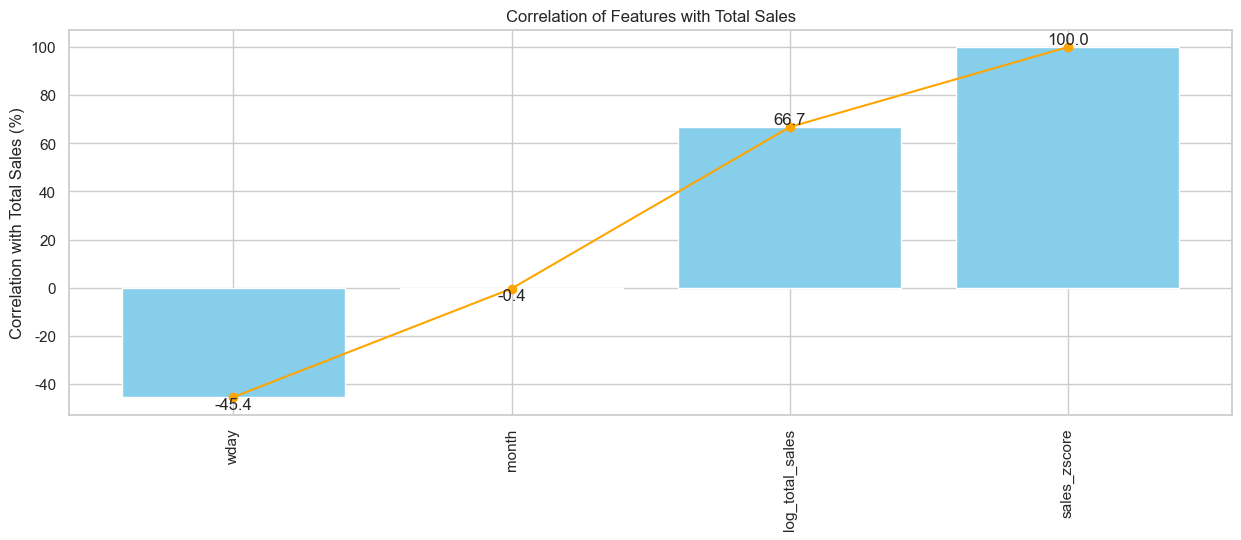

In [325]:

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

# ----------------------
# 1️⃣ EDA Daily: correlation plot
# ----------------------
numeric_cols_daily = ["total_sales", "log_total_sales", "sales_zscore", "wday", "month"]


correlations_1 = eda_daily[numeric_cols_daily].corr()["total_sales"].drop("total_sales").sort_values()
correlations_1_arr = correlations_1.values * 100  # درصد

fig, ax = plt.subplots(figsize=(15,5))
bars = ax.bar(correlations_1.index, correlations_1_arr, color="skyblue")
ax.plot(correlations_1.index, correlations_1_arr, color="orange", marker="o")
ax.bar_label(bars, fmt="%.1f")
plt.xticks(rotation=90)
plt.ylabel("Correlation with Total Sales (%)")
plt.title("Correlation of Features with Total Sales")
plt.show()



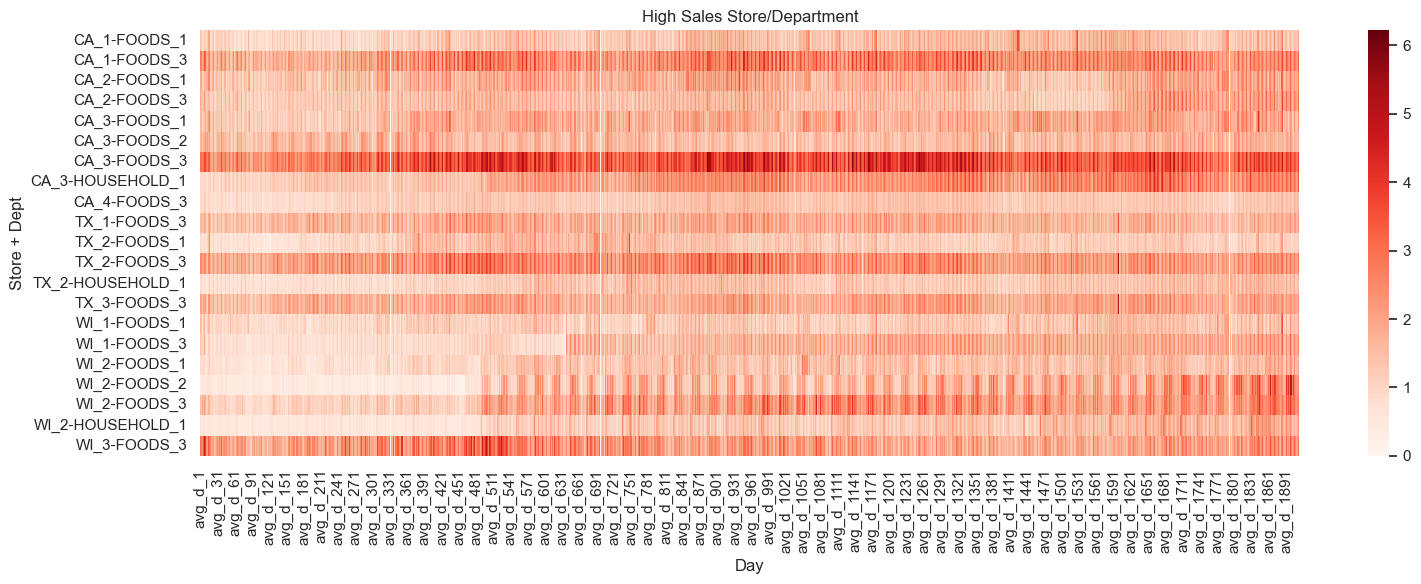

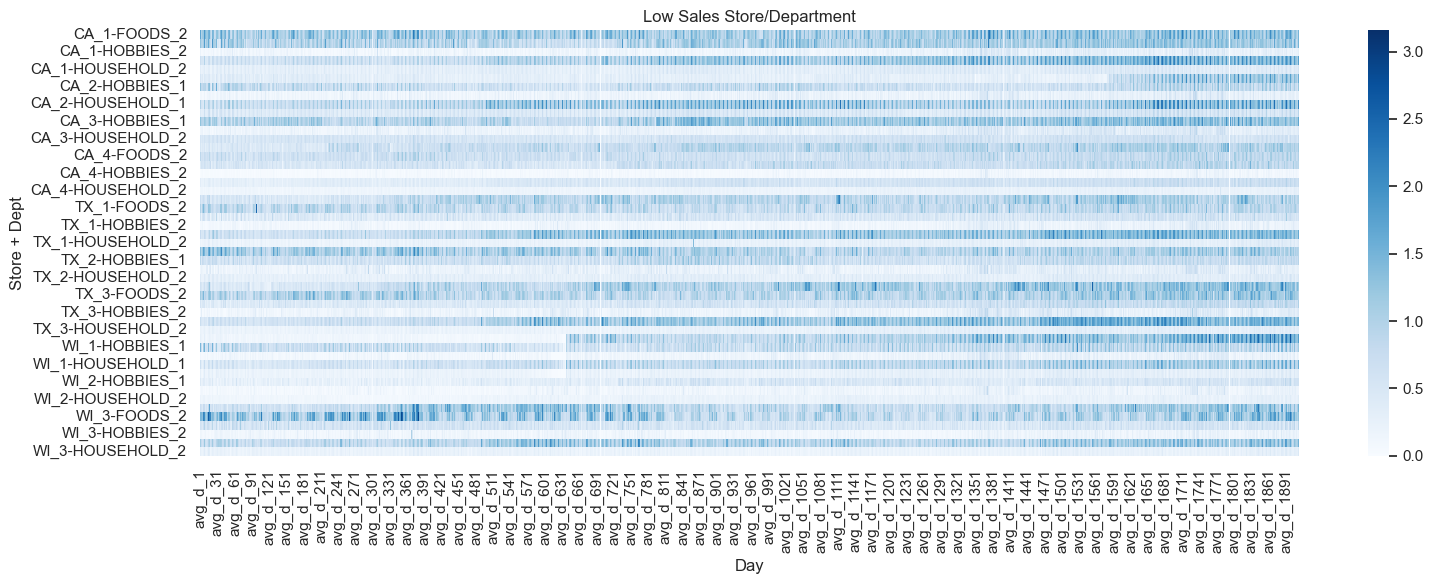

In [326]:

sample_store_dept = store_dept_eda.copy()

day_cols_store = [c for c in sample_store_dept.columns if c.startswith("avg_d_")]

sales_matrix = sample_store_dept.set_index(
    ["store_id", "dept_id"]
)[day_cols_store]

# -------------------------------
# 2) محاسبه میانگین فروش هر store+dept
# -------------------------------
store_mean_sales = sales_matrix.mean(axis=1)

# -------------------------------
# 3) تعیین threshold
# -------------------------------
threshold = store_mean_sales.quantile(0.70)

# -------------------------------
# 4) تفکیک کم‌فروش و پرفروش (در سطح index)
# -------------------------------
high_sales_matrix = sales_matrix.loc[
    store_mean_sales > threshold
]

low_sales_matrix = sales_matrix.loc[
    store_mean_sales <= threshold
]

# -------------------------------
# 5) Heatmap پرفروش‌ها
# -------------------------------
plt.figure(figsize=(16, 6))
sns.heatmap(
    high_sales_matrix,
    cmap="Reds",
    cbar=True
)
plt.title("High Sales Store/Department")
plt.xlabel("Day")
plt.ylabel("Store + Dept")
plt.tight_layout()
plt.show()

# -------------------------------
# 6) Heatmap کم‌فروش‌ها
# -------------------------------
plt.figure(figsize=(16, 6))
sns.heatmap(
    low_sales_matrix,
    cmap="Blues",
    cbar=True
)
plt.title("Low Sales Store/Department")
plt.xlabel("Day")
plt.ylabel("Store + Dept")
plt.tight_layout()
plt.show()


In [327]:

low_sales_mean = low_sales_matrix.mean(axis=1)
lowest_index = low_sales_mean.idxmin()
lowest_value = low_sales_mean.min()

print(f"🔹 کم‌فروش‌ترین Store+Dept: {lowest_index} با میانگین فروش {lowest_value:.2f}")

# -------------------------------
high_sales_mean = high_sales_matrix.mean(axis=1)
highest_index = high_sales_mean.idxmax()
highest_value = high_sales_mean.max()

print(f"🔹 پرفروش‌ترین Store+Dept: {highest_index} با میانگین فروش {highest_value:.2f}")


🔹 کم‌فروش‌ترین Store+Dept: ('CA_4', 'HOBBIES_2') با میانگین فروش 0.08
🔹 پرفروش‌ترین Store+Dept: ('CA_3', 'FOODS_3') با میانگین فروش 3.54


In [328]:

# -------------------------------
sample_store_dept = store_dept_eda.copy()

filtered = sample_store_dept[
    (sample_store_dept["store_id"] == "CA_3") &
    (sample_store_dept["dept_id"] == "FOODS_3")
]

# -------------------------------

# -------------------------------
day_cols = [c for c in filtered.columns if c.startswith("avg_d_")]

sales_series = filtered[day_cols].iloc[0]

# -------------------------------

# -------------------------------
df_trend = pd.DataFrame({
    "day": range(1, len(sales_series) + 1),
    "avg_sales": sales_series.values
})

# -------------------------------

# -------------------------------
threshold = df_trend["avg_sales"].quantile(0.70)

df_trend["sales_class"] = np.where(
    df_trend["avg_sales"] > threshold,
    "High Sales",
    "Low Sales"
)




threshold = df_trend["avg_sales"].quantile(0.70)

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'colspan':2}, None],
           [{'type':'xy'}, {'type':'domain'}]], 
    subplot_titles=(
        "Daily Sales Trend | CA_3 - FOODS_3",
        "Sales Distribution: Low vs High",
        "Summary"
    ),
    vertical_spacing=0.14,
    horizontal_spacing=0.08
)

# ─── Trend scatter ───
colors = np.where(df_trend["sales_class"] == "High Sales", "#e74c3c", "#3498db")

fig.add_trace(
    go.Scatter(
        x=df_trend["day"],
        y=df_trend["avg_sales"],
        mode="markers",
        marker=dict(color=colors, size=7, line=dict(width=0.6, color="rgba(0,0,0,0.15)")),
        name="Daily Sales",
        hovertemplate="Day %{x}<br>Avg: %{y:.2f}<extra></extra>"
    ),
    row=1, col=1
)

fig.add_hline(
    y=threshold, line_dash="dash", line_color="#2c3e50",
    annotation_text=f"70th %ile = {threshold:.2f}",
    annotation_position="top right", row=1, col=1
)


for cls, colr in [("Low Sales", "#74b9ff"), ("High Sales", "#ff7675")]:
    subset = df_trend[df_trend["sales_class"] == cls]
    fig.add_trace(
        go.Box(
            y=subset["avg_sales"],
            name=cls,
            marker_color=colr,         
            boxmean=True,
            notched=False,
            showlegend=True
        ),
        row=2, col=1
    )

summary = df_trend.groupby("sales_class")["avg_sales"].agg(
    Count="count", Mean="mean", Median="median", Min="min", Max="max"
).round(2).reset_index()

fig.add_trace(
    go.Table(
        header=dict(values=summary.columns, fill_color="#2c3e50", font_color="white", align="center"),
        cells=dict(
            values=[summary[col] for col in summary.columns],
            fill_color=[["#f8f9fa", "#e9ecef"] * (len(summary) // 2 + 1)],
            align="center",
            font_size=11.5
        )
    ),
    row=2, col=2
)


fig.update_layout(
    title="<b>CA_3 – FOODS_3  Sales Dashboard</b>",
    title_x=0.5, title_font_size=26,
    height=780, width=1150,
    showlegend=True,
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="center", x=0.5),
    paper_bgcolor="#f9fafb",
    plot_bgcolor="white",
    font=dict(family="Segoe UI", size=12.5, color="#2d3436"),
    hovermode="closest",
    margin=dict(l=50, r=40, t=110, b=70)
)

fig.update_xaxes(showgrid=True, gridcolor="#dfe6e9", zeroline=False, row=1, col=1)
fig.update_yaxes(showgrid=True, gridcolor="#dfe6e9", row=1, col=1)
fig.update_xaxes(showgrid=False, zeroline=False, row=2, col=1)
fig.update_yaxes(showgrid=True, gridcolor="#dfe6e9", row=2, col=1)

fig.show(config={'displayModeBar': False})

بررسی کم فروش ترین و پر فروش ترین 

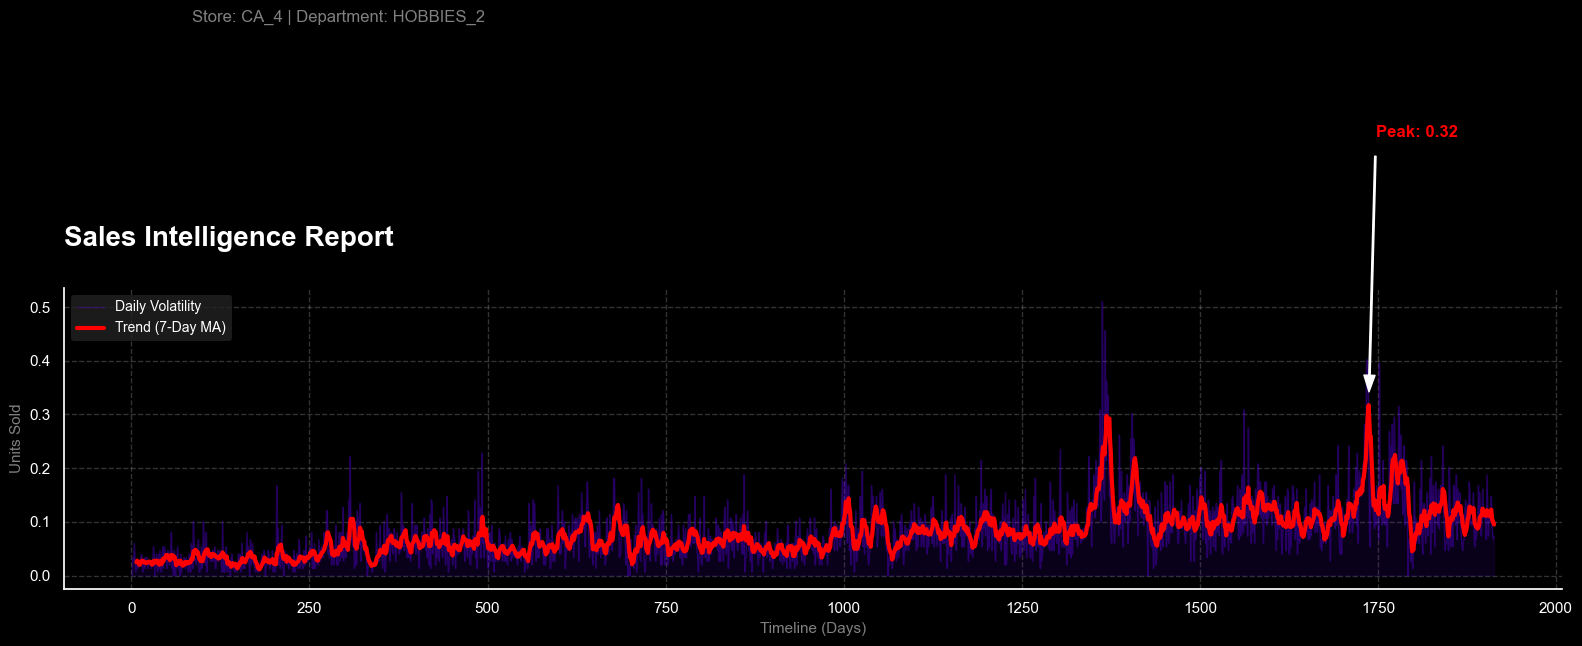

In [329]:

target_data = sales_matrix.xs(
    ('CA_4', 'HOBBIES_2'), 
    level=("store_id", "dept_id")
)

ts = target_data.T
ts.index = ts.index.str.replace("avg_d_", "").astype(int)
ts = ts.sort_index()

rolling_mean = ts.mean(axis=1).rolling(window=7).mean()
actual_values = ts.mean(axis=1)

plt.style.use('dark_background')
colors = ["#6200FF", "red"]

fig, ax = plt.subplots(figsize=(16, 7))

ax.fill_between(ts.index, actual_values, color=colors[0], alpha=0.1)
ax.plot(ts.index, actual_values, color=colors[0], alpha=0.3, linewidth=1, label='Daily Volatility')
line, = ax.plot(ts.index, rolling_mean, color=colors[1], linewidth=3, label='Trend (7-Day MA)')

max_val = rolling_mean.max()
max_idx = rolling_mean.idxmax()
ax.annotate(f'Peak: {max_val:.2f}', 
            xy=(max_idx, max_val), 
            xytext=(max_idx+10, max_val+0.5),
            arrowprops=dict(facecolor='white', shrink=0.05, width=1, headwidth=8),
            fontsize=12, color=colors[1], fontweight='bold')

ax.grid(True, linestyle='--', alpha=0.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("Sales Intelligence Report", loc='left', fontsize=20, color='white', fontweight='bold', pad=30)
plt.suptitle("Store: CA_4 | Department: HOBBIES_2", x=0.125, y=0.92, ha='left', fontsize=12, color='gray')

plt.xlabel("Timeline (Days)", fontsize=11, color='gray')
plt.ylabel("Units Sold", fontsize=11, color='gray')

plt.legend(facecolor='#222222', edgecolor='none', fontsize=10)

plt.tight_layout()
plt.show()


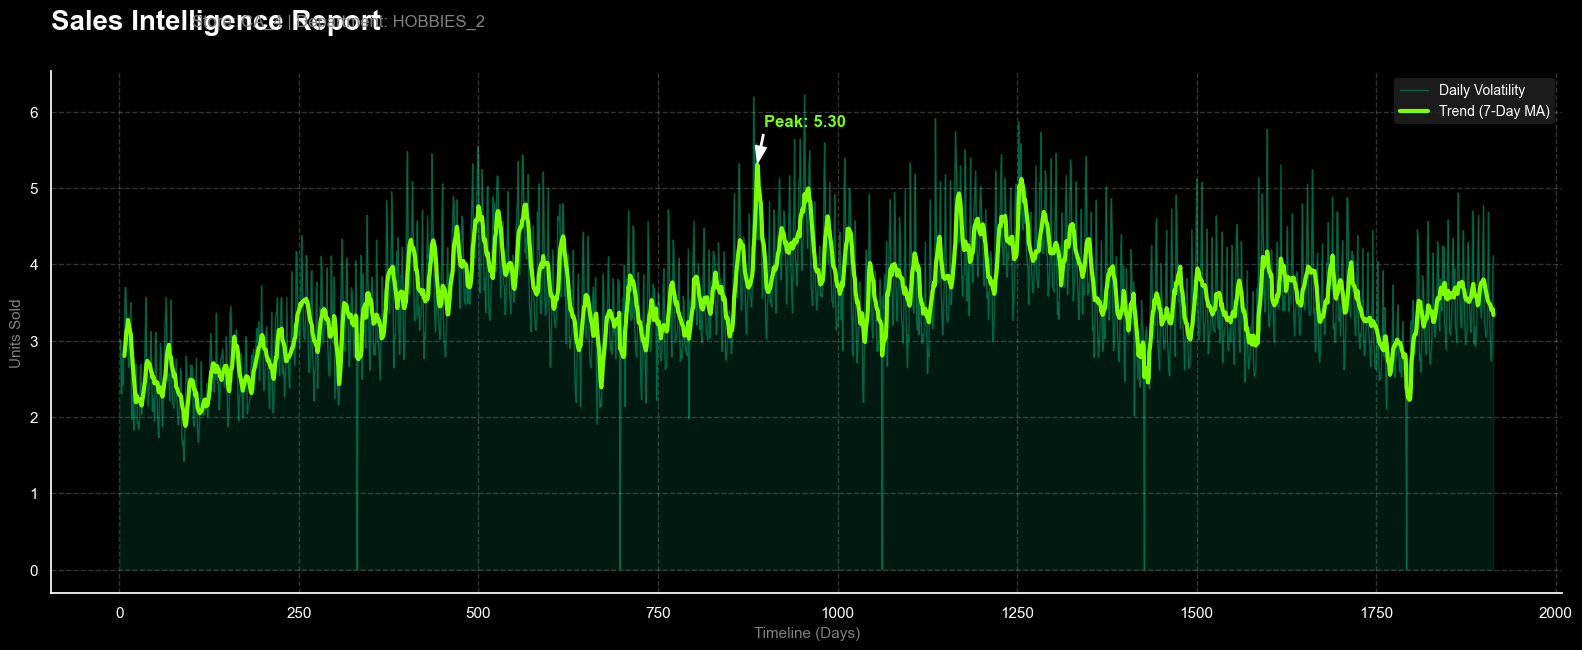

In [330]:
ca3_foods3=sales_matrix.xs(
    ('CA_3', 'FOODS_3'),
    level=("store_id", "dept_id")
)

ts = ca3_foods3.T
ts.index = ts.index.str.replace("avg_d_", "").astype(int)
ts = ts.sort_index()

rolling_mean = ts.mean(axis=1).rolling(window=7).mean()
actual_values = ts.mean(axis=1)

plt.style.use('dark_background')
colors = ["#00FFAA", "#7BFF00"]

fig, ax = plt.subplots(figsize=(16, 7))

ax.fill_between(ts.index, actual_values, color=colors[0], alpha=0.1)
ax.plot(ts.index, actual_values, color=colors[0], alpha=0.3, linewidth=1, label='Daily Volatility')
line, = ax.plot(ts.index, rolling_mean, color=colors[1], linewidth=3, label='Trend (7-Day MA)')

max_val = rolling_mean.max()
max_idx = rolling_mean.idxmax()
ax.annotate(f'Peak: {max_val:.2f}', 
            xy=(max_idx, max_val), 
            xytext=(max_idx+10, max_val+0.5),
            arrowprops=dict(facecolor='white', shrink=0.05, width=1, headwidth=8),
            fontsize=12, color=colors[1], fontweight='bold')

ax.grid(True, linestyle='--', alpha=0.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("Sales Intelligence Report", loc='left', fontsize=20, color='white', fontweight='bold', pad=30)
plt.suptitle("Store: CA_4 | Department: HOBBIES_2", x=0.125, y=0.92, ha='left', fontsize=12, color='gray')

plt.xlabel("Timeline (Days)", fontsize=11, color='gray')
plt.ylabel("Units Sold", fontsize=11, color='gray')

plt.legend(facecolor='#222222', edgecolor='none', fontsize=10)

plt.tight_layout()
plt.show()



# الگو یابی

<title>تحلیل دیتاست M5 - ۴ چالش تحلیلی</title>
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css">
<style>
*{margin:0;padding:0;box-sizing:border-box;font-family:'Segoe UI',Tahoma,Geneva,Verdana,sans-serif;}
:root{--primary:#2c3e50;--secondary:#3498db;--accent:#e74c3c;--light:#ecf0f1;--dark:#2c3e50;--success:#27ae60;--warning:#f39c12;--gray:#7f8c8d;}
body{background:linear-gradient(135deg,#f5f7fa 0%,#c3cfe2 100%);color:#333;line-height:1.6;}
.container{max-width:1400px;margin:0 auto;padding:20px;color:black;}
header{background:linear-gradient(to right,var(--primary),var(--secondary));color:white;padding:30px 0;border-radius:15px;margin-bottom:30px;box-shadow:0 10px 30px rgba(0,0,0,0.2);text-align:center;}
.logo{font-size:2.5rem;margin-bottom:10px;display:flex;justify-content:center;align-items:center;gap:15px;}
.logo i{color:var(--warning);}
header h1{font-size:2.2rem;margin-bottom:10px;}
.subtitle{font-size:1.2rem;opacity:0.9;max-width:800px;margin:0 auto;}
.dashboard-stats{display:grid;grid-template-columns:repeat(auto-fit,minmax(250px,1fr));gap:20px;margin-bottom:40px;}
.stat-card{background:white;border-radius:12px;padding:25px;box-shadow:0 5px 15px rgba(0,0,0,0.08);transition:transform 0.3s ease;border-top:5px solid var(--secondary);}
.stat-card:hover{transform:translateY(-5px);}
.stat-card h3{color:var(--primary);margin-bottom:15px;font-size:1.1rem;display:flex;align-items:center;gap:10px;}
.stat-card i{color:var(--secondary);}
.stat-value{font-size:2.2rem;font-weight:bold;color:var(--dark);margin-bottom:10px;}
.stat-desc{color:var(--gray);font-size:0.95rem;}
.challenges-container{background:white;border-radius:15px;padding:30px;box-shadow:0 10px 30px rgba(0,0,0,0.1);margin-bottom:40px;}
.section-title{color:var(--primary);border-right:5px solid var(--accent);padding-right:15px;margin-bottom:25px;font-size:1.8rem;display:flex;align-items:center;gap:10px;}
.challenges-grid{display:grid;grid-template-columns:repeat(auto-fill,minmax(320px,1fr));gap:25px;}
.challenge-card{background:#f8f9fa;border-radius:10px;padding:22px;border:1px solid #e9ecef;transition:all 0.3s ease;position:relative;overflow:hidden;}
.challenge-card:hover{border-color:var(--secondary);box-shadow:0 8px 20px rgba(52,152,219,0.15);}
.challenge-card:nth-child(1),.challenge-card:nth-child(2),.challenge-card:nth-child(3){border-top:4px solid var(--success);}
.challenge-card:nth-child(4),.challenge-card:nth-child(5){border-top:4px solid var(--warning);}
.challenge-number{position:absolute;top:10px;left:10px;background:var(--primary);color:white;width:32px;height:32px;border-radius:50%;display:flex;align-items:center;justify-content:center;font-weight:bold;font-size:0.9rem;}
.challenge-title{color:var(--primary);margin-bottom:12px;padding-right:30px;font-size:1.2rem;}
.challenge-category{display:inline-block;background:#e3f2fd;color:var(--secondary);padding:5px 12px;border-radius:20px;font-size:0.8rem;margin-bottom:15px;}
.challenge-desc{color:#555;font-size:0.95rem;line-height:1.7;}
.key-metrics{display:flex;flex-wrap:wrap;gap:10px;margin-top:15px;}
.metric{background:white;padding:8px 15px;border-radius:8px;font-size:0.85rem;border:1px solid #dee2e6;}
.priority-high{background-color:#fff5f5;border-right:4px solid var(--accent);}
.priority-medium{background-color:#fff9e6;border-right:4px solid var(--warning);}
.priority-low{background-color:#f0f9ff;border-right:4px solid var(--secondary);}
.methodology{background:white;border-radius:15px;padding:30px;box-shadow:0 10px 30px rgba(0,0,0,0.1);margin-bottom:40px;}
.methodology-grid{display:grid;grid-template-columns:repeat(auto-fit,minmax(250px,1fr));gap:25px;margin-top:20px;}
.method-item{background:#f8f9fa;padding:20px;border-radius:10px;text-align:center;}
.method-icon{font-size:2.5rem;color:var(--secondary);margin-bottom:15px;}
.cta-section{text-align:center;padding:40px;background:linear-gradient(to right,var(--primary),var(--secondary));color:white;border-radius:15px;margin-bottom:30px;}
.cta-title{font-size:2rem;margin-bottom:20px;}
.btn{display:inline-block;background:var(--warning);color:white;padding:15px 35px;border-radius:50px;text-decoration:none;font-weight:bold;font-size:1.1rem;margin:10px;transition:all 0.3s ease;border:none;cursor:pointer;}
.btn:hover{background:#e67e22;transform:translateY(-3px);box-shadow:0 10px 20px rgba(0,0,0,0.2);}
.btn-outline{background:transparent;border:2px solid white;}
.btn-outline:hover{background:white;color:var(--primary);}
footer{text-align:center;padding:30px 0;color:var(--gray);border-top:1px solid #ddd;margin-top:40px;}
@media (max-width:768px){.challenges-grid{grid-template-columns:1fr;}.dashboard-stats{grid-template-columns:1fr;}.logo{font-size:1.8rem;}header h1{font-size:1.6rem;}}

</style>
<div class="container">
<header>
<h1> چالش‌های تحلیلی برای کشف الگوها </h1>
</header>
<div class="dashboard-stats">
<!-- Dashboard Stats Removed for Simplicity -->
</div>

<div class="challenges-container">
<h2 class="section-title"><i class="fas fa-bullseye"></i>چالش‌های تحلیلی</h2>
<div class="challenges-grid">
<div class="challenge-card priority-high"><div class="challenge-number">۱</div><span class="challenge-category">روندهای زمانی</span><h3 class="challenge-title">الگوهای فصلی فروش</h3><p class="challenge-desc">تحلیل تغییرات فروش در ماه‌های مختلف سال برای کالاهای مختلف و شناسایی فصول پرفروش</p><div class="key-metrics"><span class="metric">فروش فصلی</span><span class="metric">مقایسه ماه‌ها</span><span class="metric">پیک فروش</span></div></div>

<div class="challenge-card priority-high"><div class="challenge-number">۲</div><span class="challenge-category">روندهای زمانی</span><h3 class="challenge-title">روند سالانه فروش</h3><p class="challenge-desc">مقایسه فروش بین سال‌های ۲۰۱۱ تا ۲۰۱۶ و تحلیل رشد یا کاهش سالانه</p><div class="key-metrics"><span class="metric">رشد سالانه</span><span class="metric">مقایسه سال‌ها</span><span class="metric">نرخ رشد</span></div></div>

<div class="challenge-card priority-medium"><div class="challenge-number">۳</div><span class="challenge-category">تحلیل فروشگاه‌ها</span><h3 class="challenge-title">تأثیر SNAP و ایالت‌ها</h3><p class="challenge-desc">تحلیل تأثیر SNAP days (روزهای یارانه غذایی) بر فروش در هر ایالت</p><div class="key-metrics"><span class="metric">تأثیر SNAP</span><span class="metric">مقایسه ایالتی</span><span class="metric">افزایش فروش</span></div></div>

<div class="challenge-card priority-low"><div class="challenge-number">۴</div><span class="challenge-category">رویدادهای خاص</span><h3 class="challenge-title">روزهای خاص و فروش‌های غیرعادی</h3><p class="challenge-desc">شناسایی peak sales days و تحلیل دلایل احتمالی (تعطیلات، رویدادها، ...)</p><div class="key-metrics"><span class="metric">Peak Days</span><span class="metric">Black Friday</span><span class="metric">تعطیلات</span></div></div>
</div>
</div>
</div>
</div>


می ریم و دونه دونه این چالش ها رو انجام می دیم 




<div style="
    width: 90%; 
    max-width: 400px; 
    margin: 20px auto;
    padding: 18px 10px;
    background: linear-gradient(145deg, #0f0f0f, #151515);
    border-radius: 12px;
    border: 1px solid #c200b8;
    box-shadow: 0 0 20px rgba(191, 0, 194, 0.2), inset 0 0 5pxrgba(194, 0, 139, 0.1));   
    color: #ffffff;
    text-align: center;
    font-family: 'Segoe UI', system-ui, -apple-system, sans-serif;
    font-size: clamp(18px, 5vw, 24px); /* فونت هوشمند که با سایز صفحه تغییر میکند */
    font-weight: 800;
    text-transform: uppercase;
    letter-spacing: 3px;
    text-shadow: 0 0 10px rgba(194, 0, 133, 0.5);   
    position: relative;
    overflow: hidden;
">
    <div style="position: absolute; top: 0; left: 50%; transform: translateX(-50%); width: 40%; height: 2px; background: #7400c2; box-shadow: 0 0 10px #9e00c2;"></div>   
 الگوهای فصلی فروش  
</div>





In [331]:

from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')


plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

calendar_sales = eda_daily
avg_data = store_dept_eda
sales_data = eda_daily


In [531]:

avg_cols = [col for col in store_dept_eda.columns if col.startswith('avg_d_')]

avg_long = store_dept_eda.melt(
    id_vars=['store_id', 'dept_id'],
    value_vars=avg_cols,
    var_name='d',
    value_name='avg_sales'
)


avg_long['d'] = avg_long['d'].str.replace('avg_', '')


merged_data = pd.merge(eda_daily, avg_long, on='d', how='left')

merged_data['is_weekend'] = merged_data['weekday'].isin(['Saturday', 'Sunday'])
merged_data['sales_category'] = merged_data['dept_id'].str.split('_').str[0]

print(f"   - تعداد دسته‌بندی‌ها: {merged_data['sales_category'].nunique()}")
merged_data.head()

   - تعداد دسته‌بندی‌ها: 3


,d,total_sales,wday,weekday,month,year,event_name_1,event_type_1,snap_CA,snap_TX,snap_WI,log_total_sales,sales_zscore,store_id,dept_id,avg_sales,is_weekend,sales_category
0,d_1,32631,1,Saturday,1,2011,NaN,NaN,0,0,0,10.393049,-0.232859,CA_1,FOODS_1,1.375000,True,FOODS
1,d_1,32631,1,Saturday,1,2011,NaN,NaN,0,0,0,10.393049,-0.232859,CA_1,FOODS_2,1.693467,True,FOODS
2,d_1,32631,1,Saturday,1,2011,NaN,NaN,0,0,0,10.393049,-0.232859,CA_1,FOODS_3,2.755772,True,FOODS
3,d_1,32631,1,Saturday,1,2011,NaN,NaN,0,0,0,10.393049,-0.232859,CA_1,HOBBIES_1,1.269231,True,HOBBIES
4,d_1,32631,1,Saturday,1,2011,NaN,NaN,0,0,0,10.393049,-0.232859,CA_1,HOBBIES_2,0.187919,True,HOBBIES


In [534]:

sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'
base_color = sns.color_palette("viridis", 7)

daily_stats = merged_data.groupby('weekday').agg({
    'avg_sales': ['mean', 'std', 'min', 'max', 'count'],
    'total_sales': 'mean',
    'log_total_sales': 'mean'
}).round(4)

daily_stats.columns = ['avg_mean', 'avg_std', 'avg_min', 'avg_max', 'count', 
                       'total_mean', 'log_mean']

day_order = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 
             'Thursday', 'Friday']

existing_days = [day for day in day_order if day in daily_stats.index]
daily_stats = daily_stats.reindex(existing_days)

# ===== Beautiful HTML Output =====

table_html = daily_stats[['avg_mean', 'avg_std', 'total_mean', 'count']].to_html(
    classes="styled-table",
    border=0
)

overall_avg = daily_stats['avg_mean'].mean()
daily_stats['relative_performance'] = (daily_stats['avg_mean'] / overall_avg * 100).round(1)

performance_rows = ""
for day in daily_stats.index:
    rel_perf = daily_stats.loc[day, 'relative_performance']
    performance = "بالاتر از میانگین 🟢" if rel_perf > 100 else "پایین‌تر از میانگین 🔴"
    color = "#2ecc71" if rel_perf > 100 else "#e74c3c"
    performance_rows += f"""
    <div class="perf-row">
        <span class="day">{day}</span>
        <span class="value" style="color:{color};">{rel_perf}%</span>
        <span class="status">{performance}</span>
    </div>
    """

html_output = f"""
<style>
.box {{
color:black;
    background: #ffffff;
    border-radius: 12px;
    padding: 20px;
    margin: 15px 0;
    box-shadow: 0 4px 10px rgba(0,0,0,0.08);
    font-family: DejaVu Sans;
}}
.box-title {{
    font-size: 20px;
    font-weight: bold;
    margin-bottom: 12px;
}}
.styled-table {{
    border-collapse: collapse;
    width: 100%;
    text-align: center;
}}
.styled-table th {{
    background: #4b7bec;
    color: white;
    padding: 10px;
}}
.styled-table td {{
    padding: 8px;
    border-bottom: 1px solid #ddd;
}}
.styled-table tr:hover {{
    background-color: #f1f2f6;
}}
.perf-row {{
    display: flex;
    justify-content: space-between;
    padding: 8px 0;
    border-bottom: 1px dashed #ccc;
    font-size: 15px;
}}
.perf-row:last-child {{
    border-bottom: none;
}}
.day {{ font-weight: bold; }}
.value {{ font-weight: bold; }}
.status {{ opacity: 0.9; }}
</style>

<div class="box">
    <div class="box-title">📈 آمار توصیفی فروش بر اساس روز هفته</div>
    {table_html}
</div>

<div class="box">
    <div class="box-title">🎯 عملکرد نسبی روزهای هفته</div>
    {performance_rows}
</div>
"""

display(HTML(html_output))


,avg_mean,avg_std,total_mean,count
weekday,,,,
Saturday,1.1401,0.8883,41546.8942,19180
Sunday,1.1131,0.9055,41130.0219,19180
Monday,0.8976,0.7275,32852.9670,19110
Tuesday,0.8393,0.6713,30368.7802,19110
Wednesday,0.8334,0.6593,30010.0220,19110
Thursday,0.8385,0.6650,30205.0073,19110
Friday,0.9474,0.7359,34225.9853,19110


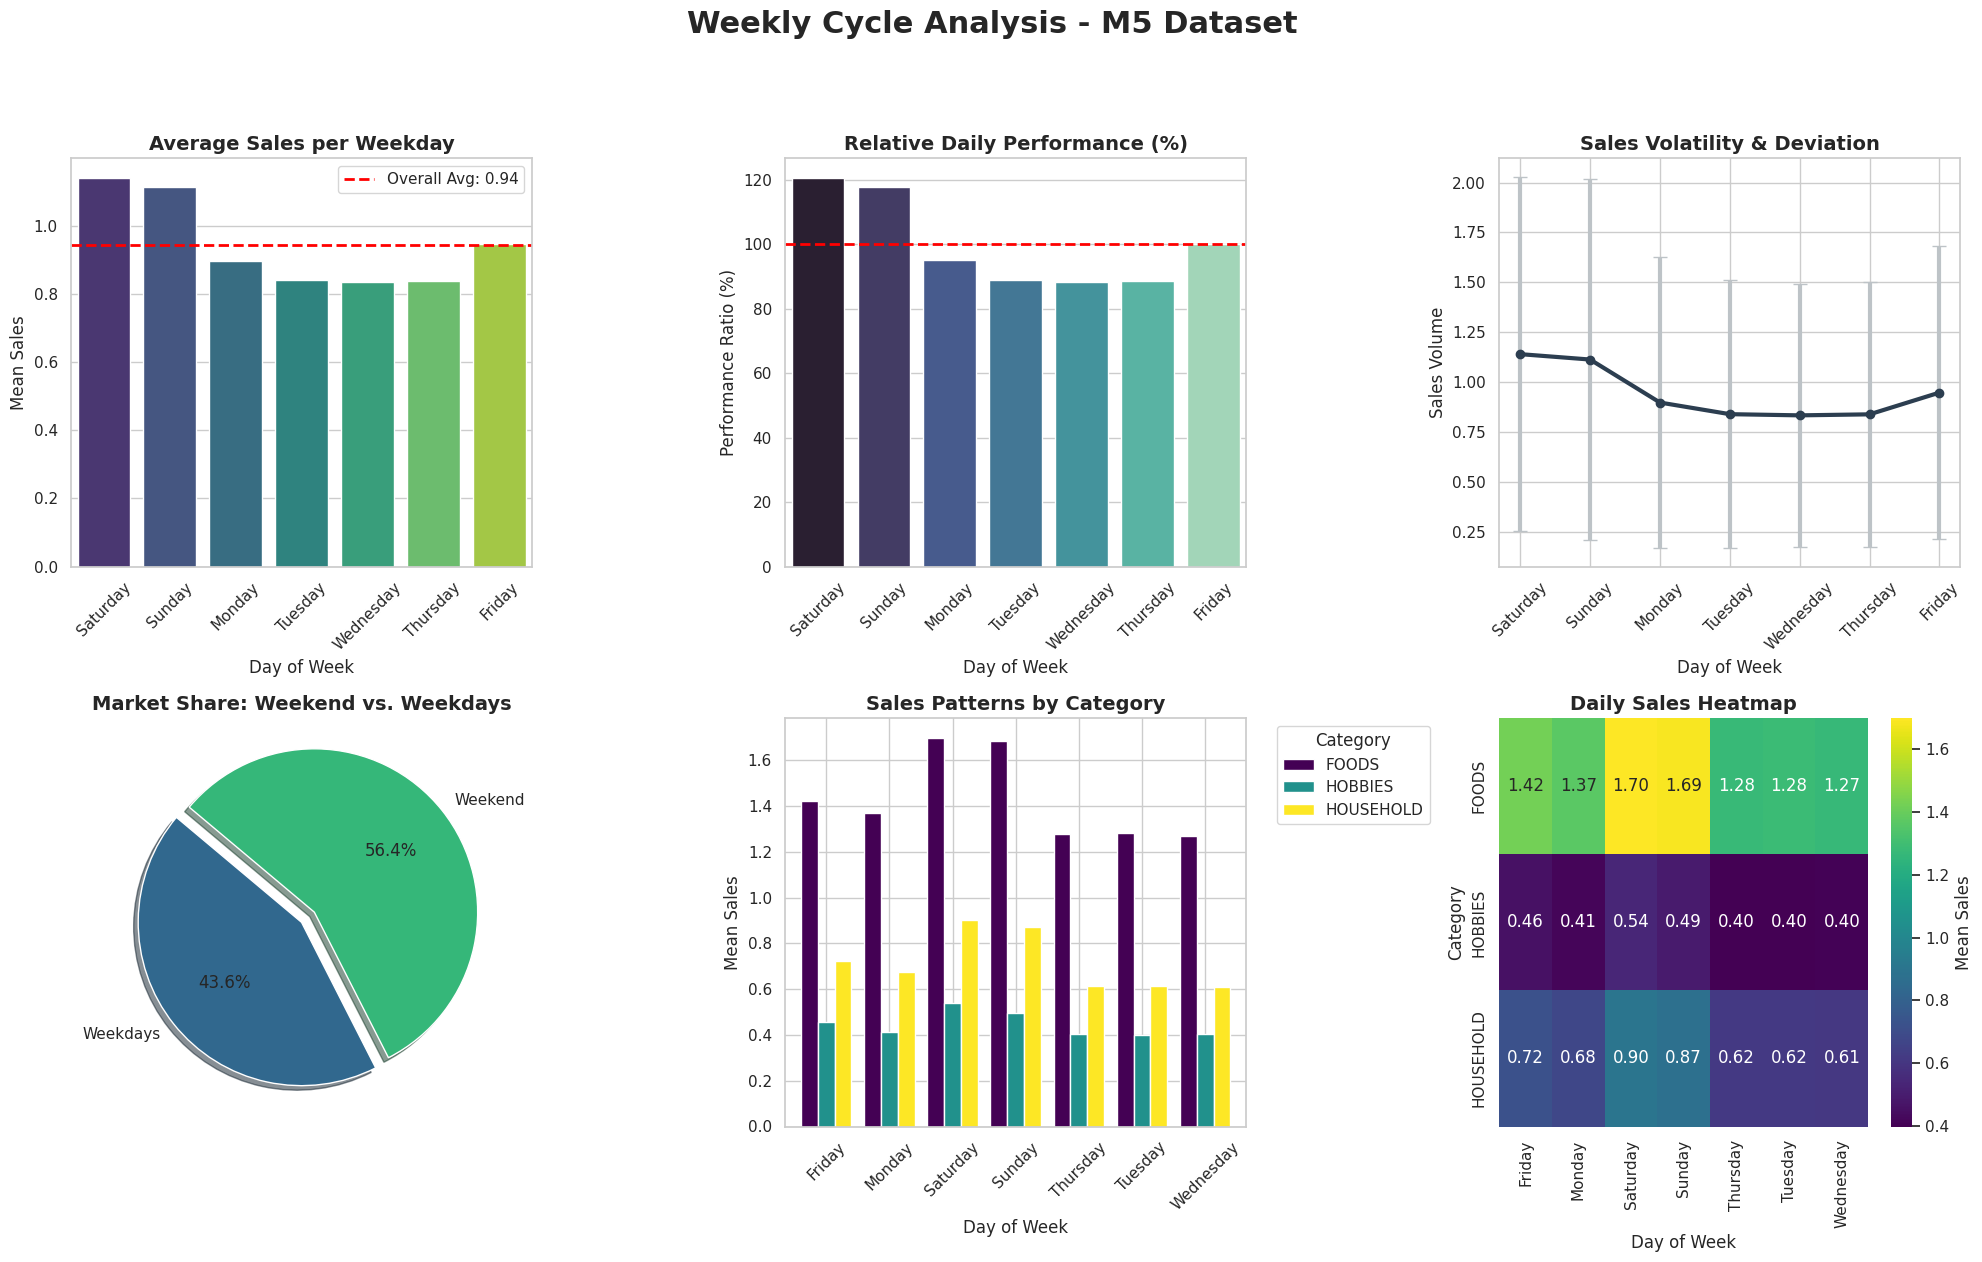

In [ ]:
# ---- Create Visualizations ----
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Weekly Cycle Analysis - M5 Dataset', fontsize=22, fontweight='bold', y=1.05)

# Plot 1: Average Sales by Weekday
ax1 = axes[0, 0]
sns.barplot(x=daily_stats.index, y=daily_stats['avg_mean'], ax=ax1, palette="viridis")
ax1.axhline(y=overall_avg, color='red', linestyle='--', linewidth=2, label=f'Overall Avg: {overall_avg:.2f}')
ax1.set_title('Average Sales per Weekday', fontsize=14, fontweight='bold')
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Mean Sales')
ax1.tick_params(axis='x', rotation=45)
ax1.legend()

# Plot 2: Relative Performance
ax2 = axes[0, 1]
sns.barplot(x=daily_stats.index, y=daily_stats['relative_performance'], ax=ax2, palette="mako")
ax2.axhline(y=100, color='red', linestyle='--', linewidth=2)
ax2.set_title('Relative Daily Performance (%)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Performance Ratio (%)')
ax2.tick_params(axis='x', rotation=45)

# Plot 3: Sales Volatility (Error Bars)
ax3 = axes[0, 2]
ax3.errorbar(daily_stats.index, daily_stats['avg_mean'], 
             yerr=daily_stats['avg_std'], 
             fmt='o-', color='#2c3e50', ecolor='#bdc3c7', capsize=5, linewidth=3)
ax3.set_title('Sales Volatility & Deviation', fontsize=14, fontweight='bold')
ax3.set_xlabel('Day of Week')
ax3.set_ylabel('Sales Volume')
ax3.tick_params(axis='x', rotation=45)

# Plot 4: Weekend Impact (Pie Chart)
ax4 = axes[1, 0]
weekend_data = merged_data.groupby('is_weekend')['avg_sales'].mean()
colors_pie = sns.color_palette("viridis", 2)
ax4.pie(weekend_data.values, labels=['Weekdays', 'Weekend'], colors=colors_pie,
        autopct='%1.1f%%', startangle=140, explode=(0, 0.1), shadow=True)
ax4.set_title('Market Share: Weekend vs. Weekdays', fontsize=14, fontweight='bold')

# Plot 5: Sales Pattern by Category
ax5 = axes[1, 1]
category_day_data = merged_data.groupby(['sales_category', 'weekday'])['avg_sales'].mean().unstack()
category_day_data.T.plot(kind='bar', ax=ax5, colormap='viridis', width=0.8)
ax5.set_title('Sales Patterns by Category', fontsize=14, fontweight='bold')
ax5.set_xlabel('Day of Week')
ax5.set_ylabel('Mean Sales')
ax5.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax5.tick_params(axis='x', rotation=45)

# Plot 6: Heatmap
ax6 = axes[1, 2]
heatmap_data = merged_data.pivot_table(values='avg_sales', index='sales_category', columns='weekday', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='viridis', ax=ax6, cbar_kws={'label': 'Mean Sales'})
ax6.set_title('Daily Sales Heatmap', fontsize=14, fontweight='bold')
ax6.set_xlabel('Day of Week')
ax6.set_ylabel('Category')

plt.tight_layout()
plt.savefig('weekly_pattern_analysis_styled.png', dpi=300, bbox_inches='tight')
plt.show()

<div style="direction: rtl; font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif; 
            max-width: 550px; margin: 20px auto; background: #ffffff; border-radius: 16px; 
            box-shadow: 0 10px 30px rgba(0,0,0,0.08); border: 1px solid #eaeaea; overflow: hidden;">

  <div style="background: #2c3e50; padding: 20px; text-align: center;">
    <h2 style="margin: 0; color: #ffffff; font-size: 1.25rem; font-weight: 600;">گزارش تحلیلی فروش هفتگی</h2>
  </div>

  <div style="padding: 24px;">  
    <div style="display: flex; align-items: flex-start; margin-bottom: 16px; background: #f0fdf4; padding: 16px; border-radius: 12px; border: 1px solid #dcfce7;">
      <span style="font-size: 24px; margin-left: 12px;">🚀</span>
      <div>
        <strong style="display: block; color: #166534; margin-bottom: 4px;">آخر هفته (شنبه و یکشنبه)</strong>
        <p style="margin: 0; color: #374151; font-size: 0.9rem; line-height: 1.6;">بیشترین میانگین فروش و کمترین نوسان. نقطه قوت اصلی کسب‌وکار.</p>
      </div>
    </div>
    <div style="display: flex; align-items: flex-start; margin-bottom: 16px; background: #fffbeb; padding: 16px; border-radius: 12px; border:1px solid #fef3c7;">
      <span style="font-size: 24px; margin-left: 12px;">📉</span>
      <div>
        <strong style="display: block; color: #92400e; margin-bottom: 4px;">وسط هفته (دوشنبه تا پنجشنبه)</strong>
        <p style="margin: 0; color: #374151; font-size: 0.9rem; line-height: 1.6;">فروش پایین‌تر از میانگین با ثبات نسبی؛ نیازمند استراتژی‌های تشویقی.</p>
      </div>
    </div>
    <div style="display: flex; align-items: flex-start; margin-bottom: 24px; background: #f9fafb; padding: 16px; border-radius: 12px; border: 1px solid #f3f4f6;">
      <span style="font-size: 24px; margin-left: 12px;">⚖️</span>
      <div>
        <strong style="display: block; color: #4b5563; margin-bottom: 4px;">روز جمعه</strong>
        <p style="margin: 0; color: #374151; font-size: 0.9rem; line-height: 1.6;">عملکرد متعادل و نزدیک به میانگین با نوسان بسیار کم.</p>
      </div>
    </div>
    <div style="border-top: 2px dashed #eee; pt: 20px; text-align: center; padding-top: 20px;">
      <div style="display: inline-block; background: #eff6ff; padding: 8px 16px; border-radius: 20px; color: #1e40af; font-weight: bold; font-size: 0.85rem; margin-bottom: 10px;">
        تمرکز فروش
      </div>
      <div style="font-size: 2rem; font-weight: 800; color: #1e3a8a;">
        ۵۶.۴٪ <span style="font-size: 1rem; font-weight: normal; color: #6b7280;">از کل فروش</span>
      </div>
      <p style="color: #6b7280; font-size: 0.8rem; margin-top: 8px;">تنها در دو روز آخر هفته محقق می‌شود.</p>
    </div>

  </div>
</div>





<div style="
    width: 90%; 
    max-width: 400px; 
    margin: 20px auto;
    padding: 18px 10px;
    background: linear-gradient(145deg, #0f0f0f, #151515);
    border-radius: 12px;
    border: 1px solid #c200b8;
    box-shadow: 0 0 20px rgba(191, 0, 194, 0.2), inset 0 0 5pxrgba(194, 0, 139, 0.1));   
    color: #ffffff;
    text-align: center;
    font-family: 'Segoe UI', system-ui, -apple-system, sans-serif;
    font-size: clamp(18px, 5vw, 24px); /* فونت هوشمند که با سایز صفحه تغییر میکند */
    font-weight: 800;
    text-transform: uppercase;
    letter-spacing: 3px;
    text-shadow: 0 0 10px rgba(194, 0, 133, 0.5);   
    position: relative;
    overflow: hidden;
">
    <div style="position: absolute; top: 0; left: 50%; transform: translateX(-50%); width: 40%; height: 2px; background: #7400c2; box-shadow: 0 0 10px #9e00c2;"></div>   
 روند سالانه فروش    
</div>





In [545]:
from IPython.display import display, HTML
import pandas as pd

merged_data = pd.merge(eda_daily, avg_long, on='d', how='inner')
merged_data['category'] = merged_data['dept_id'].str.split('_').str[0]

def get_season_fa(month):
    if month in [12, 1, 2]: return 'زمستان'
    if month in [3, 4, 5]: return 'بهار'
    if month in [6, 7, 8]: return 'تابستان'
    return 'پاییز'

merged_data['season'] = merged_data['month'].apply(get_season_fa)

monthly_sales = merged_data.groupby('month')[['total_sales', 'avg_sales']].mean().round(2)
monthly_sales.columns = ['فروش_کلی_میانگین', 'فروش_متوسط_دسته']

seasonal_sales = merged_data.groupby('season')['total_sales'].agg(['mean', 'sum', 'count']).round(2)
seasonal_sales.columns = ['میانگین', 'مجموع', 'تعداد']

best_season = seasonal_sales['میانگین'].idxmax()
worst_season = seasonal_sales['میانگین'].idxmin()

monthly_rows = "".join([f"<tr><td>{m}</td><td>{row['فروش_کلی_میانگین']}</td><td>{row['فروش_متوسط_دسته']}</td></tr>" for m, row in monthly_sales.iterrows()])
seasonal_rows = "".join([f"<tr><td>{s}</td><td>{row['میانگین']}</td><td>{row['مجموع']}</td><td>{row['تعداد']}</td></tr>" for s, row in seasonal_sales.iterrows()])

html_code = f"""
<style>
    @import url('https://fonts.cdnfonts.com/css/vazirmatn');
    .main-wrapper {{
        direction: rtl; font-family: 'Vazirmatn', sans-serif;
        background: linear-gradient(145deg, #1e293b, #0f172a);
        padding: 30px; border-radius: 25px; color: #e2e8f0; max-width: 900px; margin: 20px auto;
        box-shadow: 0 20px 50px rgba(0,0,0,0.3);
    }}
    .header {{ text-align: center; border-bottom: 2px solid #334155; margin-bottom: 25px; padding-bottom: 15px; }}
    .stats-container {{ display: flex; gap: 20px; margin-bottom: 30px; }}
    .status-card {{
        flex: 1; padding: 20px; border-radius: 20px; text-align: center;
        background: rgba(255, 255, 255, 0.05); border: 1px solid rgba(255,255,255,0.1);
    }}
    .status-card.best {{ border-top: 4px solid #10b981; }}
    .status-card.worst {{ border-top: 4px solid #ef4444; }}
    .val-box {{ font-size: 24px; font-weight: bold; margin-top: 10px; display: block; }}
    .table-section {{ display: grid; grid-template-columns: 1fr 1fr; gap: 20px; }}
    table {{ width: 100%; border-collapse: collapse; background: rgba(0,0,0,0.2); border-radius: 12px; overflow: hidden; }}
    th {{ background: #334155; color: #38bdf8; padding: 12px; font-size: 14px; text-align: center; }}
    td {{ padding: 10px; text-align: center; border-bottom: 1px solid #334155; font-size: 13px; }}
    tr:hover td {{ background: rgba(255,255,255,0.05); }}
    .title-label {{ display: block; margin-bottom: 10px; font-weight: bold; color: #94a3b8; font-size: 15px; }}
</style>

<div class="main-wrapper">
    <div class="header">
        <h2 style="margin:0;">📉 تحلیل پیشرفته چرخه فروش</h2>
    </div>

    <div class="stats-container">
        <div class="status-card best">
            <span>🔝 بهترین فصل سال</span>
            <span class="val-box" style="color:#10b981">{best_season}</span>
        </div>
        <div class="status-card worst">
            <span>🔻 ضعیف‌ترین فصل سال</span>
            <span class="val-box" style="color:#ef4444">{worst_season}</span>
        </div>
    </div>

    <div class="table-section">
        <div>
            <span class="title-label">📅 آمار ماهانه (میانگین):</span>
            <table>
                <thead><tr><th>ماه</th><th>فروش کل</th><th>فروش دسته</th></tr></thead>
                <tbody>{monthly_rows}</tbody>
            </table>
        </div>
        <div>
            <span class="title-label">🌦 آمار فصلی:</span>
            <table>
                <thead><tr><th>فصل</th><th>میانگین</th><th>مجموع</th><th>تعداد</th></tr></thead>
                <tbody>{seasonal_rows}</tbody>
            </table>
        </div>
    </div>
</div>
"""

display(HTML(html_code))

ماه,فروش کل,فروش دسته
1,33832.35,0.94
2,34644.64,0.96
3,34339.84,0.95
4,34258.68,0.94
5,32503.85,0.89
6,35001.41,0.95
7,35122.42,0.95
8,35946.65,0.98
9,35479.26,0.97
10,34713.48,0.96


In [ ]:


category_season = merged_data.groupby(['category', 'season'])['avg_sales'].mean().round(3)

# ANOVA logic
season_groups = [merged_data[merged_data['season'] == s]['avg_sales'].dropna()
                 for s in merged_data['season'].unique()]
f_stat, p_value = stats.f_oneway(*season_groups) if len(season_groups) >= 2 else (0, 1)

# Seasonal Stats & CV
seasonal_stats = merged_data.groupby('season')['avg_sales'].agg(['mean', 'std']).round(4)
seasonal_stats['cv'] = (seasonal_stats['std'] / seasonal_stats['mean'] * 100).round(2)

cat_html = ""
for cat in merged_data['category'].unique():
    data = merged_data[merged_data['category'] == cat]
    peak = data.groupby('month')['avg_sales'].mean().idxmax()
    low = data.groupby('month')['avg_sales'].mean().idxmin()
    cat_html += f"""
    <div class="cat-card">
        <div class="cat-header">{cat}</div>
        <div class="peak-low">
            <span class="p-badge">Peak: Month {peak}</span>
            <span class="l-badge">Low: Month {low}</span>
        </div>
    </div>
    """


html_output = f"""
<style>
    @import url('https://fonts.cdnfonts.com/css/vazirmatn');
    .stats-wrapper {{
        background: #0f172a; font-family: 'Vazirmatn', sans-serif; direction: rtl;
        padding: 30px; border-radius: 20px; color: #f1f5f9; max-width: 950px; margin: auto;
    }}
    .anova-box {{
        background: {("#064e3b" if p_value < 0.05 else "#450a0a")};
        border: 1px solid {("#10b981" if p_value < 0.05 else "#ef4444")};
        padding: 20px; border-radius: 15px; text-align: center; margin-bottom: 25px;
    }}
    .anova-title {{ font-size: 14px; opacity: 0.9; margin-bottom: 5px; }}
    .anova-res {{ font-size: 24px; font-weight: 800; }}
    
    .grid-layout {{ display: grid; grid-template-columns: 1fr 1fr; gap: 20px; }}
    
    .cat-grid {{ display: grid; grid-template-columns: 1fr 1fr; gap: 10px; }}
    .cat-card {{ background: #1e293b; padding: 15px; border-radius: 12px; border-right: 4px solid #38bdf8; }}
    .cat-header {{ font-weight: bold; font-size: 16px; margin-bottom: 8px; color: #38bdf8; }}
    .peak-low {{ display: flex; gap: 5px; font-size: 11px; }}
    .p-badge {{ background: rgba(16, 185, 129, 0.2); color: #10b981; padding: 2px 8px; border-radius: 4px; }}
    .l-badge {{ background: rgba(239, 68, 68, 0.2); color: #ef4444; padding: 2px 8px; border-radius: 4px; }}
    
    table {{ width: 100%; border-collapse: collapse; background: #1e293b; border-radius: 12px; overflow: hidden; }}
    th {{ background: #334155; padding: 12px; color: #38bdf8; font-size: 13px; text-align: center; }}
    td {{ padding: 10px; text-align: center; border-bottom: 1px solid #0f172a; font-size: 13px; font-weight: bold; }}
    .cv-text {{ color: #fbbf24; }}
</style>

<div class="stats-wrapper">
    <div style="text-align:center; margin-bottom:20px;">
        <h2 style="margin:0;">📊 تحلیل عمیق و آزمون تفاوت فصلی</h2>
    </div>

    <div class="anova-box">
        <div class="anova-title">نتیجه آزمون آماری ANOVA (F={f_stat:.2f} | P={p_value:.4f})</div>
        <div class="anova-res">
            { "✅ تفاوت فصول معنادار است" if p_value < 0.05 else "⚠ تفاوت معنادار یافت نشد" }
        </div>
    </div>

    <div class="grid-layout">
        <div>
            <div style="margin-bottom:10px; font-weight:bold; color:#94a3b8;">🏔 وضعیت پیک و کف فروش (Category Level)</div>
            <div class="cat-grid">{cat_html}</div>
        </div>
        
        <div>
            <div style="margin-bottom:10px; font-weight:bold; color:#94a3b8;">📉 نوسان و پایداری فصلی (CV%)</div>
            <table>
                <thead>
                    <tr><th>فصل</th><th>میانگین</th><th>نوسان (CV)</th></tr>
                </thead>
                <tbody>
                    {"".join([f"<tr><td>{idx}</td><td>{row['mean']}</td><td class='cv-text'>{row['cv']}%</td></tr>" for idx, row in seasonal_stats.iterrows()])}
                </tbody>
            </table>
        </div>
    </div>
</div>
"""

display(HTML(html_output))

فصل,میانگین,نوسان (CV)
بهار,0.9279,81.19%
تابستان,0.9599,83.2%
زمستان,0.9444,79.75%
پاییز,0.9474,80.41%


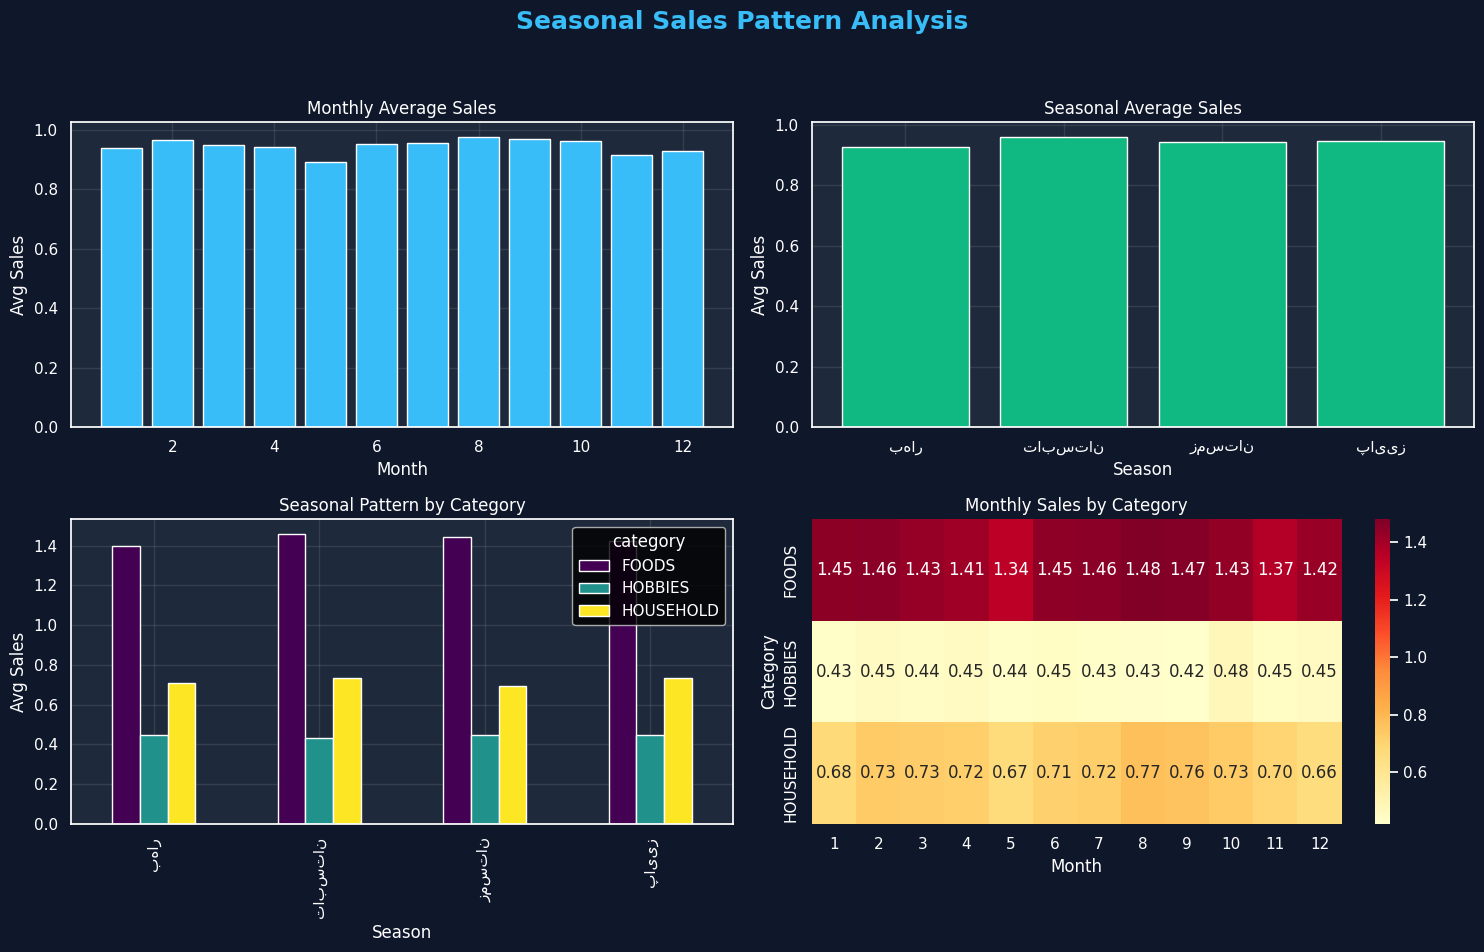

In [546]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

# --- Visualization Logic (English Labels) ---
plt.style.use('dark_background')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.patch.set_facecolor('#0f172a')
for ax in axes.ravel(): ax.set_facecolor('#1e293b')

fig.suptitle('Seasonal Sales Pattern Analysis', fontsize=18, fontweight='bold', color='#38bdf8')

# 1. Monthly Trend
monthly_avg = merged_data.groupby('month')['avg_sales'].mean()
axes[0, 0].bar(monthly_avg.index, monthly_avg.values, color='#38bdf8')
axes[0, 0].set_title('Monthly Average Sales')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Avg Sales')
axes[0, 0].grid(alpha=0.1)

# 2. Seasonal Comparison
seasonal_avg = merged_data.groupby('season')['avg_sales'].mean()
axes[0, 1].bar(seasonal_avg.index, seasonal_avg.values, color='#10b981')
axes[0, 1].set_title('Seasonal Average Sales')
axes[0, 1].set_xlabel('Season')
axes[0, 1].set_ylabel('Avg Sales')
axes[0, 1].grid(alpha=0.1)

# 3. Category Seasonal Pattern
pivot_cat_season = merged_data.pivot_table(values='avg_sales', index='season', columns='category', aggfunc='mean')
pivot_cat_season.plot(kind='bar', ax=axes[1, 0], colormap='viridis')
axes[1, 0].set_title('Seasonal Pattern by Category')
axes[1, 0].set_xlabel('Season')
axes[1, 0].set_ylabel('Avg Sales')
axes[1, 0].grid(alpha=0.1)

# 4. Monthly Heatmap
heatmap_data = merged_data.pivot_table(values='avg_sales', index='category', columns='month', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlOrRd', ax=axes[1, 1])
axes[1, 1].set_title('Monthly Sales by Category')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Category')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Advanced HTML/CSS Display for Insights ---
insight_cards = ""
for cat in merged_data['category'].unique():
    data = merged_data[merged_data['category'] == cat]
    peak = data.groupby('season')['avg_sales'].mean().idxmax()
    low = data.groupby('season')['avg_sales'].mean().idxmin()
    vol = (data.groupby('season')['avg_sales'].mean().max() - data.groupby('season')['avg_sales'].mean().min()) / data.groupby('season')['avg_sales'].mean().mean() * 100
    
    insight_cards += f"""
    <div class="insight-card">
        <div class="cat-name">{cat}</div>
        <div class="detail">Peak: <span style="color:#10b981">{peak}</span></div>
        <div class="detail">Low: <span style="color:#ef4444">{low}</span></div>
        <div class="vol-bar"><div class="vol-fill" style="width:{min(vol, 100)}%"></div></div>
        <small>Volatility: {vol:.1f}%</small>
    </div>
    """

html_dashboard = f"""
<style>
    @import url('https://fonts.cdnfonts.com/css/vazirmatn');
    .report-wrapper {{
        background: #0f172a; font-family: 'Vazirmatn', sans-serif; direction: rtl;
        padding: 25px; border-radius: 20px; color: #f8fafc; max-width: 950px; margin: 20px auto;
    }}
    .grid-insights {{ display: grid; grid-template-columns: repeat(auto-fit, minmax(200px, 1fr)); gap: 15px; margin-top: 20px; }}
    .insight-card {{
        background: rgba(255,255,255,0.03); border: 1px solid rgba(255,255,255,0.1);
        padding: 15px; border-radius: 15px; transition: 0.3s;
    }}
    .insight-card:hover {{ background: rgba(255,255,255,0.07); transform: translateY(-3px); }}
    .cat-name {{ font-weight: 800; color: #38bdf8; font-size: 18px; margin-bottom: 10px; border-bottom: 1px solid #334155; }}
    .detail {{ font-size: 13px; margin: 5px 0; }}
    .vol-bar {{ background: #334155; height: 6px; border-radius: 3px; margin-top: 10px; overflow: hidden; }}
    .vol-fill {{ background: #38bdf8; height: 100%; }}
    .actions {{
        background: linear-gradient(90deg, #1e293b, #334155); padding: 20px; 
        border-radius: 15px; margin-top: 30px; border-right: 5px solid #38bdf8;
    }}
    .actions li {{ margin-bottom: 8px; font-size: 14px; list-style-type: '🚀 '; }}
</style>

<div class="report-wrapper">
    <h2 style="text-align:center; color:#38bdf8;">💡 تحلیل هوشمند و پیشنهادات استراتژیک</h2>
    
    <div class="grid-insights">{insight_cards}</div>
    
    <div class="actions">
        <h3 style="margin-top:0;">🛠 پیشنهادات عملیاتی (Action Plan):</h3>
        <ul style="padding-right: 20px;">
            <li><b>مدیریت موجودی:</b> افزایش ذخیره انبار در فصول اوج (Peak Seasons) برای جلوگیری از توقف فروش.</li>
            <li><b>تبلیغات هدفمند:</b> تمرکز بودجه مارکتینگ بر دسته‌های با نوسان بالا در آستانه فصل پرفروش.</li>
            <li><b>استراتژی قیمت‌گذاری:</b> اعمال تخفیف‌های دوره‌ای در فصول رکود (Low Seasons) برای تحریک تقاضا.</li>
        </ul>
    </div>
</div>
"""

display(HTML(html_dashboard))








<div style="
    width: 90%; 
    max-width: 400px; 
    margin: 20px auto;
    padding: 18px 10px;
    background: linear-gradient(145deg, #0f0f0f, #151515);
    border-radius: 12px;
    border: 1px solid #c200b8;
    box-shadow: 0 0 20px rgba(191, 0, 194, 0.2), inset 0 0 5pxrgba(194, 0, 139, 0.1));   
    color: #ffffff;
    text-align: center;
    font-family: 'Segoe UI', system-ui, -apple-system, sans-serif;
    font-size: clamp(18px, 5vw, 24px); /* فونت هوشمند که با سایز صفحه تغییر میکند */
    font-weight: 800;
    text-transform: uppercase;
    letter-spacing: 3px;
    text-shadow: 0 0 10px rgba(194, 0, 133, 0.5);   
    position: relative;
    overflow: hidden;
">
    <div style="position: absolute; top: 0; left: 50%; transform: translateX(-50%); width: 40%; height: 2px; background: #7400c2; box-shadow: 0 0 10px #9e00c2;"></div>   
 تأثیر   ایالت‌ها   SNAP
</div>





In [552]:


# --- Core datasets ---
daily_data = eda_daily[[
    "d", "total_sales", "month", "year",
    "snap_CA", "snap_TX", "snap_WI"
]].copy()

store_dept = (
    store_dept_eda[["store_id", "dept_id"]]
    .drop_duplicates()
    .reset_index(drop=True)
)

item_data = item_eda[[
    "item_id", "store_id", "dept_id", "d", "sales"
]].copy()

# --- State-wise SNAP normalization ---
state_frames = []
for state in ["CA", "TX", "WI"]:
    tmp = daily_data[["d", "total_sales", "month", "year", f"snap_{state}"]].copy()
    tmp["state"] = state
    tmp.rename(columns={f"snap_{state}": "snap"}, inplace=True)
    state_frames.append(tmp)

state_df = pd.concat(state_frames, ignore_index=True)
state_df["snap_status"] = state_df["snap"].map({0: "Non-SNAP", 1: "SNAP"})

# --- Sanity checks ---
assert state_df.isna().sum().sum() == 0, "Missing values detected"

print("CELL 1 OK")
print("State-level rows:", state_df.shape[0])


CELL 1 OK
State-level rows: 5739


In [ ]:

snap_stats = state_df.groupby(["state", "snap_status"]).agg(
    mean_sales=("total_sales", "mean"),
    std_sales=("total_sales", "std"),
    days=("total_sales", "count")
).round(2).reset_index()

impact_rows = []
for state in snap_stats["state"].unique():
    s = snap_stats[snap_stats["state"] == state].set_index("snap_status")
    if {"SNAP", "Non-SNAP"} <= set(s.index):
        impact = (s.loc["SNAP", "mean_sales"] - s.loc["Non-SNAP", "mean_sales"]) / s.loc["Non-SNAP", "mean_sales"] * 100
        impact_rows.append({
            "state": state,
            "snap_days": s.loc["SNAP", "days"],
            "non_snap_days": s.loc["Non-SNAP", "days"],
            "snap_avg": round(s.loc["SNAP", "mean_sales"], 2),
            "non_snap_avg": round(s.loc["Non-SNAP", "mean_sales"], 2),
            "impact_pct": round(impact, 2)
        })

snap_summary = pd.DataFrame(impact_rows)


rows_html = ""
for _, row in snap_summary.iterrows():
    color = "#10b981" if row['impact_pct'] > 0 else "#ef4444"
    rows_html += f"""
    <div class="state-card">
        <div class="state-header">
            <span class="state-name">{row['state']}</span>
            <span class="impact-badge" style="background: {color}22; color: {color}">
                {"+" if row['impact_pct'] > 0 else ""}{row['impact_pct']}% Impact
            </span>
        </div>
        <div class="metrics-grid">
            <div class="m-item">
                <small>SNAP Avg</small>
                <strong>{row['snap_avg']}</strong>
            </div>
            <div class="m-item">
                <small>Non-SNAP Avg</small>
                <strong>{row['non_snap_avg']}</strong>
            </div>
        </div>
        <div class="progress-container">
            <div class="progress-bar" style="width: {min(abs(row['impact_pct']) * 2, 100)}%; background: {color}"></div>
        </div>
        <div style="display: flex; justify-content: space-between; font-size: 10px; margin-top: 5px; opacity: 0.6;">
            <span>Days: {int(row['snap_days'])} SNAP</span>
            <span>{int(row['non_snap_days'])} Normal</span>
        </div>
    </div>
    """

html_dashboard = f"""
<style>
    @import url('https://fonts.cdnfonts.com/css/vazirmatn');
    .snap-container {{
        background: #0f172a; color: #f8fafc; font-family: 'Vazirmatn', sans-serif;
        direction: rtl; padding: 25px; border-radius: 20px; max-width: 900px; margin: auto;
        border: 1px solid #1e293b; box-shadow: 0 10px 30px rgba(0,0,0,0.4);
    }}
    .snap-grid {{ display: grid; grid-template-columns: repeat(3, 1fr); gap: 15px; margin-top: 20px; }}
    .state-card {{
        background: rgba(30, 41, 59, 0.5); padding: 15px; border-radius: 16px; 
        border: 1px solid rgba(255,255,255,0.05); transition: 0.3s;
    }}
    .state-card:hover {{ transform: translateY(-5px); border-color: #38bdf8; }}
    .state-header {{ display: flex; justify-content: space-between; align-items: center; margin-bottom: 15px; }}
    .state-name {{ font-size: 20px; font-weight: 800; color: #38bdf8; }}
    .impact-badge {{ padding: 3px 10px; border-radius: 8px; font-size: 12px; font-weight: bold; }}
    .metrics-grid {{ display: grid; grid-template-columns: 1fr 1fr; gap: 10px; margin-bottom: 10px; }}
    .m-item {{ background: #1e293b; padding: 8px; border-radius: 8px; text-align: center; }}
    .m-item small {{ display: block; font-size: 10px; color: #94a3b8; }}
    .m-item strong {{ font-size: 14px; }}
    .progress-container {{ background: #334155; height: 6px; border-radius: 10px; overflow: hidden; margin-top: 10px; }}
    .progress-bar {{ height: 100%; border-radius: 10px; }}
</style>

<div class="snap-container">
    <div style="text-align: center; margin-bottom: 20px;">
        <h2 style="margin: 0; color: #38bdf8;">🛒 تحلیل تأثیر SNAP بر تقاضا (ایالتی)</h2>
        <p style="font-size: 13px; opacity: 0.7;">مقایسه میانگین فروش در روزهای دارای طرح SNAP و روزهای عادی</p>
    </div>
    
    <div class="snap-grid">
        {rows_html}
    </div>
    
    <div style="margin-top: 25px; background: rgba(56, 189, 248, 0.1); padding: 15px; border-radius: 12px; border-right: 4px solid #38bdf8;">
        <p style="margin: 0; font-size: 14px;">
            💡 <b>بینش تجاری:</b> در ایالت‌هایی که <b>Impact %</b> بالاتری دارند، زنجیره تأمین باید در روزهای واریز سهمیه SNAP با آمادگی کامل (Inventory Buffer) عمل کند.
        </p>
    </div>
</div>
"""

display(HTML(html_dashboard))

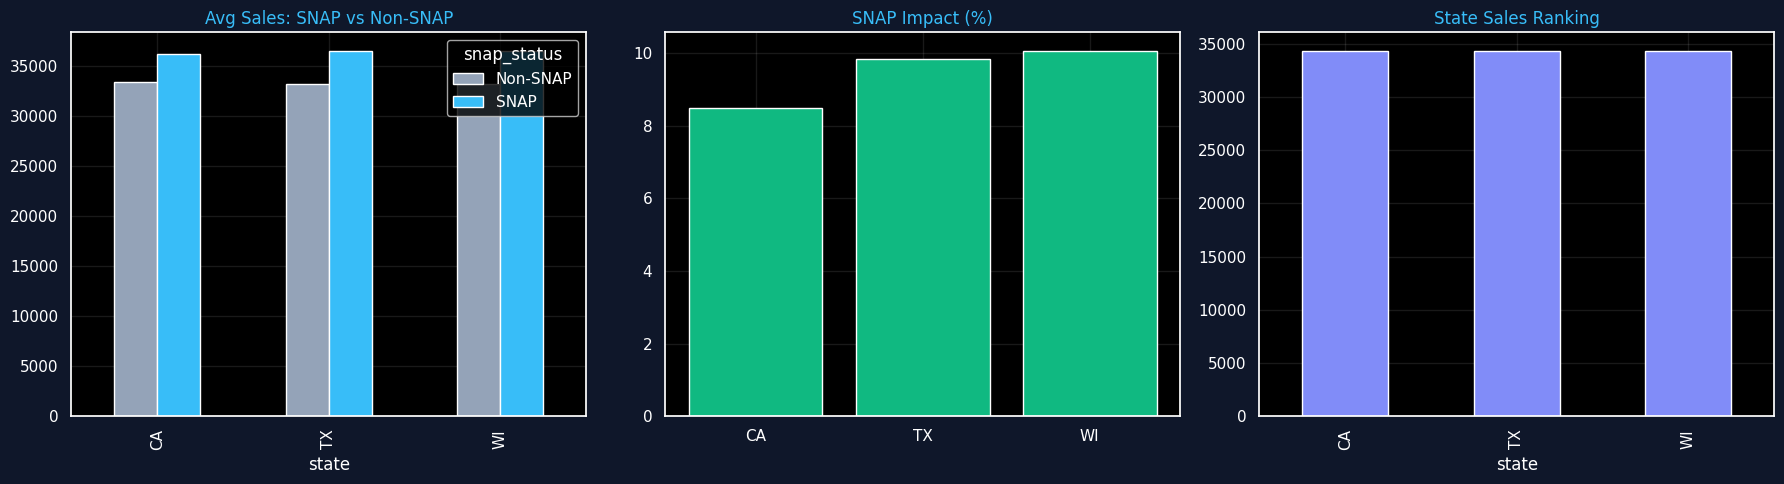

In [554]:

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
plt.style.use('dark_background')
fig.patch.set_facecolor('#0f172a')

pivot_sales = state_df.pivot_table(values="total_sales", index="state", columns="snap_status", aggfunc="mean")
pivot_sales.plot(kind="bar", ax=ax[0], color=['#94a3b8', '#38bdf8'])
ax[0].set_title("Avg Sales: SNAP vs Non-SNAP", color='#38bdf8')
ax[0].grid(alpha=0.1)


ax[1].bar(snap_summary["state"], snap_summary["impact_pct"], color='#10b981')
ax[1].axhline(0, color="white", linewidth=0.8)
ax[1].set_title("SNAP Impact (%)", color='#38bdf8')
ax[1].grid(alpha=0.1)


state_rank = state_df.groupby("state")["total_sales"].mean().sort_values(ascending=False)
state_rank.plot(kind="bar", ax=ax[2], color='#818cf8')
ax[2].set_title("State Sales Ranking", color='#38bdf8')
ax[2].grid(alpha=0.1)

plt.tight_layout()
plt.show()


best_state = state_rank.idxmax()
most_sensitive = snap_summary.loc[snap_summary["impact_pct"].abs().idxmax()]

strategy_list = ""
for _, r in snap_summary.iterrows():
    if r["impact_pct"] > 5:
        strategy_list += f'<div class="strategy-item plus">🚀 {r["state"]}: <b>Scale inventory UP</b> on SNAP days.</div>'
    elif r["impact_pct"] < -5:
        strategy_list += f'<div class="strategy-item minus">⚠️ {r["state"]}: SNAP days underperform – investigate logic.</div>'
    else:
        strategy_list += f'<div class="strategy-item neutral">⚖️ {r["state"]}: Stable demand during SNAP cycles.</div>'


html_final = f"""
<style>
    @import url('https://fonts.cdnfonts.com/css/vazirmatn');
    .decision-panel {{
        background: #0f172a; font-family: 'Vazirmatn', sans-serif; direction: rtl;
        padding: 30px; border-radius: 24px; color: #f8fafc; max-width: 950px; margin: 20px auto;
        border: 1px solid #1e293b; box-shadow: 0 20px 40px rgba(0,0,0,0.4);
    }}
    .panel-header {{ border-bottom: 2px solid #334155; padding-bottom: 15px; margin-bottom: 25px; text-align: center; }}
    .rank-grid {{ display: grid; grid-template-columns: 1fr 1fr; gap: 20px; margin-bottom: 30px; }}
    .rank-card {{
        background: rgba(56, 189, 248, 0.05); padding: 20px; border-radius: 16px;
        border: 1px solid rgba(56, 189, 248, 0.2); text-align: center;
    }}
    .rank-card.highlight {{ border-color: #f59e0b; background: rgba(245, 158, 11, 0.05); }}
    .val-text {{ font-size: 28px; font-weight: 800; display: block; margin-top: 5px; color: #38bdf8; }}
    .strategy-box {{ background: #1e293b; padding: 20px; border-radius: 16px; }}
    .strategy-item {{ padding: 12px; margin-bottom: 8px; border-radius: 8px; font-size: 14px; direction: ltr; text-align: left; }}
    .strategy-item.plus {{ background: rgba(16, 185, 129, 0.1); border-left: 4px solid #10b981; }}
    .strategy-item.minus {{ background: rgba(239, 68, 68, 0.1); border-left: 4px solid #ef4444; }}
    .strategy-item.neutral {{ background: rgba(148, 163, 184, 0.1); border-left: 4px solid #94a3b8; }}
</style>

<div class="decision-panel">
    <div class="panel-header">
        <h2 style="margin:0; color:#38bdf8;">🧠 خروجی نهایی و تصمیمات استراتژیک</h2>
    </div>

    <div class="rank-grid">
        <div class="rank-card">
            <span style="font-size: 14px; color: #94a3b8;">🥇 برترین ایالت از نظر فروش</span>
            <span class="val-text">{best_state}</span>
        </div>
        <div class="rank-card highlight">
            <span style="font-size: 14px; color: #94a3b8;">📊 حساس‌ترین ایالت به SNAP</span>
            <span class="val-text" style="color:#f59e0b">{most_sensitive['state']} ({most_sensitive['impact_pct']}%)</span>
        </div>
    </div>

    <div class="strategy-box">
        <h3 style="margin-top:0; font-size: 18px; color: #38bdf8; text-align: right;">📋 پیشنهادات عملیاتی:</h3>
        {strategy_list}
    </div>
</div>
"""

display(HTML(html_final))

<div style="direction:rtl;font-family:Tahoma,Arial,sans-serif;max-width:900px;margin:20px auto;background:#fff;padding:25px;border-radius:12px;box-shadow:0 4px 15px rgba(0,0,0,0.1);line-height:1.6;color:#333;"><h1 style="text-align:center;color:#0044cc;border-bottom:2px solid #eee;padding-bottom:10px;font-size:24px;">گزارش تحلیلی تأثیر طرح SNAP</h1><div style="margin-bottom:30px;"><h2 style="color:#0044cc;font-size:20px;">تصمیمات کلیدی</h2><ul style="list-style:none;padding:0;"><li><strong>برترین ایالت:</strong> CA</li><li><strong>بیشترین حساسیت به SNAP:</strong> WI (10.07%)</li><li><strong>پیشنهاد موجودی:</strong> افزایش در هر سه ایالت (CA, TX, WI)</li></ul></div><div style="margin-bottom:30px;overflow-x:auto;"><h2 style="color:#0044cc;font-size:20px;">خلاصه وضعیت فروش</h2><table style="width:100%;border-collapse:collapse;margin:15px 0;text-align:center;font-size:14px;"><thead style="background:#007bff;color:#fff;"><tr><th style="padding:10px;border:1px solid #ddd;">ایالت</th><th style="padding:10px;border:1px solid #ddd;">روز SNAP</th><th style="padding:10px;border:1px solid #ddd;">فروش (SNAP)</th><th style="padding:10px;border:1px solid #ddd;">فروش (عادی)</th><th style="padding:10px;border:1px solid #ddd;">تأثیر</th></tr></thead><tbody><tr><td style="padding:10px;border:1px solid #ddd;">CA</td><td style="padding:10px;border:1px solid #ddd;">630</td><td style="padding:10px;border:1px solid #ddd;">36,241</td><td style="padding:10px;border:1px solid #ddd;">33,408</td><td style="padding:10px;border:1px solid #ddd;">8.48%</td></tr><tr style="background:#f9f9f9;"><td style="padding:10px;border:1px solid #ddd;">TX</td><td style="padding:10px;border:1px solid #ddd;">630</td><td style="padding:10px;border:1px solid #ddd;">36,538</td><td style="padding:10px;border:1px solid #ddd;">33,263</td><td style="padding:10px;border:1px solid #ddd;">9.85%</td></tr><tr><td style="padding:10px;border:1px solid #ddd;">WI</td><td style="padding:10px;border:1px solid #ddd;">630</td><td style="padding:10px;border:1px solid #ddd;">36,585</td><td style="padding:10px;border:1px solid #ddd;">33,239</td><td style="padding:10px;border:1px solid #ddd;">10.07%</td></tr></tbody></table></div><div style="margin-top:20px;"><h2 style="color:#0044cc;font-size:20px;">توصیه‌های استراتژیک</h2><div style="background:#f0f7ff;padding:15px;margin:10px 0;border-right:5px solid #007bff;border-radius:4px;"><strong>بهینه‌سازی کالا:</strong> تمرکز بر دسته FOODS و افزایش تامین کالا متناسب با درصد تاثیر هر ایالت (8.5% تا 10.1%).</div><div style="background:#f0f7ff;padding:15px;margin:10px 0;border-right:5px solid #007bff;border-radius:4px;"><strong>عملیات:</strong> تنظیم شیفت کارکنان و بودجه تبلیغات بر اساس تقویم واریز SNAP.</div></div></div>









<div style="
    width: 90%; 
    max-width: 400px; 
    margin: 20px auto;
    padding: 18px 10px;
    background: linear-gradient(145deg, #0f0f0f, #151515);
    border-radius: 12px;
    border: 1px solid #c200b8;
    box-shadow: 0 0 20px rgba(191, 0, 194, 0.2), inset 0 0 5pxrgba(194, 0, 139, 0.1));   
    color: #ffffff;
    text-align: center;
    font-family: 'Segoe UI', system-ui, -apple-system, sans-serif;
    font-size: clamp(18px, 5vw, 24px); /* فونت هوشمند که با سایز صفحه تغییر میکند */
    font-weight: 800;
    text-transform: uppercase;
    letter-spacing: 3px;
    text-shadow: 0 0 10px rgba(194, 0, 133, 0.5);   
    position: relative;
    overflow: hidden;
">
    <div style="position: absolute; top: 0; left: 50%; transform: translateX(-50%); width: 40%; height: 2px; background: #7400c2; box-shadow: 0 0 10px #9e00c2;"></div>   
روزهای خاص و فروش‌های غیرعادی (Outliers & Peak Days)
</div>





In [556]:


eda_daily["is_peak"] = eda_daily["sales_zscore"] > 1.5
eda_daily["is_low"]  = eda_daily["sales_zscore"] < -1.5

peak_days = eda_daily[eda_daily["is_peak"]]
low_days  = eda_daily[eda_daily["is_low"]]


peak_list = "".join([f"<tr><td>{r['d']}</td><td>{r['total_sales']}</td><td style='color:#4ade80'>+{r['sales_zscore']}</td></tr>" 
                     for _, r in peak_days.head(10).round(2).iterrows()])

low_list = "".join([f"<tr><td>{r['d']}</td><td>{r['total_sales']}</td><td style='color:#fb7185'>{r['sales_zscore']}</td></tr>" 
                    for _, r in low_days.head(10).round(2).iterrows()])





# ______________________________________________________________________________________________________
html_outliers = f"""
<style>
    @import url('https://fonts.cdnfonts.com/css/vazirmatn');
    .monitor-panel {{
        background: #020617; font-family: 'Vazirmatn', sans-serif; direction: rtl;
        padding: 25px; border-radius: 20px; color: #f8fafc; max-width: 900px; margin: auto;
        border: 2px solid #1e293b;
    }}
    .monitor-header {{
        display: flex; justify-content: space-between; align-items: center;
        margin-bottom: 20px; border-bottom: 1px solid #334155; padding-bottom: 15px;
    }}
    .stat-row {{ display: grid; grid-template-columns: repeat(3, 1fr); gap: 15px; margin-bottom: 25px; }}
    .stat-box {{ background: #1e293b; padding: 15px; border-radius: 12px; text-align: center; border: 1px solid #334155; }}
    .grid-tables {{ display: grid; grid-template-columns: 1fr 1fr; gap: 20px; }}
    table {{ width: 100%; border-collapse: collapse; font-size: 12px; background: rgba(0,0,0,0.2); }}
    th {{ background: #334155; padding: 10px; color: #94a3b8; text-align: center; }}
    td {{ padding: 8px; text-align: center; border-bottom: 1px solid #1e293b; }}
    .alert-green {{ color: #4ade80; font-weight: bold; }}
    .alert-red {{ color: #fb7185; font-weight: bold; }}
</style>

<div class="monitor-panel">
    <div class="monitor-header">
        <h2 style="margin:0;">🔍 سیستم پایش نقاط بحرانی فروش (Outliers)</h2>
        <span style="font-size: 12px; background: #334155; padding: 4px 12px; border-radius: 20px;">Z-Score Threshold: 1.5</span>
    </div>

    <div class="stat-row">
        <div class="stat-box">
            <small style="color: #94a3b8;">کل روزهای بررسی شده</small>
            <div style="font-size: 20px; font-weight: bold;">{len(eda_daily)}</div>
        </div>
        <div class="stat-box" style="border-bottom: 3px solid #4ade80;">
            <small style="color: #4ade80;">تعداد روزهای پیک (Peak)</small>
            <div style="font-size: 20px; font-weight: bold;">{len(peak_days)}</div>
        </div>
        <div class="stat-box" style="border-bottom: 3px solid #fb7185;">
            <small style="color: #fb7185;">تعداد روزهای رکود (Low)</small>
            <div style="font-size: 20px; font-weight: bold;">{len(low_days)}</div>
        </div>
    </div>

    <div class="grid-tables">
        <div>
            <h4 class="alert-green" style="text-align:center;">📈 لیست روزهای پیک (Top 10)</h4>
            <table>
                <thead><tr><th>شناسه</th><th>میزان فروش</th><th>Z-Score</th></tr></thead>
                <tbody>{peak_list}</tbody>
            </table>
        </div>
        <div>
            <h4 class="alert-red" style="text-align:center;">📉 لیست روزهای رکود (Bottom 10)</h4>
            <table>
                <thead><tr><th>شناسه</th><th>میزان فروش</th><th>Z-Score</th></tr></thead>
                <tbody>{low_list}</tbody>
            </table>
        </div>
    </div>
</div>
"""

display(HTML(html_outliers))

شناسه,میزان فروش,Z-Score
d_435,45638,+1.54
d_562,45798,+1.56
d_590,46649,+1.68
d_596,45959,+1.58
d_715,45878,+1.57
d_736,51032,+2.27
d_743,45852,+1.57
d_764,49772,+2.1
d_765,48247,+1.89
d_792,46410,+1.64


In [564]:

eda_daily["event"] = eda_daily["event_name_1"].fillna("No_occasion")
event_summary = (
    eda_daily
    .groupby("event")
    .agg(
        avg_sales=("total_sales", "mean"),
        count=("total_sales", "count"),
        max_sales=("total_sales", "max"),
        min_sales=("total_sales", "min")
    )
    .round(0)
)

No_occasion_avg = event_summary.loc["No_occasion", "avg_sales"]
event_summary["impact_vs_No_occasion_%"] = (
    (event_summary["avg_sales"] - No_occasion_avg) / No_occasion_avg * 100
).round(1)


event_outliers = eda_daily.groupby("event")[["is_peak", "is_low"]].any().any(axis=1)
event_summary["contains_outlier"] = event_outliers


sorted_events = event_summary.sort_values("impact_vs_No_occasion_%", ascending=False).head(10)


table_rows = ""
for event, row in sorted_events.iterrows():
    impact = row['impact_vs_No_occasion_%']
    color = "#4ade80" if impact > 0 else "#fb7185"
    outlier_badge = "⚠️ Yes" if row['contains_outlier'] else "✅ Stable"
    outlier_color = "#f59e0b" if row['contains_outlier'] else "#94a3b8"
    
    table_rows += f"""
    <tr>
        <td style="text-align:right; font-weight:bold;">{event}</td>
        <td>{int(row['avg_sales']):,}</td>
        <td style="color:{color}; font-weight:bold;">{"+" if impact > 0 else ""}{impact}%</td>
        <td>{int(row['count'])}</td>
        <td style="color:{outlier_color}; font-size:11px;">{outlier_badge}</td>
    </tr>
    """


html_events = f"""
<style>
    @import url('https://fonts.cdnfonts.com/css/vazirmatn');
    .event-panel {{
        background: #0f172a; font-family: 'Vazirmatn', sans-serif; direction: rtl;
        padding: 25px; border-radius: 20px; color: #f1f5f9; max-width: 900px; margin: auto;
        border: 1px solid #334155; box-shadow: 0 15px 30px rgba(0,0,0,0.5);
    }}
    .event-header {{ text-align: center; margin-bottom: 25px; }}
    .base-avg-box {{
        background: rgba(56, 189, 248, 0.1); border: 1px dashed #38bdf8;
        padding: 10px; border-radius: 12px; display: inline-block; margin-bottom: 20px;
    }}
    table {{ width: 100%; border-collapse: collapse; background: #1e293b; border-radius: 15px; overflow: hidden; }}
    th {{ background: #334155; padding: 12px; color: #38bdf8; font-size: 13px; text-align: center; }}
    td {{ padding: 12px; text-align: center; border-bottom: 1px solid #0f172a; font-size: 13px; }}
    tr:hover td {{ background: rgba(255,255,255,0.05); }}
    .legend {{ display: flex; gap: 20px; justify-content: center; margin-top: 15px; font-size: 11px; color: #94a3b8; }}
</style>

<div class="event-panel">
    <div class="event-header">
        <h2 style="margin:0; color:#38bdf8;">🎭 تحلیل تأثیر رویدادها بر فروش</h2>
        <div class="base-avg-box">
            میانگین فروش در روزهای عادی (No Event): <b>{int(No_occasion_avg):,}</b>
        </div>
    </div>

    <table>
        <thead>
            <tr>
                <th style="text-align:right;">نام رویداد (Event)</th>
                <th>میانگین فروش</th>
                <th>تأثیر نسبت به مبنا (%)</th>
                <th>تکرار (Days)</th>
                <th>وضعیت نوسان</th>
            </tr>
        </thead>
        <tbody>
            {table_rows}
        </tbody>
    </table>

    <div class="legend">
        <span>🔹 مبنای مقایسه: میانگین فروش روزهای No_occasion</span>
        <span>⚠️ Outlier: نشان‌دهنده وجود پیک‌های غیرعادی در این رویداد</span>
    </div>
</div>
"""

display(HTML(html_events))

نام رویداد (Event),میانگین فروش,تأثیر نسبت به مبنا (%),تکرار (Days),وضعیت نوسان
LaborDay,"42,155",+22.2%,5,⚠️ Yes
SuperBowl,"40,924",+18.7%,6,⚠️ Yes
Easter,"39,518",+14.6%,5,⚠️ Yes
OrthodoxEaster,"38,277",+11.0%,4,⚠️ Yes
Father's day,"36,562",+6.0%,4,✅ Stable
Purim End,"35,957",+4.3%,6,⚠️ Yes
Eid al-Fitr,"35,268",+2.3%,5,⚠️ Yes
ColumbusDay,"35,165",+2.0%,5,✅ Stable
VeteransDay,"35,119",+1.8%,5,✅ Stable
Ramadan starts,"34,780",+0.8%,5,✅ Stable


In [ ]:


peak_days["event"] = eda_daily["event_name_1"].fillna("No Event")
pos_list = [str(e) for e in event_summary[event_summary["impact_vs_No_occasion_%"] > 0].index if str(e) != 'No_occasion']
neg_list = [str(e) for e in event_summary[event_summary["impact_vs_No_occasion_%"] < 0].index if str(e) != 'No_occasion']
unique_peaks = [str(e) for e in peak_days['event'].unique() if str(e) != 'nan']

# -------------------------------
# (UI)
# -------------------------------
html_insights = f"""
<style>
    @import url('https://fonts.cdnfonts.com/css/vazirmatn');
    .insight-wrapper {{
        background: #0f172a; font-family: 'Vazirmatn', sans-serif; direction: rtl;
        padding: 30px; border-radius: 24px; color: #f8fafc; max-width: 950px; margin: auto;
        border: 1px solid #1e293b; box-shadow: 0 25px 50px -12px rgba(0,0,0,0.5);
    }}
    .insight-header {{
        border-bottom: 2px solid #334155; padding-bottom: 15px; margin-bottom: 25px;
        display: flex; align-items: center; gap: 15px;
    }}
    .insight-card {{
        background: #1e293b; padding: 20px; border-radius: 16px; margin-bottom: 15px;
        border-right: 5px solid #38bdf8; position: relative;
    }}
    .insight-card.warning {{ border-right-color: #fb7185; }}
    .insight-card.success {{ border-right-color: #4ade80; }}
    
    .tag-container {{ display: flex; flex-wrap: wrap; gap: 8px; margin-top: 10px; }}
    .tag {{
        padding: 4px 12px; border-radius: 20px; font-size: 11px; font-weight: bold;
        background: rgba(255,255,255,0.05); border: 1px solid rgba(255,255,255,0.1);
    }}
    .tag.pos {{ color: #4ade80; border-color: rgba(74, 222, 128, 0.3); }}
    .tag.neg {{ color: #fb7185; border-color: rgba(251, 113, 133, 0.3); }}
    .tag.peak {{ color: #38bdf8; border-color: rgba(56, 189, 248, 0.3); }}
    
    .label {{ font-weight: 800; font-size: 16px; display: block; margin-bottom: 5px; }}
    .desc {{ font-size: 14px; color: #94a3b8; line-height: 1.6; }}
</style>

<div class="insight-wrapper">
    <div class="insight-header">
        <h2 style="margin:0;">🧠 تحلیل نهایی و یافته‌های کلیدی (EDA Insights)</h2>
    </div>

    <div class="insight-card">
        <span class="label" style="color:#38bdf8;">📈 الگوهای اوج فروش (Peak Analysis)</span>
        <span class="desc">روزهای پیک فروش پیوستگی شدیدی با رویدادهای تقویمی دارند. این یعنی تقاضا در این روزها "ارگانیک" نیست و مستقیماً توسط رویدادها تحریک شده است:</span>
        <div class="tag-container">
            {" ".join([f'<span class="tag peak">{e}</span>' for e in unique_peaks[:8]])}
            <span class="tag">...</span>
        </div>
    </div>

    <div class="insight-card success">
        <span class="label" style="color:#4ade80;">🚀 محرک‌های رشد (Positive Impact Events)</span>
        <span class="desc">مناسبت‌های زیر به طور میانگین باعث افزایش حجم فروش نسبت به روزهای عادی شده‌اند:</span>
        <div class="tag-container">
            {" ".join([f'<span class="tag pos">{e}</span>' for e in pos_list[:12]])}
        </div>
    </div>

    <div class="insight-card warning">
        <span class="label" style="color:#fb7185;">🔻 عوامل بازدارنده (Negative Impact Events)</span>
        <span class="desc">در این رویدادها شاهد افت تقاضا یا سرکوب فروش نسبت به میانگین روزهای بدون مناسبت هستیم:</span>
        <div class="tag-container">
            {" ".join([f'<span class="tag neg">{e}</span>' for e in neg_list[:12]])}
        </div>
    </div>

    <div style="font-size: 12px; color: #475569; text-align: center; margin-top: 20px;">
        💡 این یافته‌ها زیربنای استراتژی‌های موجودی‌گذاری (Inventory Planning) و کمپین‌های تبلیغاتی خواهند بود.
    </div>
</div>
"""

display(HTML(html_insights))

<div style="direction:rtl;font-family:Tahoma,Arial,sans-serif;max-width:900px;margin:20px auto;background:#fff;padding:25px;border-radius:12px;box-shadow:0 4px 15px rgba(0,0,0,0.1);line-height:1.6;color:#333;"><h1 style="text-align:center;color:#d32f2f;border-bottom:2px solid #eee;padding-bottom:10px;font-size:24px;">تحلیل رویدادهای خاص و تقویم فروش</h1><div style="margin-bottom:25px;"><h2 style="color:#d32f2f;font-size:20px;">🚀 نقاط اوج (مناسبت‌های کلیدی)</h2><div style="background:#f1f8e9;padding:15px;margin:10px 0;border-right:5px solid #4caf50;border-radius:4px;">فروش در مناسبت‌هایی مانند <strong>روز کارگر (Labor Day)</strong>، <strong>عید فطر</strong> و <strong>سوپربول (Super Bowl)</strong> به حداکثر خود می‌رسد. این روزها فرصت طلایی برای کمپین‌های تبلیغاتی هستند.</div></div><div style="margin-bottom:25px;"><h2 style="color:#d32f2f;font-size:20px;">🛑 توقف کامل فروش (سقوط ۱۰۰٪)</h2><div style="background:#fff1f0;padding:15px;margin:10px 0;border-right:5px solid #f5222d;border-radius:4px;">رویدادهایی مثل <strong>کریسمس</strong> و <strong>روز شکرگزاری</strong> باعث کاهش شدید فروش تا مرز تعطیلی کامل (۱۰۰٪-) می‌شوند که نشان‌دهنده تعطیلی مراکز خرید یا تغییر جهت کامل رفتار مصرف‌کننده است.</div></div><div style="margin-top:20px;"><h2 style="color:#d32f2f;font-size:20px;">🔍 دوره‌های رکود و تقاضای پایین</h2><div style="background:#f5f5f5;padding:15px;margin:10px 0;border-right:5px solid #9e9e9e;border-radius:4px;">روزهای کم‌فروش مشخصی در تقویم دیده می‌شوند که با <strong>دوره‌های غیرتبلیغاتی</strong> یا <strong>سرکوب تعمدی تقاضا</strong> همخوانی دارند و نیاز به بازنگری در برنامه‌ریزی موجودی دارند.</div></div><div style="background:#2c3e50;color:#fff;padding:12px;border-radius:8px;text-align:center;margin-top:20px;font-size:14px;">نکته: تطبیق زنجیره تأمین با این نوسانات شدید (از ۰ تا ۱۰۰) برای جلوگیری از ضرر ضروری است.</div></div>

In [366]:

from plotly.subplots import make_subplots


years_to_plot = 5
days_per_year = 365

fig = make_subplots(
    rows=years_to_plot,
    cols=1,
    shared_yaxes=True,
    subplot_titles=[f"Year {i+1}" for i in range(years_to_plot)]
)


colors = px.colors.diverging.Spectral

for i in range(years_to_plot):
    start = i * days_per_year
    end = start + days_per_year

# Assuming day is of type str and contains numerical values
    means = day.iloc[:, start:end].apply(pd.to_numeric, errors='coerce').sum()

    fig.add_trace(
        go.Scatter(
            x=means.index,
            y=means.values,
            mode="lines+markers",
            line=dict(
                color=colors[i % len(colors)],
                width=2
            ),
            marker=dict(size=6),
            opacity=0.9,
            name=f"Year {i+1}"
        ),
        row=i+1,
        col=1
    )


fig.update_layout(
    height=4 * 300 * years_to_plot // 5,
    width=1400,
    showlegend=False,
    plot_bgcolor="black",
    paper_bgcolor="black",
    font=dict(color="white"),
)

fig.update_xaxes(
    showgrid=True,
    gridcolor="rgba(255,255,255,0.2)",
    zeroline=False
)

fig.update_yaxes(
    showgrid=True,
    gridcolor="rgba(255,255,255,0.2)",
    zeroline=False
)

fig.show()


In [367]:
tet=eda_daily[eda_daily["total_sales"]<=20]
tet

,d,total_sales,wday,weekday,month,year,event_name_1,event_type_1,snap_CA,snap_TX,snap_WI,log_total_sales,sales_zscore,is_peak,is_low,event
330,d_331,13,2,Sunday,12,2011,Christmas,National,0,0,0,2.639057,-4.673156,False,True,Christmas
696,d_697,11,4,Tuesday,12,2012,Christmas,National,0,0,0,2.484907,-4.673428,False,True,Christmas
1061,d_1062,20,5,Wednesday,12,2013,Christmas,National,0,0,0,3.044522,-4.672203,False,True,Christmas
1426,d_1427,20,6,Thursday,12,2014,Christmas,National,0,0,0,3.044522,-4.672203,False,True,Christmas
1791,d_1792,14,7,Friday,12,2015,Christmas,National,0,0,0,2.708050,-4.673020,False,True,Christmas


In [368]:
from IPython.display import display, HTML

days = ['d_1062', 'd_1427', 'd_1792', 'd_697', 'd_331']
filtered_df = eda_daily[eda_daily['d'].isin(days)][['d', 'event_name_1']].fillna("—")

html = """
<style>
.event-table {
    border-collapse: collapse;
    width: 70%;
    margin: 20px 0;
    font-family: "Segoe UI", Arial, sans-serif;
    background-color: #020617;
    color: #e5e7eb;
    box-shadow: 0 18px 45px rgba(0,0,0,0.7);
    border-radius: 14px;
    overflow: hidden;
}
.event-table th {
    background-color: #020617;
    color: #c7d2fe;
    padding: 16px;
    font-size: 14px;
    letter-spacing: 1px;
    border-bottom: 1px solid #1e293b;
}
.event-table td {
    padding: 14px;
    text-align: center;
    font-size: 14px;
    border-bottom: 1px solid #1e293b;
}
.event-table tr:nth-child(even) {
    background-color: #020617;
}
.event-table tr:nth-child(odd) {
    background-color: #020617cc;
}
.event-table tr:hover {
    background-color: #1e293b;
    transition: background-color 0.2s ease;
}
.day-col {
    font-weight: 700;
    color: #94a3b8;
    font-family: monospace;
}
</style>

<table class="event-table">
    <tr>
        <th>DAY</th>
        <th>EVENT NAME</th>
    </tr>
"""

for _, row in filtered_df.iterrows():
    html += f"""
    <tr>
        <td class="day-col">{row['d']}</td>
        <td>{row['event_name_1']}</td>
    </tr>
    """

html += "</table>"

display(HTML(html))


DAY,EVENT NAME
d_331,Christmas
d_697,Christmas
d_1062,Christmas
d_1427,Christmas
d_1792,Christmas


In [369]:

years_to_plot = 5
days_per_year = 365

colors = px.colors.qualitative.Plotly[:years_to_plot]

fig = go.Figure()

for i in range(years_to_plot):
    start = i * days_per_year
    end = start + days_per_year
    
    means = day.iloc[:, start:end].mean()
    
    fig.add_trace(go.Scatter(
        x=means.index,
        y=means.values,
        mode='lines+markers',
        name=f'Year {i+1}',
        line=dict(color=colors[i], width=2),
        marker=dict(size=5),
    ))


fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    xaxis=dict(showgrid=True, gridcolor='gray', color='white'),
    yaxis=dict(showgrid=True, gridcolor='gray', color='white'),
    legend=dict(font=dict(color='white')),
    title=dict(text='Mean per Day for 5 Years', font=dict(color='white', size=20))
)

fig.show()


<div class="analysis-report"dir="rtl"><style>@import url('https://fonts.cdnfonts.com/css/vazirmatn');.analysis-report{background:linear-gradient(135deg,#f4f6f9,#dfe6e9);padding:32px 20px;border-radius:24px;font-family:'Vazirmatn',sans-serif;color:#2f3640;max-width:1000px;margin:30px auto;box-shadow:0 18px 40px rgba(0,0,0,.08)}.report-header{text-align:center;margin-bottom:36px}.report-header h2{font-weight:900;color:#1e3799;font-size:26px;margin-bottom:8px}.report-header p{font-size:14px;color:#636e72}.divider{width:70px;height:4px;background:#4834d4;margin:12px auto 0;border-radius:2px}.grid-container{display:grid;grid-template-columns:repeat(auto-fit,minmax(260px,1fr));gap:22px}.card{background:rgba(255,255,255,.9);backdrop-filter:blur(8px);padding:22px 20px;border-radius:18px;border:1px solid rgba(0,0,0,.05);box-shadow:0 10px 22px rgba(0,0,0,.05);transition:.3s;display:flex;flex-direction:column;justify-content:space-between}.card:hover{transform:translateY(-6px);box-shadow:0 18px 36px rgba(0,0,0,.1);background:#fff}.card-title{font-weight:800;font-size:16px;color:#273c75;margin-bottom:10px;display:flex;align-items:center;gap:8px}.card-content{font-size:14px;line-height:1.9;color:#57606f}.highlight{font-weight:700;color:#c0392b;background:rgba(192,57,43,.08);padding:2px 6px;border-radius:4px;display:inline-block;direction:ltr}.badge{background:#27ae60;color:#fff;padding:3px 10px;border-radius:50px;font-size:11px;font-weight:700}@media(max-width:600px){.report-header h2{font-size:22px}.card-title{font-size:15px}.card-content{font-size:13.5px}}</style><div class="report-header"><h2>نتیجه گزارش ها </h2><p>Strategic Insights & Operational Action Plan</p><div class="divider"></div></div><div class="grid-container"><div class="card"><div class="card-title">📅 تحلیل روزهای پیک فروش</div><p class="card-content">تحلیل داده‌ها نشان می‌دهد بیشترین درآمد در روزهای <span class="highlight">Saturday & Sunday</span> ثبت شده است. پیشنهاد می‌شود در این بازه‌ها سطح <b>موجودی کالا</b> و <b>نیروی فروش</b> افزایش یابد.</p></div><div class="card"><div class="card-title">📉 بهینه‌سازی فروش وسط هفته</div><p class="card-content">کاهش تقاضا در روزهای میانی هفته مشاهده می‌شود. اجرای <b>تخفیف‌های هدفمند</b> و کمپین‌های تشویقی برای افزایش فروش توصیه می‌گردد.</p></div><div class="card"><div class="card-title">☀️ الگوی فصلی تقاضا</div><p class="card-content">در ماه‌های <span class="highlight">7 & 8</span> تقاضا به اوج می‌رسد و لازم است ظرفیت انبار افزایش یابد. در فصول کم‌رونق، استراتژی <b>قیمت‌گذاری انعطاف‌پذیر</b> اثربخش‌تر خواهد بود.</p></div><div class="card"><div class="card-title">🔔 رویدادها و پرداخت‌های حمایتی</div><p class="card-content">در بازه‌های پرداخت <span class="badge">SNAP</span> در ایالت‌های CA، TX و WI سطح موجودی باید افزایش یابد. همچنین برنامه‌ریزی ویژه برای مناسبت‌هایی نظیر <span class="highlight">Labor Day</span> و <span class="highlight">Super Bowl</span> ضروری است.</p></div></div></div>


# نمودار ها 

میانگین فروش هر دسته محصولات

In [370]:
hOBBIES=df[df["cat_id"]=="HOBBIES"]
fOODS=df[df["cat_id"]=="FOODS"]
hOUSEHOLD=df[df["cat_id"]=="HOUSEHOLD"]

In [371]:
day_hs = hOBBIES.iloc[:, 6:]
day_f = fOODS.iloc[:, 6:]
day_hd = hOUSEHOLD.iloc[:, 6:]

x = day_hs.values.sum()
x1 = day_f.values.sum()
x2 = day_hd.values.sum()

html_output = f"""
<div style="
    background-color: #1e1e1e;
    color: white;
    padding: 20px;
    border-radius: 15px;
    font-family: Arial, sans-serif;
    width: 300px;
">
    <h3 style="text-align:center;">Total Expenses</h3>
    <p><strong>HOBBIES ➡️</strong> {x} $</p>
    <p><strong>FOODS ➡️</strong> {x1} $</p>
    <p><strong>HOUSEHOLD ➡️</strong> {x2} $</p>
</div>
"""

# نمایش در Jupyter Notebook یا محیط HTML
from IPython.core.display import display, HTML
display(HTML(html_output))


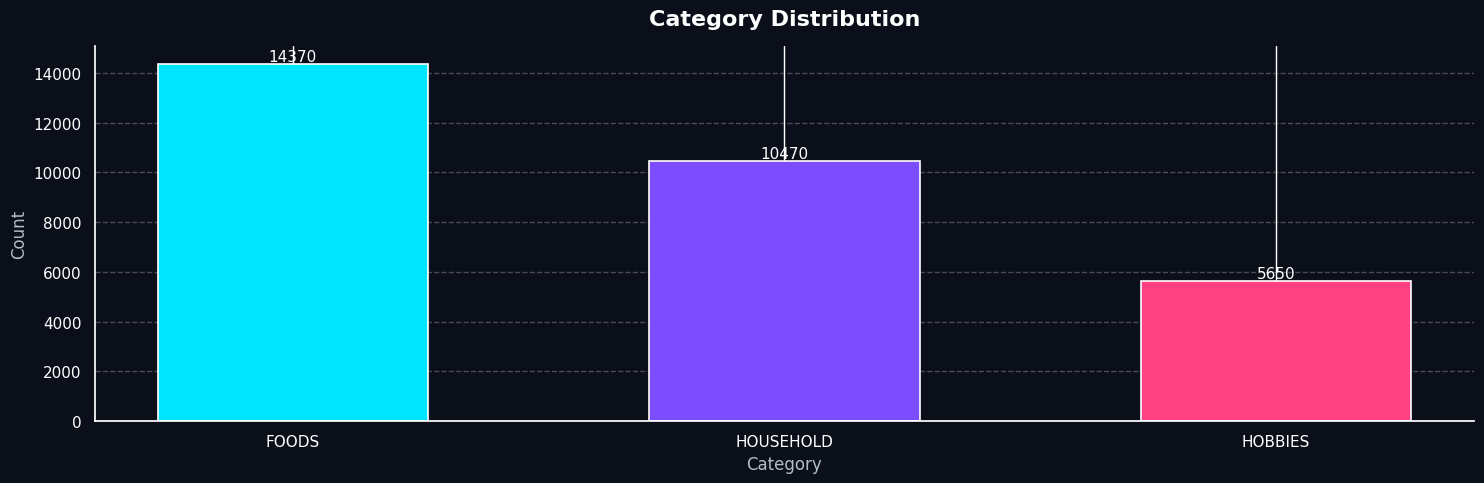

In [372]:
import matplotlib.pyplot as plt
import numpy as np

counts = df["cat_id"].value_counts()

plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(15, 5))
fig.patch.set_facecolor("#0b0f1a")
ax.set_facecolor("#0b0f1a")

bars = ax.bar(
    counts.index,
    counts.values,
    color=["#00E5FF", "#7C4DFF", "#FF4081"],
    width=0.55,
    edgecolor="white",
    linewidth=1.2
)


ax.set_title(
    "Category Distribution",
    fontsize=16,
    fontweight="bold",
    color="white",
    pad=15
)
ax.set_xlabel("Category", fontsize=12, color="#B0BEC5")
ax.set_ylabel("Count", fontsize=12, color="#B0BEC5")


ax.grid(axis="y", linestyle="--", alpha=0.25)


for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height}",
        ha="center",
        va="bottom",
        fontsize=11,
        color="white"
    )


ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()


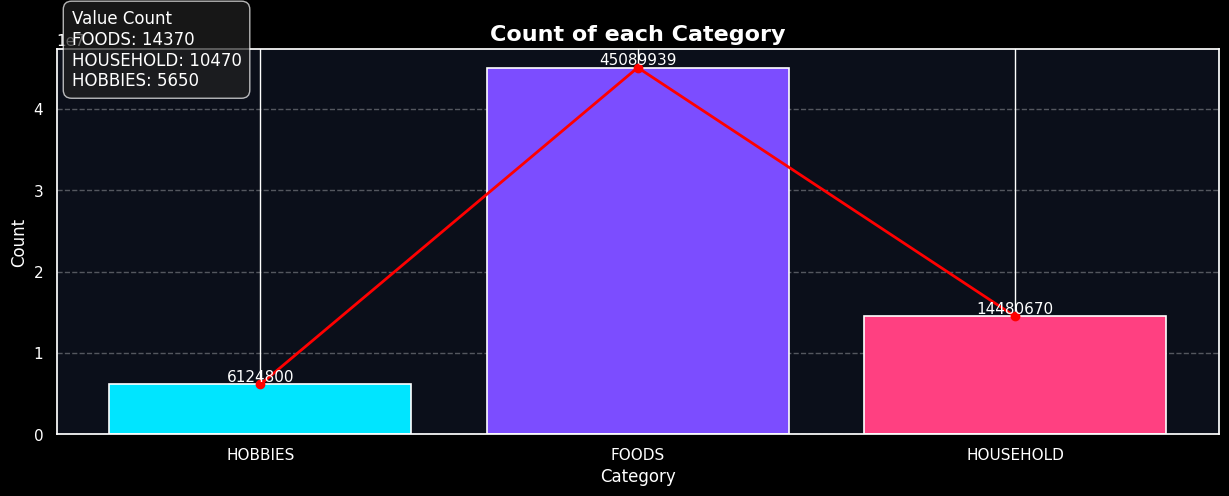

In [373]:
list_pro = ['HOBBIES', 'FOODS', 'HOUSEHOLD']
arr = [x, x1, x2]

# Set figure size and background color
plt.figure(figsize=(15,5))
plt.rcParams['axes.facecolor'] = '#0b0f1a'   # Axes background
plt.rcParams['figure.facecolor'] = '#0b0f1a' # Figure background

colors = ['#00E5FF', '#7C4DFF', '#FF4081']

# Draw bars
bars = plt.bar(list_pro, arr, color=colors, edgecolor='white', linewidth=1.2)

# Draw line connecting the tops of bars
plt.plot(list_pro, arr, color="red", marker='o', linewidth=2)

# Set title and axis labels
plt.title("Count of each Category", fontsize=16, fontweight='bold', color='white')
plt.xlabel("Category", fontsize=12, color='white')
plt.ylabel("Count", fontsize=12, color='white')

# Show value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), 
             ha='center', va='bottom', color='white', fontsize=11)

# Add a light grid for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.3, color='white')

# Prepare value counts as string
total_text = df["cat_id"].value_counts()
total_text_str = "\n".join([f"{cat}: {val}" for cat, val in zip(total_text.index, total_text.values)])

# Add box inside plot
plt.text(
    -0.5, max(arr)*0.95,  # position inside plot
    "Value Count\n" + total_text_str,
    fontsize=12,
    color='white',
    bbox=dict(facecolor='#222', alpha=0.7, boxstyle='round,pad=0.5')
)

plt.show()


هر ایالات 

In [374]:
CA=df[df["state_id"]=="CA"].iloc[:, 6:]
TX=df[df["state_id"]=="TX"].iloc[:, 6:]
WI=df[df["state_id"]=="WI"].iloc[:, 6:]

c = CA.values.sum()
t = TX.values.sum()
wi = WI.values.sum()


# mean 

In [375]:

# Calculate mean sales per state
arr = [CA.values.mean(), TX.values.mean(), WI.values.mean()]
states = ['California', 'Texas', 'Wisconsin']

# Create figure
fig = go.Figure()

# Add bar trace
fig.add_trace(go.Bar(
    x=states,
    y=arr,
    text=[f"{x:.2f}" for x in arr],  # show mean value on top
    textposition='outside',
    marker_color=['#00E5FF', '#7C4DFF', '#FF4081'],
    name='Average Daily Sales'
))

# Add line trace connecting tops
fig.add_trace(go.Scatter(
    x=states,
    y=arr,
    mode='lines+markers',
    marker=dict(color='red', size=8),
    line=dict(color='red', width=2),
    name='Trend'
))

# Layout
fig.update_layout(
    title='Average Daily Sales per State',
    xaxis_title='State',
    yaxis_title='Average Sales',
    plot_bgcolor='#0b0f1a',
    paper_bgcolor='#0b0f1a',
    font=dict(color='white', size=12),
    yaxis=dict(showgrid=True, gridcolor='gray', zeroline=False),
    xaxis=dict(showgrid=False)
)

fig.show()


# sum 

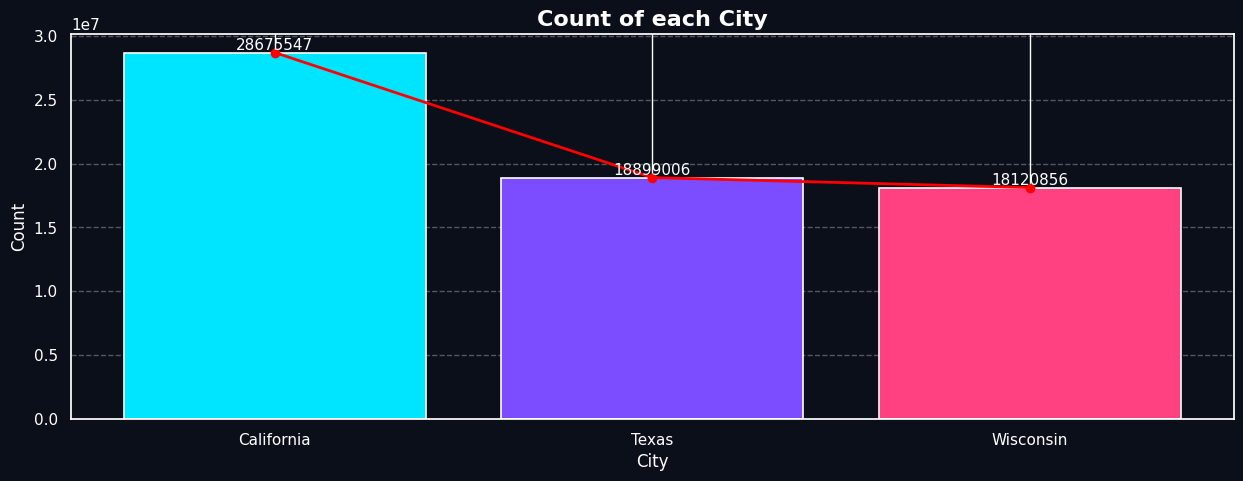

In [376]:
list_pro = ['California', 'Texas', 'Wisconsin']
arr = [c, t, wi]

plt.figure(figsize=(15,5))
plt.rcParams['axes.facecolor'] = '#0b0f1a'   
plt.rcParams['figure.facecolor'] = '#0b0f1a' 

colors = ['#00E5FF', '#7C4DFF', '#FF4081']


bars = plt.bar(list_pro, arr, color=colors, edgecolor='white', linewidth=1.2)


plt.plot(list_pro, arr, color="red", marker='o', linewidth=2)

s
plt.title("Count of each City", fontsize=16, fontweight='bold', color='white')
plt.xlabel("City", fontsize=12, color='white')
plt.ylabel("Count", fontsize=12, color='white')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), 
             ha='center', va='bottom', color='white', fontsize=11)


plt.grid(axis='y', linestyle='--', alpha=0.3, color='white')


total_text = df["cat_id"].value_counts()
total_text_str = "\n".join([f"{cat}: {val}" for cat, val in zip(total_text.index, total_text.values)])


plt.show()


# count

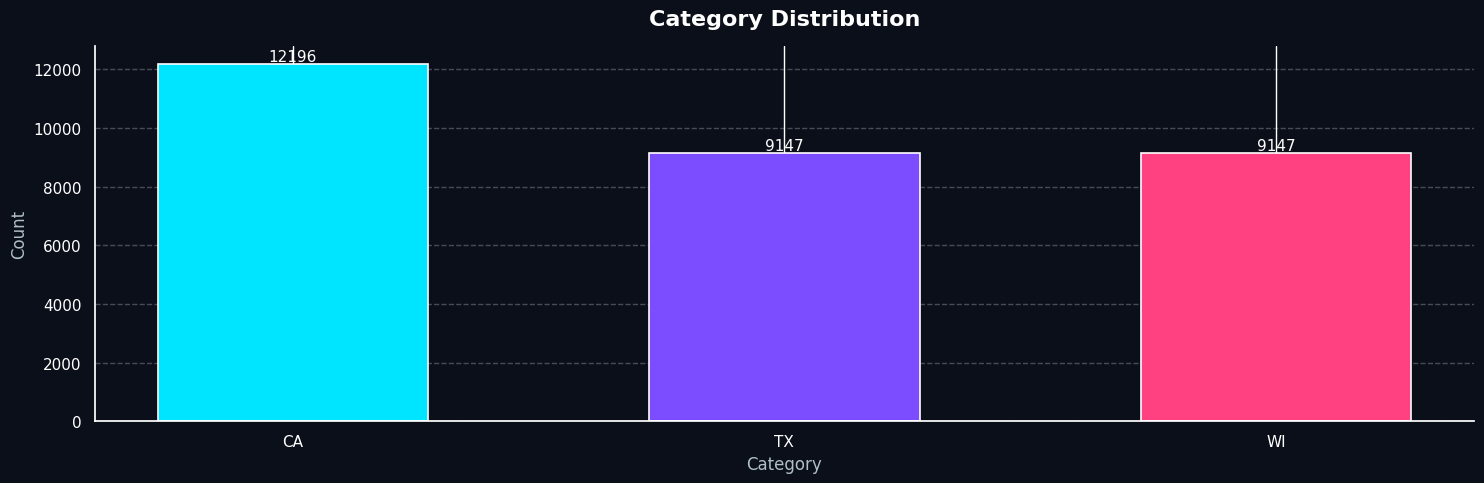

In [377]:
import matplotlib.pyplot as plt
import numpy as np

counts = df["state_id"].value_counts()

plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(15, 5))
fig.patch.set_facecolor("#0b0f1a")
ax.set_facecolor("#0b0f1a")

bars = ax.bar(
    counts.index,
    counts.values,
    color=["#00E5FF", "#7C4DFF", "#FF4081"],
    width=0.55,
    edgecolor="white",
    linewidth=1.2
)


ax.set_title(
    "Category Distribution",
    fontsize=16,
    fontweight="bold",
    color="white",
    pad=15
)
ax.set_xlabel("Category", fontsize=12, color="#B0BEC5")
ax.set_ylabel("Count", fontsize=12, color="#B0BEC5")


ax.grid(axis="y", linestyle="--", alpha=0.25)


for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height}",
        ha="center",
        va="bottom",
        fontsize=11,
        color="white"
    )


ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()


# map 

In [378]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Calculate total sales per state
CA = df[df["state_id"]=="CA"].iloc[:, 6:]
TX = df[df["state_id"]=="TX"].iloc[:, 6:]
WI = df[df["state_id"]=="WI"].iloc[:, 6:]

c = CA.values.sum()
t = TX.values.sum()
wi = WI.values.sum()

# Count of rows per state (value_counts)
rows_c = len(CA)
rows_t = len(TX)
rows_wi = len(WI)

# Prepare DataFrame for the map
df_map = pd.DataFrame({
    'state_code': ['CA', 'TX', 'WI'],
    'total_sales': [c, t, wi],
    'row_count': [rows_c, rows_t, rows_wi]
})

# State names and approximate coordinates
state_map = {
    'CA': {'name':'California', 'lat':36.7783, 'lon':-119.4179},
    'TX': {'name':'Texas', 'lat':31.9686, 'lon':-99.9018},
    'WI': {'name':'Wisconsin', 'lat':44.5, 'lon':-89.5}
}

df_map['state_name'] = df_map['state_code'].map(lambda x: state_map[x]['name'])
df_map['lat'] = df_map['state_code'].map(lambda x: state_map[x]['lat'])
df_map['lon'] = df_map['state_code'].map(lambda x: state_map[x]['lon'])

# Plot Choropleth map
fig = px.choropleth(
    df_map,
    locations='state_code',
    locationmode="USA-states",
    color='total_sales',
    scope="usa",
    color_continuous_scale="Oranges",
    labels={'total_sales':'Total Sales'},
    hover_name='state_name',
    hover_data={'total_sales': True, 'row_count': True, 'state_code': False}
)

# Add text on the map showing both total sales and row count
fig.add_trace(go.Scattergeo(
    lon=df_map['lon'],
    lat=df_map['lat'],
    text=df_map.apply(lambda x: f"Sales: {x['total_sales']:,}<br>Rows: {x['row_count']}", axis=1),
    mode='text',
    showlegend=False,
    textfont=dict(size=14, color='black', family='Arial')
))

# Layout settings
fig.update_layout(
    title_text='Total Sales and Row Counts per State',
    geo=dict(
        showlakes=True, lakecolor='lightblue',
        projection_scale=1.2,
        center=dict(lat=37.5, lon=-95)
    ),
    coloraxis_colorbar=dict(title="Total Sales")
)

fig.show()


# هر شهر  چه مقدار فروش داشته در هر محصول 

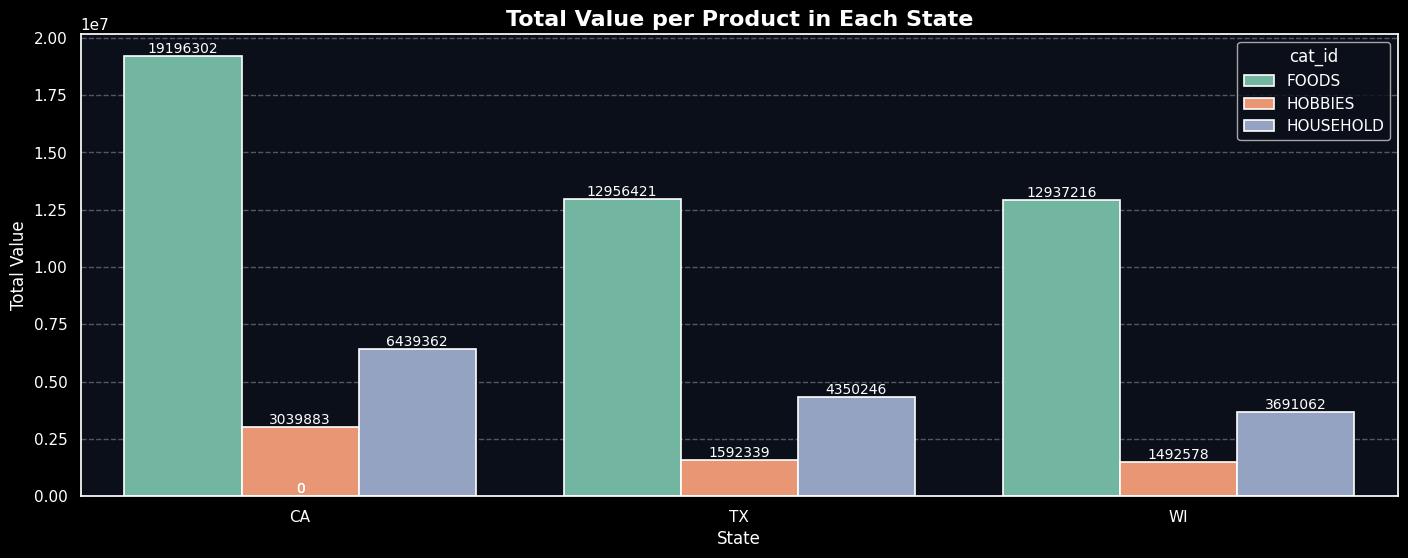

In [379]:

df_melted = df.melt(
    id_vars=["state_id", "cat_id"], 
    value_vars=df.columns[6:], 
    value_name="value"
)


agg_df = df_melted.groupby(["state_id", "cat_id"])["value"].sum().reset_index()


plt.figure(figsize=(17,6))
plt.rcParams['axes.facecolor'] = '#0b0f1a'
plt.rcParams['figure.facecolor'] = '#0b0f1a'


sns.barplot(
    data=agg_df, 
    x="state_id", 
    y="value", 
    hue="cat_id", 
    palette="Set2", 
    edgecolor="white", 
    linewidth=1.2
)
plt.title("Total Value per Product in Each State", fontsize=16, fontweight='bold', color='white')
plt.xlabel("State", fontsize=12, color='white')
plt.ylabel("Total Value", fontsize=12, color='white')


ax = plt.gca()
for p in ax.patches:
    ax.annotate(int(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', color='white', fontsize=10)


plt.grid(axis='y', linestyle='--', alpha=0.3, color='white')

plt.show()


# HOBBIES 

<table style="width:60%; margin:auto; border-collapse:collapse; font-family:Arial; background:#111; color:white;">
  <thead>
    <tr style="background:#222;">
      <th style="padding:10px; border:1px solid #444;">Category</th>
      <th style="padding:10px; border:1px solid #444;">Description</th>
      <th style="padding:10px; border:1px solid #444;">Examples</th>
      <th style="padding:10px; border:1px solid #444;">Number of Items</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background:#0d47a1;">
      <td style="padding:10px; border:1px solid #444;">HOBBIES</td>
      <td style="padding:10px; border:1px solid #444;">Non-food recreational items</td>
      <td style="padding:10px; border:1px solid #444;">Toys, games, sports equipment, entertainment items</td>
      <td style="padding:10px; border:1px solid #444;">5,650</td>
    </tr>
  </tbody>
</table>


# پیدا کردن بیشترین عدد در روز ها و داده های پرت و نمایش انها 

In [380]:

outlier_counts = {}

for col in day.columns:
    Q1 = day[col].quantile(0.25)
    Q3 = day[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = day[(day[col] < lower_bound) | (day[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]


outlier_df = (
    pd.DataFrame.from_dict(outlier_counts, orient="index", columns=["outlier_count"])
      .sort_values("outlier_count", ascending=False)
)

outlier_df.iloc[:10] 


,outlier_count
d_482,7614
d_374,7613
d_440,7608
d_370,7605
d_642,7593
d_64,7587
d_405,7584
d_480,7583
d_432,7578
d_468,7573


In [381]:
outlier_max = {}

for col in day.columns:
    Q1 = day[col].quantile(0.25)
    Q3 = day[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = day[col][(day[col] < lower) | (day[col] > upper)]

    if not outliers.empty:
        outlier_max[col] = outliers.max()
outlier_max_df = (
    pd.DataFrame.from_dict(outlier_max, orient="index", columns=["max_outlier"])
    .sort_values("max_outlier", ascending=False)
)

outlier_max_df.head(10)
  

,max_outlier
d_960,763
d_959,709
d_938,709
d_337,693
d_511,648
d_98,634
d_329,633
d_908,626
d_957,620
d_330,619


In [382]:
out_max=outlier_max_df.iloc[:20]
out_max = day[out_max.index]
out_max.head()


,d_960,d_959,d_938,d_337,d_511,d_98,d_329,d_908,d_957,d_330,d_958,d_992,d_1116,d_859,d_947,d_336,d_1288,d_299,d_962,d_696
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,2,1,0,1,0,0,0,0,0,0,1,0,0,3
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,1,0,3,0,1,1,4,4,0,1,1,1,2,1,0,0
4,1,2,0,0,0,0,8,0,1,0,0,1,1,1,3,0,3,1,2,4


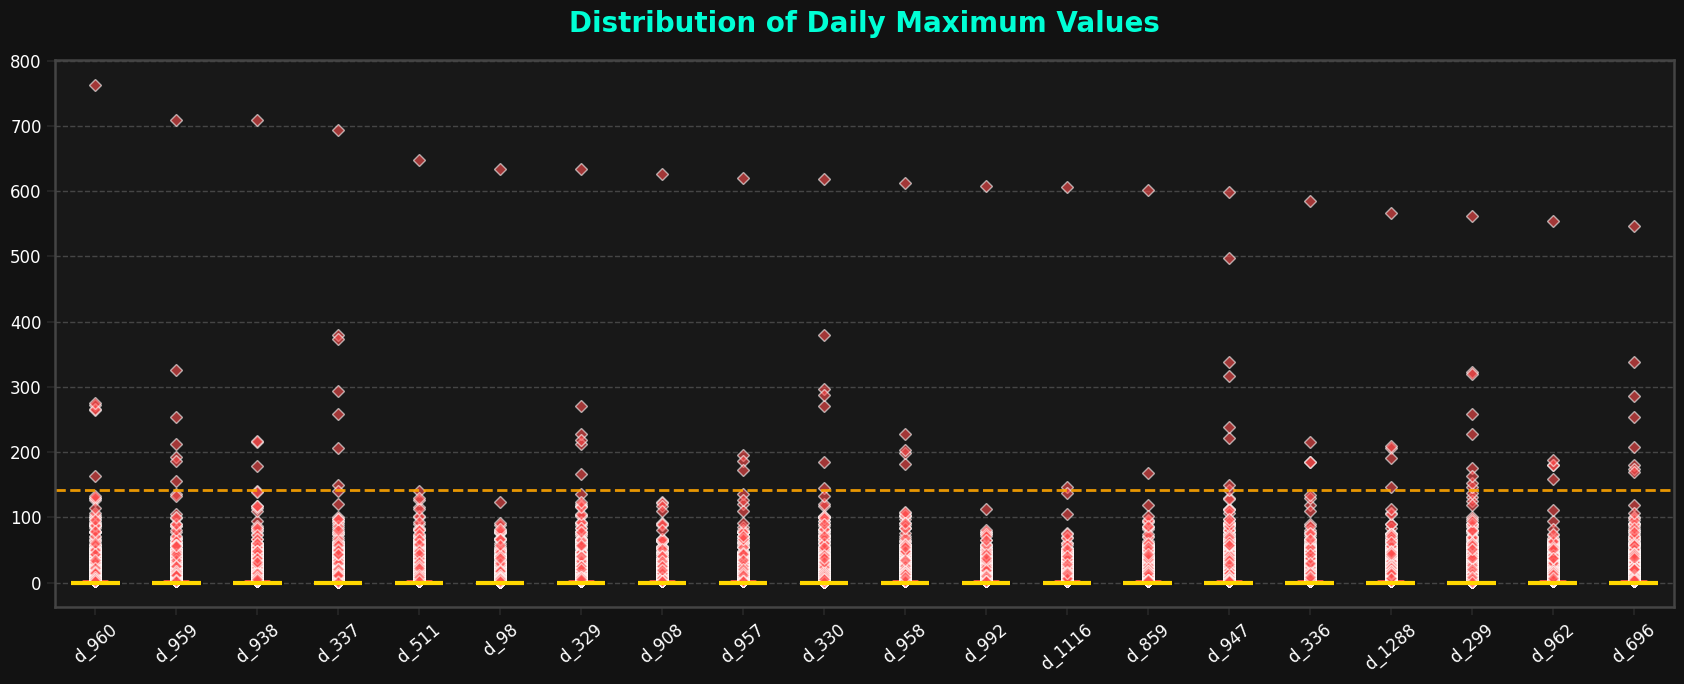

In [383]:
day_1_20 = out_max

plt.close("all")

# ---------- STYLE ----------
sns.set_theme(style="ticks")
plt.rcParams["font.family"] = "DejaVu Sans"

fig, ax = plt.subplots(figsize=(17, 7))
fig.patch.set_facecolor("#121212")
ax.set_facecolor("#181818")

# ---------- COLORS ----------
palette_colors = sns.color_palette("icefire", n_colors=day_1_20.shape[1])

# ---------- BOXPLOT ----------
sns.boxplot(
    data=day_1_20,
    palette=palette_colors,
    width=0.6,
    linewidth=2,
    fliersize=6,
    boxprops=dict(alpha=0.85),
    medianprops=dict(color="#FFD700", linewidth=3),
    whiskerprops=dict(color="#00FFFF", linewidth=2),
    capprops=dict(color="#FF4C4C", linewidth=2),
    flierprops=dict(marker='D', markerfacecolor="#FF4C4C",
                    markeredgecolor="white", alpha=0.6)
)

# ---------- GRID ----------
ax.yaxis.grid(True, linestyle="--", alpha=0.25)
ax.xaxis.grid(False)

# ---------- TICKS ----------
plt.xticks(rotation=40, fontsize=12, color="white")
plt.yticks(fontsize=12, color="white")

# ---------- TITLE ----------
ax.set_title(
    "Distribution of Daily Maximum Values",
    fontsize=20,
    fontweight="bold",
    color="#00FFD5",
    pad=20
)

# ---------- SPINES ----------
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color("#444444")
    spine.set_linewidth(1.8)

# ---------- SHADOW EFFECT ----------
for patch in ax.artists:
    patch.set_edgecolor("black")


plt.axhline(
    y=142,
    color="orange",
    linestyle="--",
    linewidth=2,
    alpha=0.9
)

plt.tight_layout()
plt.show()


# پیدا کردن  بیشترین تعداد داده های پرت و نمایش ان ها در box plot 

 # Finding the largest number of outliers and displaying them in a box plot

In [384]:
out=outlier_df.iloc[:20]
out = day[out.index]
out.head()


,d_482,d_374,d_440,d_370,d_642,d_64,d_405,d_480,d_432,d_468,d_481,d_378,d_635,d_404,d_392,d_410,d_438,d_364,d_218,d_451
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,2,0,1,0,0,1,1,2,0,2,0,0,2,0,2,0,2,0,3
4,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


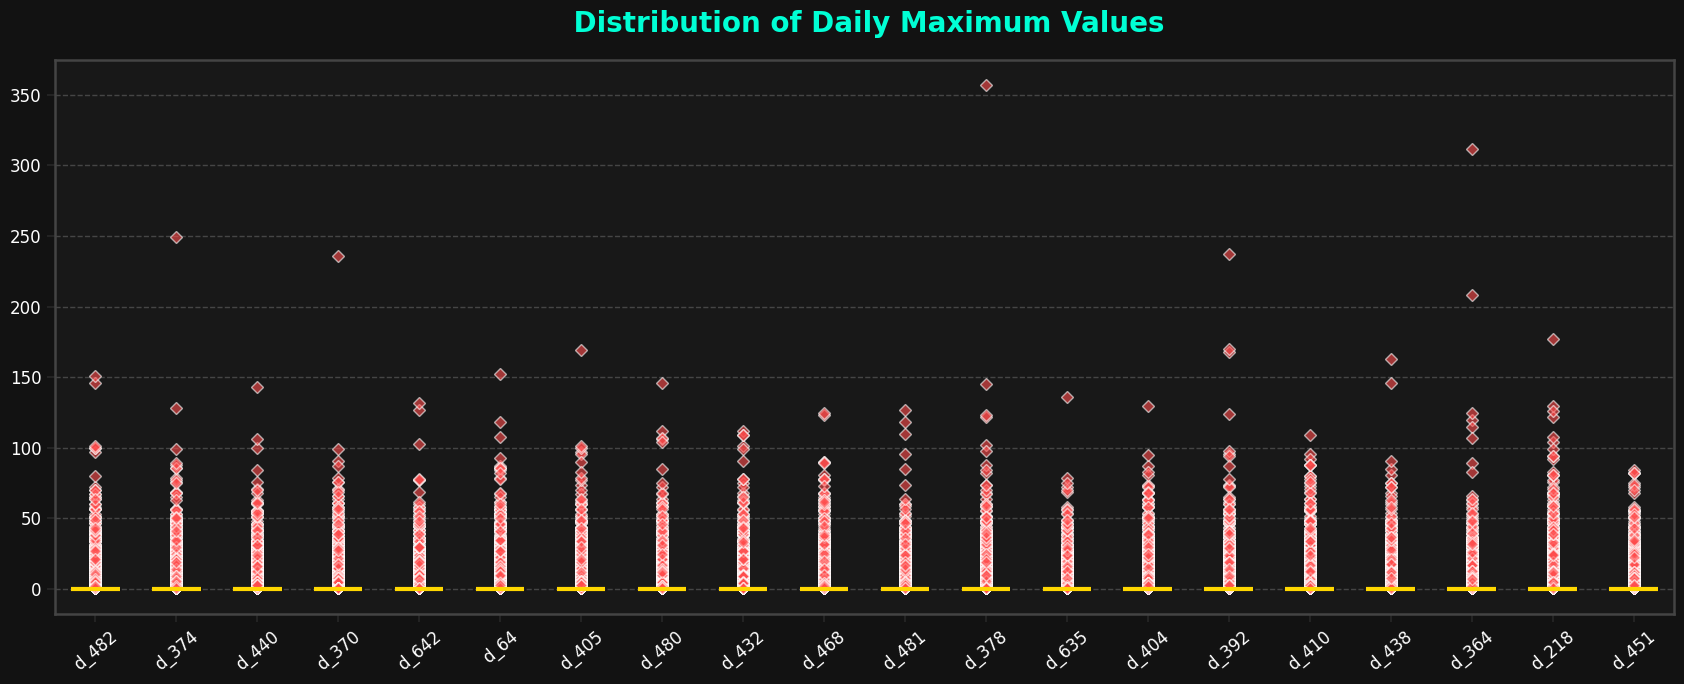

In [385]:
day_1_20 = out

plt.close("all")

# ---------- STYLE ----------
sns.set_theme(style="ticks")
plt.rcParams["font.family"] = "DejaVu Sans"

fig, ax = plt.subplots(figsize=(17, 7))
fig.patch.set_facecolor("#121212")
ax.set_facecolor("#181818")

# ---------- COLORS ----------
palette_colors = sns.color_palette("icefire", n_colors=day_1_20.shape[1])

# ---------- BOXPLOT ----------
sns.boxplot(
    data=day_1_20,
    palette=palette_colors,
    width=0.6,
    linewidth=2,
    fliersize=6,
    boxprops=dict(alpha=0.85),
    medianprops=dict(color="#FFD700", linewidth=3),
    whiskerprops=dict(color="#00FFFF", linewidth=2),
    capprops=dict(color="#FF4C4C", linewidth=2),
    flierprops=dict(marker='D', markerfacecolor="#FF4C4C",
                    markeredgecolor="white", alpha=0.6)
)

# ---------- GRID ----------
ax.yaxis.grid(True, linestyle="--", alpha=0.25)
ax.xaxis.grid(False)

# ---------- TICKS ----------
plt.xticks(rotation=40, fontsize=12, color="white")
plt.yticks(fontsize=12, color="white")

# ---------- TITLE ----------
ax.set_title(
    " Distribution of Daily Maximum Values",
    fontsize=20,
    fontweight="bold",
    color="#00FFD5",
    pad=20
)

# ---------- SPINES ----------
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color("#444444")
    spine.set_linewidth(1.8)

# ---------- SHADOW EFFECT ----------
for patch in ax.artists:
    patch.set_edgecolor("black")

plt.tight_layout()
plt.show()


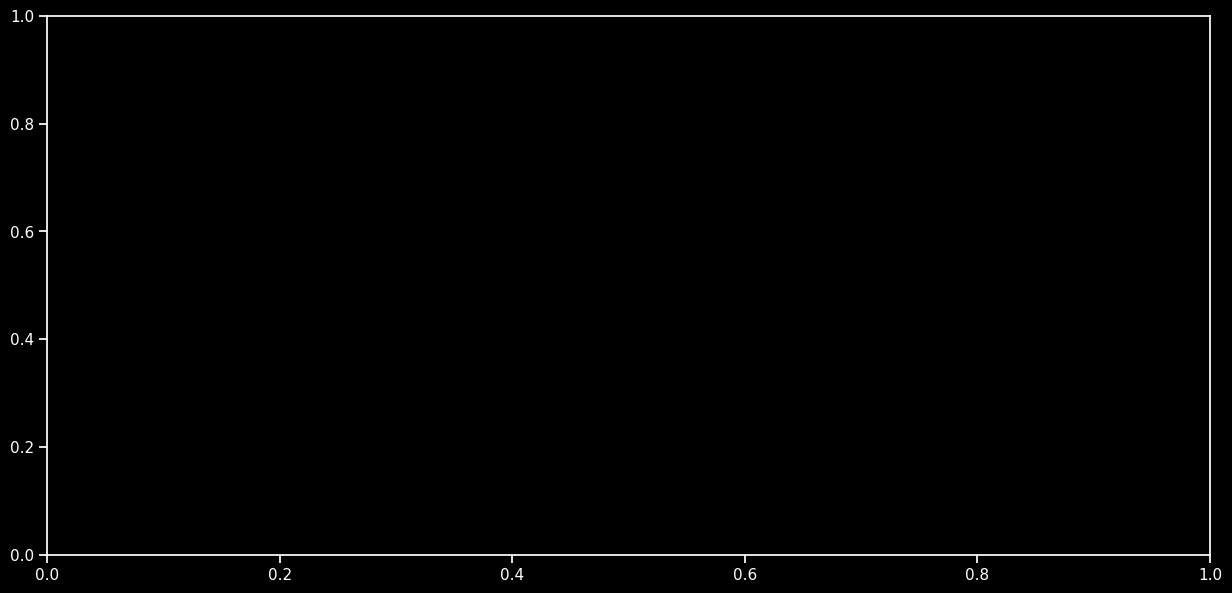

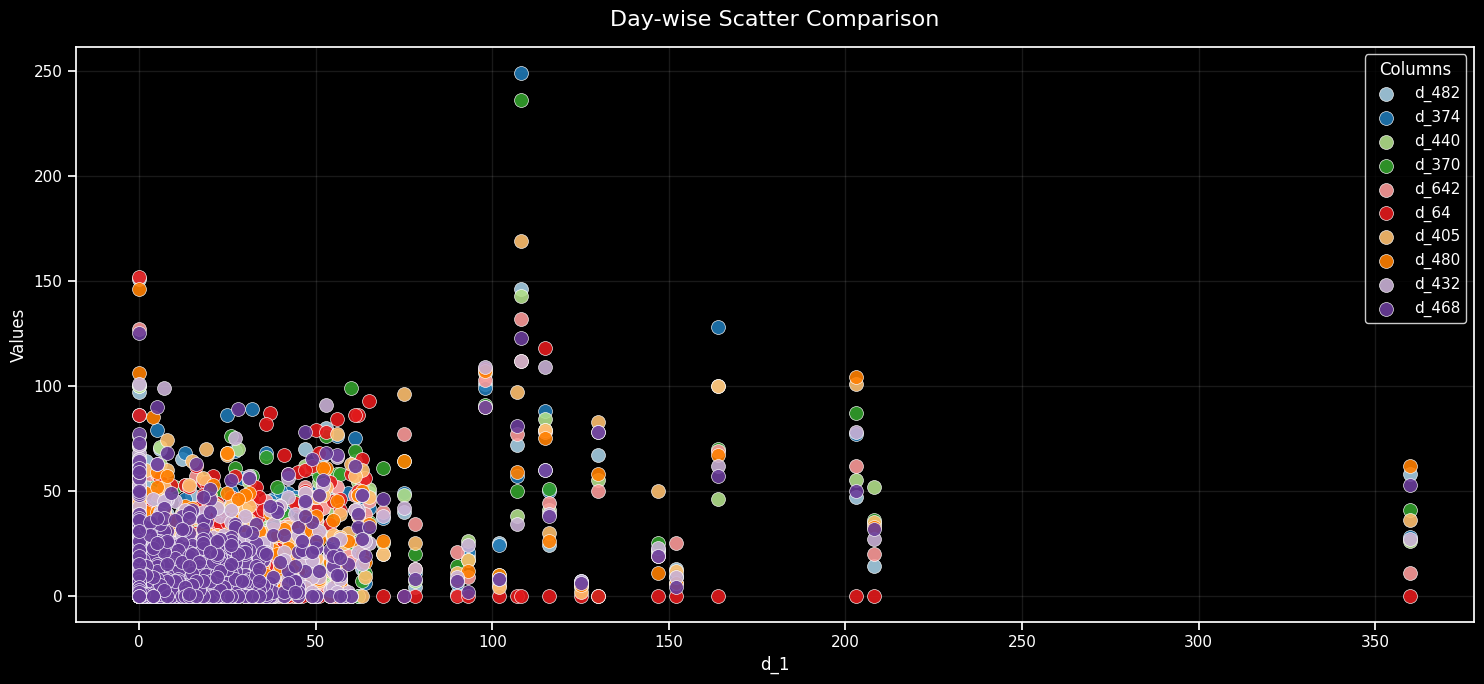

In [387]:

plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(15, 7))
fig.patch.set_facecolor("black")
ax.set_facecolor("black")



colors = sns.color_palette("Paired", n_colors=10)

for i, col in enumerate(out.iloc[:, :10]):
    sns.scatterplot(
        x=day["d_1"],
        y=day[col],
        s=100,
        color=colors[i],  
        label=col,
        edgecolor="white",
        linewidth=0.5,
        alpha=0.9,
        ax=ax,
    )


ax.set_title("Day-wise Scatter Comparison", fontsize=16, color="white", pad=15)
ax.set_xlabel("d_1", fontsize=12, color="white")
ax.set_ylabel("Values", fontsize=12, color="white")

ax.tick_params(colors="white")
ax.legend(
    title="Columns",
    facecolor="black",
    edgecolor="white",
    labelcolor="white"
)
plt.grid(alpha=0.1)
plt.tight_layout()
plt.show()


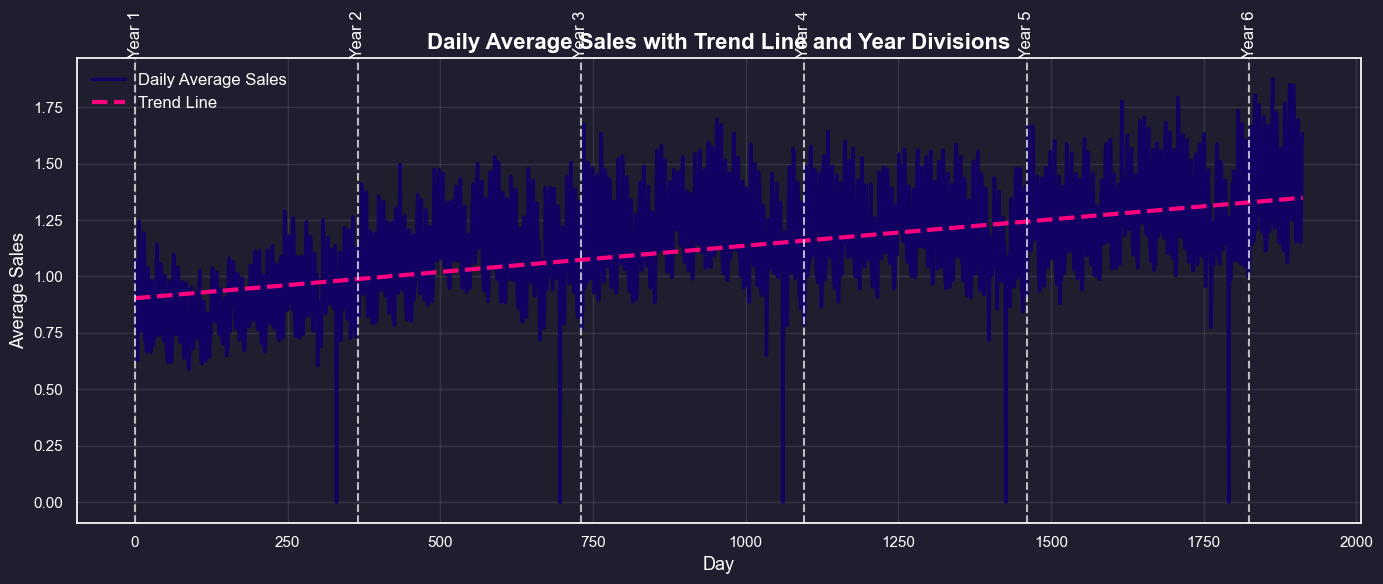

In [388]:

sns.set_style("darkgrid") 

d_cols = [col for col in df.columns if col.startswith("d_")]
daily_mean = df[d_cols].mean().values
x = np.arange(len(daily_mean))


slope, intercept = np.polyfit(x, daily_mean, 1)
trend_line = slope * x + intercept


bg_color = "#1e1e2f"  
line_color = "#120062" 
trend_color = "#ff007f" 
year_line_color = "#ffffff"

plt.figure(figsize=(14,6), facecolor=bg_color)
plt.gca().set_facecolor(bg_color)  

plt.plot(x, daily_mean, label="Daily Average Sales", color=line_color, linewidth=2.5)


plt.plot(x, trend_line, color=trend_color, linestyle="--", linewidth=3, label="Trend Line")


for day in range(0, len(daily_mean), 365):
    plt.axvline(day, color=year_line_color, linestyle='--', alpha=0.7)
    plt.text(day, max(daily_mean)*1.05, f'Year {day//365 + 1}', 
             rotation=90, verticalalignment='bottom', horizontalalignment='center', fontsize=12, color=year_line_color)


plt.title("Daily Average Sales with Trend Line and Year Divisions", fontsize=16, fontweight='bold', color="white")
plt.xlabel("Day", fontsize=13, color="white")
plt.ylabel("Average Sales", fontsize=13, color="white")


plt.grid(alpha=0.1, color="white")
plt.tick_params(colors='white')  

plt.legend(frameon=False, fontsize=12, facecolor=bg_color, labelcolor="white")

plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

years = [f"Year {i+1}" for i in range(len(year_means))]

fig = go.Figure()


fig.add_trace(go.Bar(
    x=years,
    y=year_means,
    marker=dict(
        color=year_means,
        colorscale="Turbo",
        line=dict(color="white", width=1.2)
    ),
    hovertemplate=
        "<b>%{x}</b><br>" +
        "Mean Value: <b>%{y:.2f}</b><extra></extra>"
))

fig.update_layout(
    title=dict(
        text="📊 Salaneh sum Values",
        font=dict(size=24, color="#00FFD5"),
        x=0.5
    ),
    xaxis=dict(
        title="Sal",
        tickangle=-40,
        showgrid=False,
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title="sum",
        showgrid=True,
        gridcolor="rgba(255,255,255,0.1)"
    ),
    template="plotly_dark",
    plot_bgcolor="#111111",
    paper_bgcolor="#111111",
    font=dict(
        family="Segoe UI",
        size=13,
        color="white"
    ),
    bargap=0.25
)

fig.show()


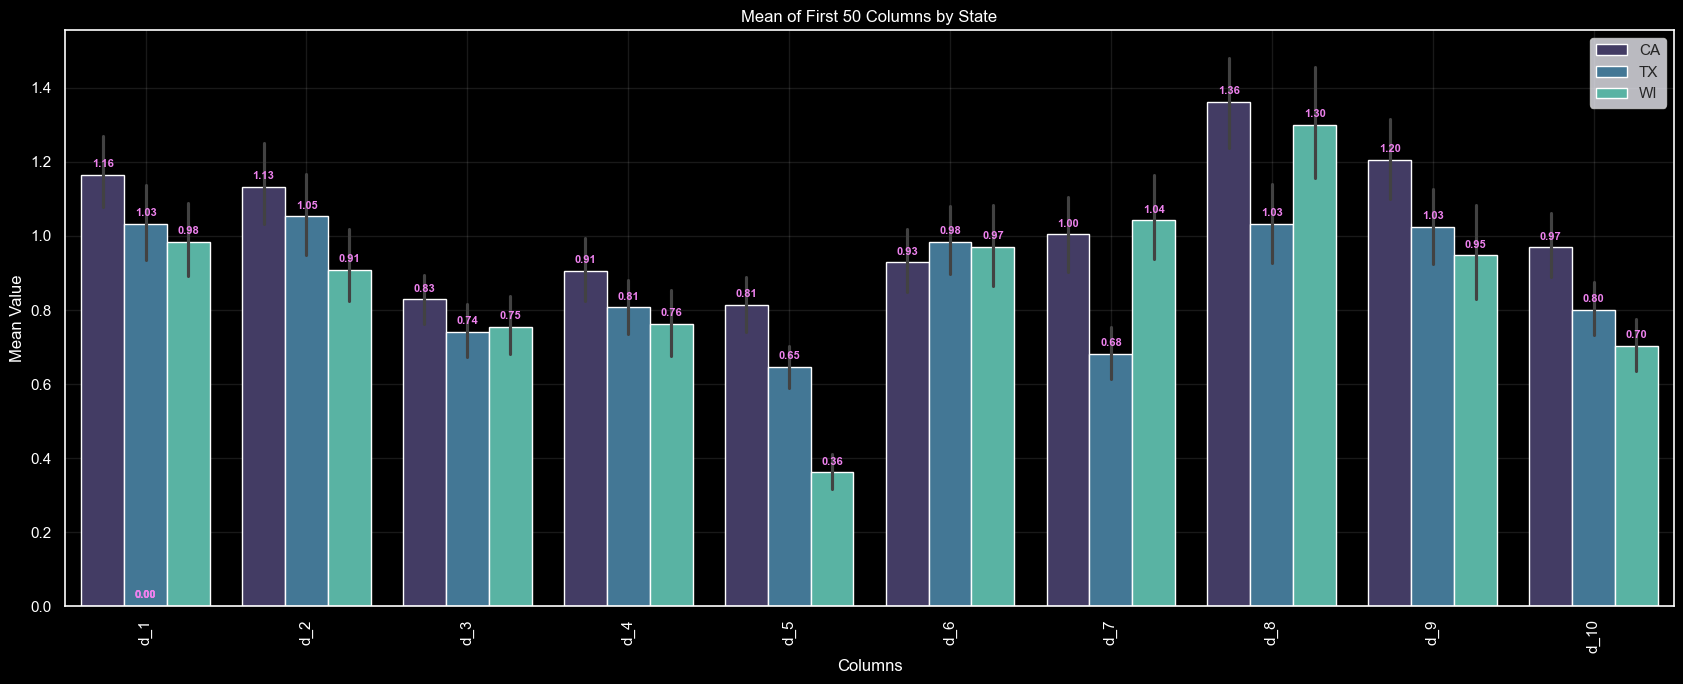

In [393]:

plt.style.use("dark_background")
sns.set_theme(style="dark")

day_1_50 = day.iloc[:, :10].copy()
day_1_50["state_id"] = df["state_id"]

long_df = day_1_50.melt(
    id_vars="state_id",
    var_name="column",
    value_name="value"
)

fig, ax = plt.subplots(figsize=(17, 7))
fig.patch.set_facecolor("black")
ax.set_facecolor("black")


sns.barplot(
    data=long_df,
    x="column",
    y="value",
    hue="state_id",
    estimator=np.mean,
    palette="mako",
    ax=ax
)


means = long_df.groupby("column")["value"].mean()



for bar in ax.patches:
    height = bar.get_height()
    if np.isnan(height):
        continue

    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + (ax.get_ylim()[1] * 0.01),
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=8,
        color="violet",
        fontweight="bold"
    )


plt.grid(alpha=0.1)

for spine in ax.spines.values():
    spine.set_color("white")
    spine.set_linewidth(1.2)

ax.set_xlabel("Columns", color="white")
ax.set_ylabel("Mean Value", color="white")
ax.set_title("Mean of First 50 Columns by State", color="white")
ax.tick_params(colors="white")

plt.xticks(rotation=90)
ax.legend()
plt.tight_layout()
plt.show()


<div align="center">
  <div style="max-width:800px;margin:40px auto;background-image:url('https://drive.google.com/uc?export=view&id=1Ve4ZMiKLY45UdNov_hG2WORKcSUUIT13
  ');background-size:cover;background-position:center;border-radius:24px;box-shadow:0 20px 40px rgba(0,0,0,0.5);overflow:hidden;border:1px solid #333;text-align:left;font-family:Arial,Helvetica,sans-serif;position:relative;">
    <div style="padding:80px 45px;background:rgba(0,0,0,0.6);backdrop-filter:blur(4px);color:#ffffff;line-height:1.7;">
      <h2 style="color:#ff4d4d;margin:0 0 25px 0;font-size:2.2rem;font-weight:800;">📊 M5 Sales Data EDA</h2>
      <p style="font-size:1.1rem;color:#f0f0f0;margin-bottom:25px;font-weight:400;">
        This exploratory data analysis (EDA) focuses on the <strong style="color:#ffffff;">M5 sales dataset</strong>, examining historical sales patterns, seasonal trends, and outliers. The goal is to uncover insights that can drive <strong style="color:#ffffff;">accurate forecasting and strategy</strong> for retail sales.
      </p>
      <div style="background:rgba(255,255,255,0.15);border-radius:16px;padding:28px;border:1px solid rgba(255,255,255,0.2);">
        <p style="margin:0 0 15px 0;font-weight:700;color:#ff6b6b;text-transform:uppercase;font-size:0.85rem;letter-spacing:1px;">Key Focus Areas</p>
        <ul style="margin:0;padding-left:20px;color:#e0e0e0;">
          <li><strong style="color:#ffffff;">Seasonal Trends</strong> – Identifying patterns across months and years</li>
          <li><strong style="color:#ffffff;">Promotional Effects</strong> – Analyzing impact of special events and SNAP promotions</li>
          <li><strong style="color:#ffffff;">Outlier Detection</strong> – Spotting unusual spikes or drops in sales</li>
          <li><strong style="color:#ffffff;">State-Level Insights</strong> – Understanding regional variations</li>
        </ul>
      </div>
    </div>
  </div>
</div>
